# **OLS log**

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ + ε

class statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GroupShuffleSplit

In [ ]:
df = pd.read_csv("df_final_v3_posRev_Price_Date.csv", low_memory=False)

In [ ]:
df["copiesSold_log"] = np.log1p(df["copiesSold"])

In [ ]:
df.copiesSold

0          1727
1           367
2          1298
3            65
4            47
          ...  
67026        72
67027    647531
67028      7749
67029    633920
67030        48
Name: copiesSold, Length: 67031, dtype: int64

In [ ]:
df.copiesSold_log

0         7.454720
1         5.908083
2         7.169350
3         4.189655
4         3.871201
           ...    
67026     4.290459
67027    13.380923
67028     8.955448
67029    13.359680
67030     3.891820
Name: copiesSold_log, Length: 67031, dtype: float64

In [ ]:
cols_to_drop = [
    "appid",
    "name",
    "copiesSold"
]

df = df.drop(columns=cols_to_drop)

In [ ]:
df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 134 columns):
 #    Column               Dtype  
---   ------               -----  
 0    steam_trading_cards  bool   
 1    workshop_support     bool   
 2    has_dlc              bool   
 3    has_demo             bool   
 4    price                float64
 5    publisherClass       object 
 6    positive_reviews     int64  
 7    metacritic_category  object 
 8    achievements_bin     object 
 9    date_bins            object 
 10   hasWindows           bool   
 11   hasMac               bool   
 12   hasLinux             bool   
 13   reviewScore_bin      object 
 14   isIndie              bool   
 15   isCasual             bool   
 16   isAction             bool   
 17   isAdventure          bool   
 18   isSimulation         bool   
 19   isStrategy           bool   
 20   isRPG                bool   
 21   isEarlyAccess        bool   
 22   isFTP                bool   
 23   isSports 

In [ ]:
df = pd.get_dummies(df, columns = ['publisherClass'], prefix='publisherClass', drop_first=True)
df = pd.get_dummies(df, columns = ['metacritic_category'], prefix='metacritic_category', drop_first=True)
df = pd.get_dummies(df, columns = ['date_bins'], prefix='date_bins', drop_first=True)
df = pd.get_dummies(df, columns = ['achievements_bin'], prefix='achievements_bin', drop_first=True)
df = pd.get_dummies(df, columns = ['reviewScore_bin'], prefix='reviewScore_bin', drop_first=True)

In [ ]:
df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 150 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    steam_trading_cards            bool   
 1    workshop_support               bool   
 2    has_dlc                        bool   
 3    has_demo                       bool   
 4    price                          float64
 5    positive_reviews               int64  
 6    hasWindows                     bool   
 7    hasMac                         bool   
 8    hasLinux                       bool   
 9    isIndie                        bool   
 10   isCasual                       bool   
 11   isAction                       bool   
 12   isAdventure                    bool   
 13   isSimulation                   bool   
 14   isStrategy                     bool   
 15   isRPG                          bool   
 16   isEarlyAccess                  bool   
 17   isFTP                        

In [ ]:
def bools_to_int(df):
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)
    print(f"Converted {len(bool_cols)} boolean columns to 0/1.")
    return df

df = bools_to_int(df)

Converted 147 boolean columns to 0/1.


In [ ]:
df = df.fillna(0)

nan_count_total = df.isna().sum().sum()
print(f"Număr total de valori NaN rămase în df: {nan_count_total}")

Număr total de valori NaN rămase în df: 0


In [ ]:
df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 150 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    steam_trading_cards            int64  
 1    workshop_support               int64  
 2    has_dlc                        int64  
 3    has_demo                       int64  
 4    price                          float64
 5    positive_reviews               int64  
 6    hasWindows                     int64  
 7    hasMac                         int64  
 8    hasLinux                       int64  
 9    isIndie                        int64  
 10   isCasual                       int64  
 11   isAction                       int64  
 12   isAdventure                    int64  
 13   isSimulation                   int64  
 14   isStrategy                     int64  
 15   isRPG                          int64  
 16   isEarlyAccess                  int64  
 17   isFTP                        

In [ ]:
df.to_csv("df_final_v3_adjusted_for_ols_logn.csv", index=False)

impartirea setului de date

In [ ]:
df = pd.read_csv("df_final_v3_adjusted_for_ols_logn.csv", low_memory=False)

target = "copiesSold_log"

X = df.drop(columns=[target])
y = df[target]

groups = pd.util.hash_pandas_object(X, index=False).astype("int64")
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_idx, valid_idx = next(gss.split(X, y, groups=groups))

print("train_df:", X.iloc[train_idx].shape)
print("valid_df:", X.iloc[valid_idx].shape)

train_df: (53601, 149)
valid_df: (13430, 149)


In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

basic ols

In [ ]:
#adaugam constanta Epsilon
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_base = sm.OLS(y_train, X_train_const).fit()
print(ols_base.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     761.8
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:21   Log-Likelihood:            -1.0728e+05
No. Observations:               53601   AIC:                         2.148e+05
Df Residuals:                   53458   BIC:                         2.161e+05
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Am renuntat la MAPE deoarece am foarte multe valori de 0 care umfla rezultatul si il fac irelevant. Am ales sa inlocuiesc MAPE cu SMAPE.

MAPE = (1/n) * Σ (|Actual - Forecast| / |Actual|) * 100

SMAPE = (1/n) * Σ(|Forecast – Actual| / ((|Actual| + |Forecast|)/2) * 100

In [ ]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

y_pred_log = ols_base.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")


--- Validation metrics (copiesSold, back-transformed) ---
MAE:  103,798
RMSE: 4,046,161
sMAPE:103.58%


In [ ]:
pvals = ols_base.pvalues

cols_p_gt_09 = (
    pvals[pvals > 0.9]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_09:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'langSV',
    'langTH',
    'langSL',
    'langKA',
    'langGA',
    'langMN',
    'langST',
    'date_bins_Years_2008_to_2012',
]


ols p<0.9

In [ ]:
cols_to_drop = [
    'langSV',
    'langTH',
    'langSL',
    'langKA',
    'langGA',
    'langMN',
    'langST',
    'date_bins_Years_2008_to_2012',
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p09 = sm.OLS(y_train, X_train_const).fit()
print(ols_p09.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     801.4
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:26   Log-Likelihood:            -1.0728e+05
No. Observations:               53601   AIC:                         2.148e+05
Df Residuals:                   53465   BIC:                         2.160e+05
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p09.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")


--- Validation metrics (copiesSold, back-transformed) ---
MAE:  103,778
RMSE: 4,043,789
sMAPE:103.58%


In [ ]:
pvals = ols_p09.pvalues

cols_p_gt_08 = (
    pvals[pvals > 0.8]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_08:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'langIT',
    'langMK',
    'langTA',
    'langZU',
    'langHY',
    'langTG',
    'langXH',
    'langDAri',
    'langCHR',
    'langCAval',
    'langWO',
    'langKICHE',
    'metacritic_category_Poor',
]


Avem cateva schimbari, dar nesemnificative la 0.9, asa ca vom taia din coloanele mai mari decat 0.8

In [ ]:
cols_to_drop = [
    'langIT',
    'langMK',
    'langTA',
    'langZU',
    'langHY',
    'langTG',
    'langXH',
    'langDAri',
    'langCHR',
    'langCAval',
    'langWO',
    'langKICHE',
    'metacritic_category_Poor',
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p08 = sm.OLS(y_train, X_train_const).fit()
print(ols_p08.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     865.6
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:30   Log-Likelihood:            -1.0728e+05
No. Observations:               53601   AIC:                         2.148e+05
Df Residuals:                   53475   BIC:                         2.159e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p08.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")


--- Validation metrics (copiesSold, back-transformed) ---
MAE:  103,941
RMSE: 4,058,371
sMAPE:103.58%


In [ ]:
pvals = ols_p08.pvalues

cols_p_gt_04 = (
    pvals[pvals > 0.4]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_04:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'hasWindows',
    'langDA',
    'langFI',
    'langRO',
    'langHE',
    'langHR',
    'langEU',
    'langFA',
    'langBN',
    'langCY',
    'langKK',
    'langSW',
    'langPA',
    'langKY',
    'langTE',
    'langTT',
    'langMI',
    'langRW',
    'langMT',
    'langGD',
    'langUG',
    'langTK',
    'langSD',
    'langPS',
    'langOR',
    'langAM',
    'langKM',
    'langTN',
    'langTI',
]


incercam sa taiem coloanele cu p>0.4

In [ ]:
cols_to_drop = [
    'hasWindows',
    'langDA',
    'langFI',
    'langRO',
    'langHE',
    'langHR',
    'langEU',
    'langFA',
    'langBN',
    'langCY',
    'langKK',
    'langSW',
    'langPA',
    'langKY',
    'langTE',
    'langTT',
    'langMI',
    'langRW',
    'langMT',
    'langGD',
    'langUG',
    'langTK',
    'langSD',
    'langPS',
    'langOR',
    'langAM',
    'langKM',
    'langTN',
    'langTI',
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p04 = sm.OLS(y_train, X_train_const).fit()
print(ols_p04.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:33   Log-Likelihood:            -1.0728e+05
No. Observations:               53601   AIC:                         2.148e+05
Df Residuals:                   53503   BIC:                         2.156e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p04.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")


--- Validation metrics (copiesSold, back-transformed) ---
MAE:  104,153
RMSE: 4,068,847
sMAPE:103.59%


In [ ]:
pvals = ols_p04.pvalues

cols_p_gt_005 = (
    pvals[pvals > 0.3]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_005:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'langDE',
    'langCA',
    'langGL',
    'langBS',
    'langSQ',
    'langML',
    'langKN',
    'langKOK',
    'langAS',
]


In [ ]:
cols_to_drop = [
    'langDE',
    'langCA',
    'langGL',
    'langBS',
    'langSQ',
    'langML',
    'langKN',
    'langKOK',
    'langAS',
]
df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p005 = sm.OLS(y_train, X_train_const).fit()
print(ols_p005.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1230.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:36   Log-Likelihood:            -1.0729e+05
No. Observations:               53601   AIC:                         2.147e+05
Df Residuals:                   53512   BIC:                         2.155e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p005.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")


--- Validation metrics (copiesSold, back-transformed) ---
MAE:  103,995
RMSE: 4,061,828
sMAPE:103.59%


Acesta ajunge sa fie cel mai bun rezultat obtinut

In [ ]:
df_final = df
y_pred_log_final = y_pred_log
y_valid_final = y_valid

In [ ]:
y_pred_final = np.expm1(np.asarray(y_pred_log_final).ravel())
y_valid_final_actual = np.expm1(np.asarray(y_valid_final).ravel())

In [ ]:
pvals = ols_p005.pvalues

cols_p_gt_001 = (
    pvals[pvals > 0.2]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_001:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'isViolent',
    'langMS',
    'langLV',
    'langAF',
    'langUR',
    'langUZ',
    'langKU',
    'date_bins_Years_2013_to_2016',
]


In [ ]:
cols_to_drop = [
    'isViolent',
    'langMS',
    'langLV',
    'langAF',
    'langUR',
    'langUZ',
    'langKU',
    'date_bins_Years_2013_to_2016',
]
df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p001 = sm.OLS(y_train, X_train_const).fit()
print(ols_p001.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1353.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:39   Log-Likelihood:            -1.0729e+05
No. Observations:               53601   AIC:                         2.147e+05
Df Residuals:                   53520   BIC:                         2.155e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p001.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")

--- Validation metrics (copiesSold, back-transformed) ---
MAE:  105,553
RMSE: 4,179,348
sMAPE:103.59%


In [ ]:
pvals = ols_p001.pvalues

cols_p_gt_011 = (
    pvals[pvals > 0.09]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_011:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'isOtherApps',
    'langID',
    'langSK',
    'langBE',
    'langLT',
    'langAZ',
    'langNE',
    'langQU',
]


In [ ]:
cols_to_drop = [
    'isOtherApps',
    'langID',
    'langSK',
    'langBE',
    'langLT',
    'langAZ',
    'langNE',
    'langQU',
]
df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p011 = sm.OLS(y_train, X_train_const).fit()
print(ols_p011.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1502.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:41   Log-Likelihood:            -1.0730e+05
No. Observations:               53601   AIC:                         2.147e+05
Df Residuals:                   53528   BIC:                         2.154e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p011.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")

--- Validation metrics (copiesSold, back-transformed) ---
MAE:  106,223
RMSE: 4,220,563
sMAPE:103.59%


In [ ]:
pvals = ols_p011.pvalues

cols_p_gt_012 = (
    pvals[pvals > 0.05]
    .drop(labels=["const"], errors="ignore")
    .index
    .tolist()
)

print("cols_to_drop = [")
for c in cols_p_gt_012:
    print(f"    {c!r},")
print("]")

cols_to_drop = [
    'langHU',
    'langAR',
    'langVI',
    'langMR',
]


In [ ]:
cols_to_drop = [
    'langHU',
    'langAR',
    'langVI',
    'langMR',
]
df = df.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
X_train = df.drop(columns=[target]).iloc[train_idx]
X_valid = df.drop(columns=[target]).iloc[valid_idx]
y_train = df[target].iloc[train_idx]
y_valid = df[target].iloc[valid_idx]

In [ ]:
X_train_const = sm.add_constant(X_train, has_constant="add")
X_valid_const = sm.add_constant(X_valid, has_constant="add")

ols_p012 = sm.OLS(y_train, X_train_const).fit()
print(ols_p012.summary())

                            OLS Regression Results                            
Dep. Variable:         copiesSold_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1590.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:03:43   Log-Likelihood:            -1.0731e+05
No. Observations:               53601   AIC:                         2.148e+05
Df Residuals:                   53532   BIC:                         2.154e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
y_pred_log = ols_p012.predict(X_valid_const)

y_pred_copies = np.expm1(y_pred_log)
y_true_copies = np.expm1(y_valid)

mae_c = mean_absolute_error(y_true_copies, y_pred_copies)
rmse_c = np.sqrt(mean_squared_error(y_true_copies, y_pred_copies))
smape_c = smape(y_true_copies, y_pred_copies)

print("--- Validation metrics (copiesSold, back-transformed) ---")
print(f"MAE:  {mae_c:,.0f}")
print(f"RMSE: {rmse_c:,.0f}")
print(f"sMAPE:{smape_c:.2f}%")

--- Validation metrics (copiesSold, back-transformed) ---
MAE:  109,764
RMSE: 4,445,181
sMAPE:103.60%


MAE = 84781 = in medie modelul estimeaza diferente de 61500 de copii vandute fata de valorile reale

RMSE = 1740413 = model instabil

SMPAE = 103.91% = outlieri puternici

R2 = 67% = modelul explica peste 3/4 din pattern

F static = 1577 = (p=0) modelul este foarte relevant

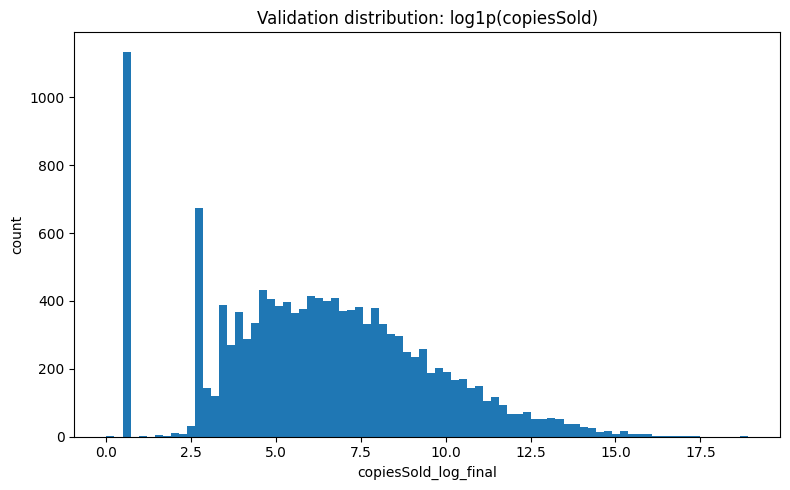

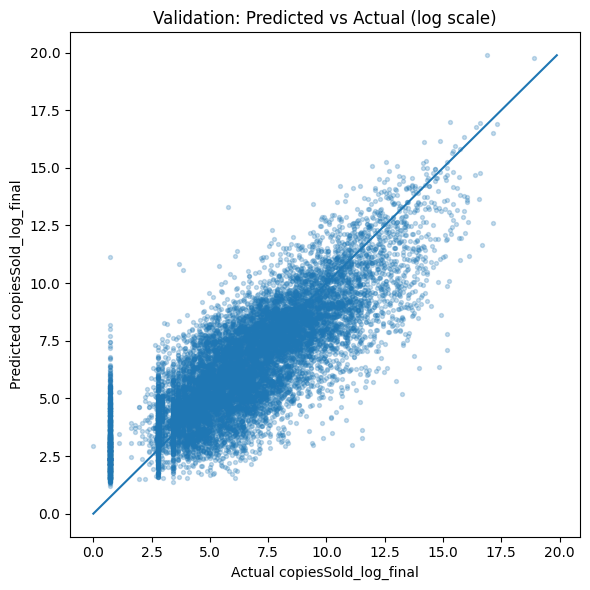

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(y_valid_final, bins=80)
plt.title("Validation distribution: log1p(copiesSold)")
plt.xlabel("copiesSold_log_final")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_valid_final, y_pred_log_final, s=8, alpha=0.25)
mn = float(min(np.asarray(y_valid_final).min(), np.asarray(y_pred_log_final).min()))
mx = float(max(np.asarray(y_valid_final).max(), np.asarray(y_pred_log_final).max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (log scale)")
plt.xlabel("Actual copiesSold_log_final")
plt.ylabel("Predicted copiesSold_log_final")
plt.tight_layout()
plt.show()

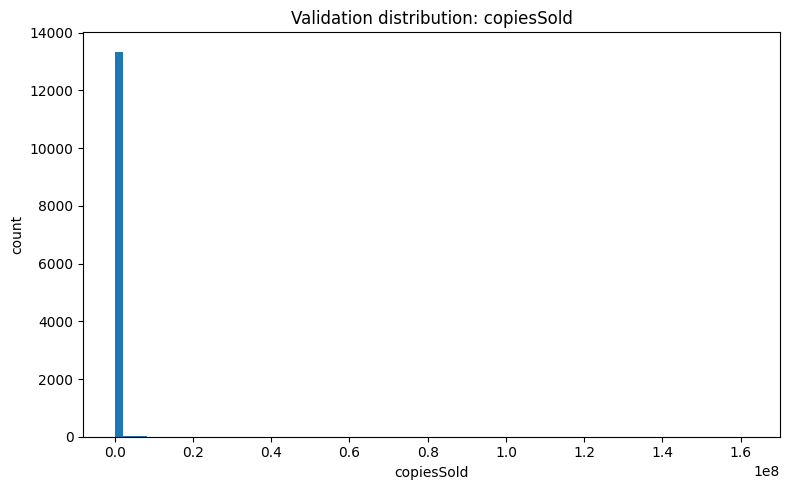

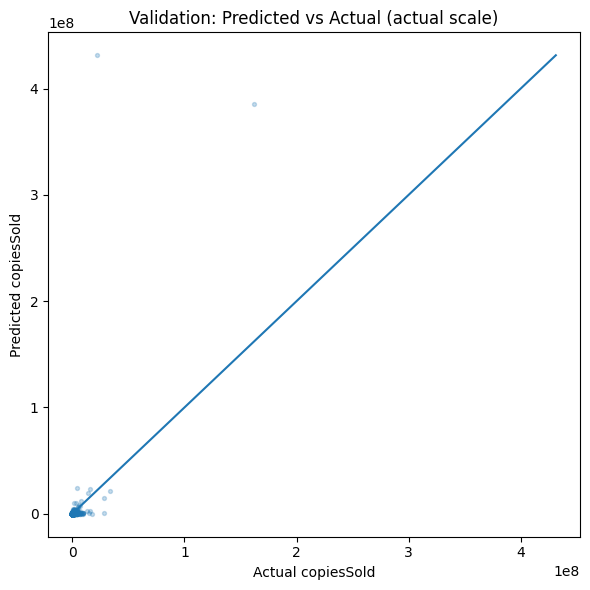

In [ ]:
y_true = np.asarray(y_valid_final_actual).ravel()
y_hat  = np.asarray(y_pred_final).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = np.expm1(np.asarray(y_pred_log_final).ravel())
y_valid_actual = np.expm1(np.asarray(y_valid_final).ravel())

res = pd.DataFrame({
    "copiesSold_actual": y_valid_actual,
    "copiesSold_pred":   y_pred,
}, index=getattr(y_valid_final, "index", None) if hasattr(y_valid_final, "index") else None)

THRESH = 1.5e8
mask = (res["copiesSold_pred"] > res["copiesSold_actual"]) & (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > actual and pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 2 points with pred > actual and pred > 150000000
       copiesSold_actual  copiesSold_pred       abs_err
23509         21782608.0     4.313003e+08  4.095177e+08
62241        161971233.0     3.852070e+08  2.232357e+08


Jocurile extreme sunt Path of Exile și PUBG: BATTLEGROUNDS

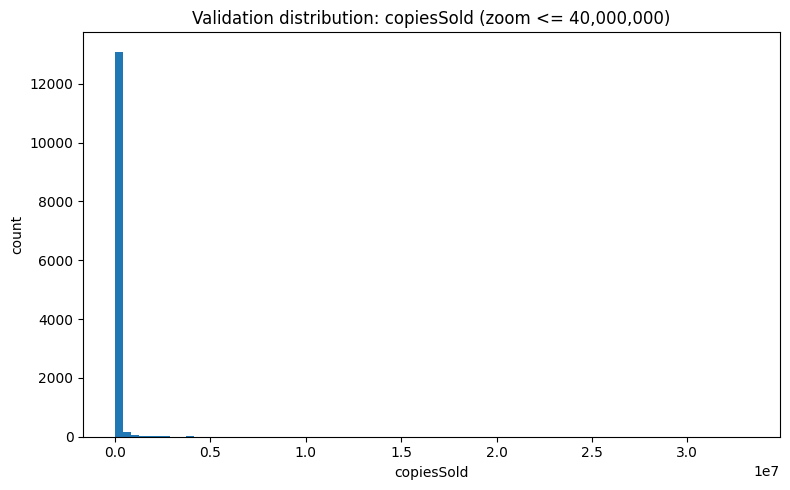

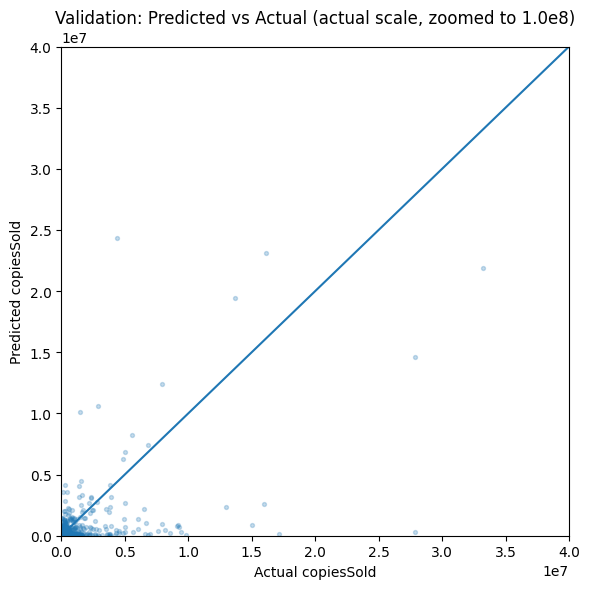

In [ ]:
y_true = np.asarray(y_valid_final_actual).ravel()
y_hat  = np.asarray(y_pred_final).ravel()

ZOOM_MAX_X = 0.4e8 #zoom
ZOOM_MAX_Y = 0.4e8 #zoom

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)

diag_max = min(ZOOM_MAX_X, ZOOM_MAX_Y)
plt.plot([0, diag_max], [0, diag_max])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (actual scale, zoomed to 1.0e8)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

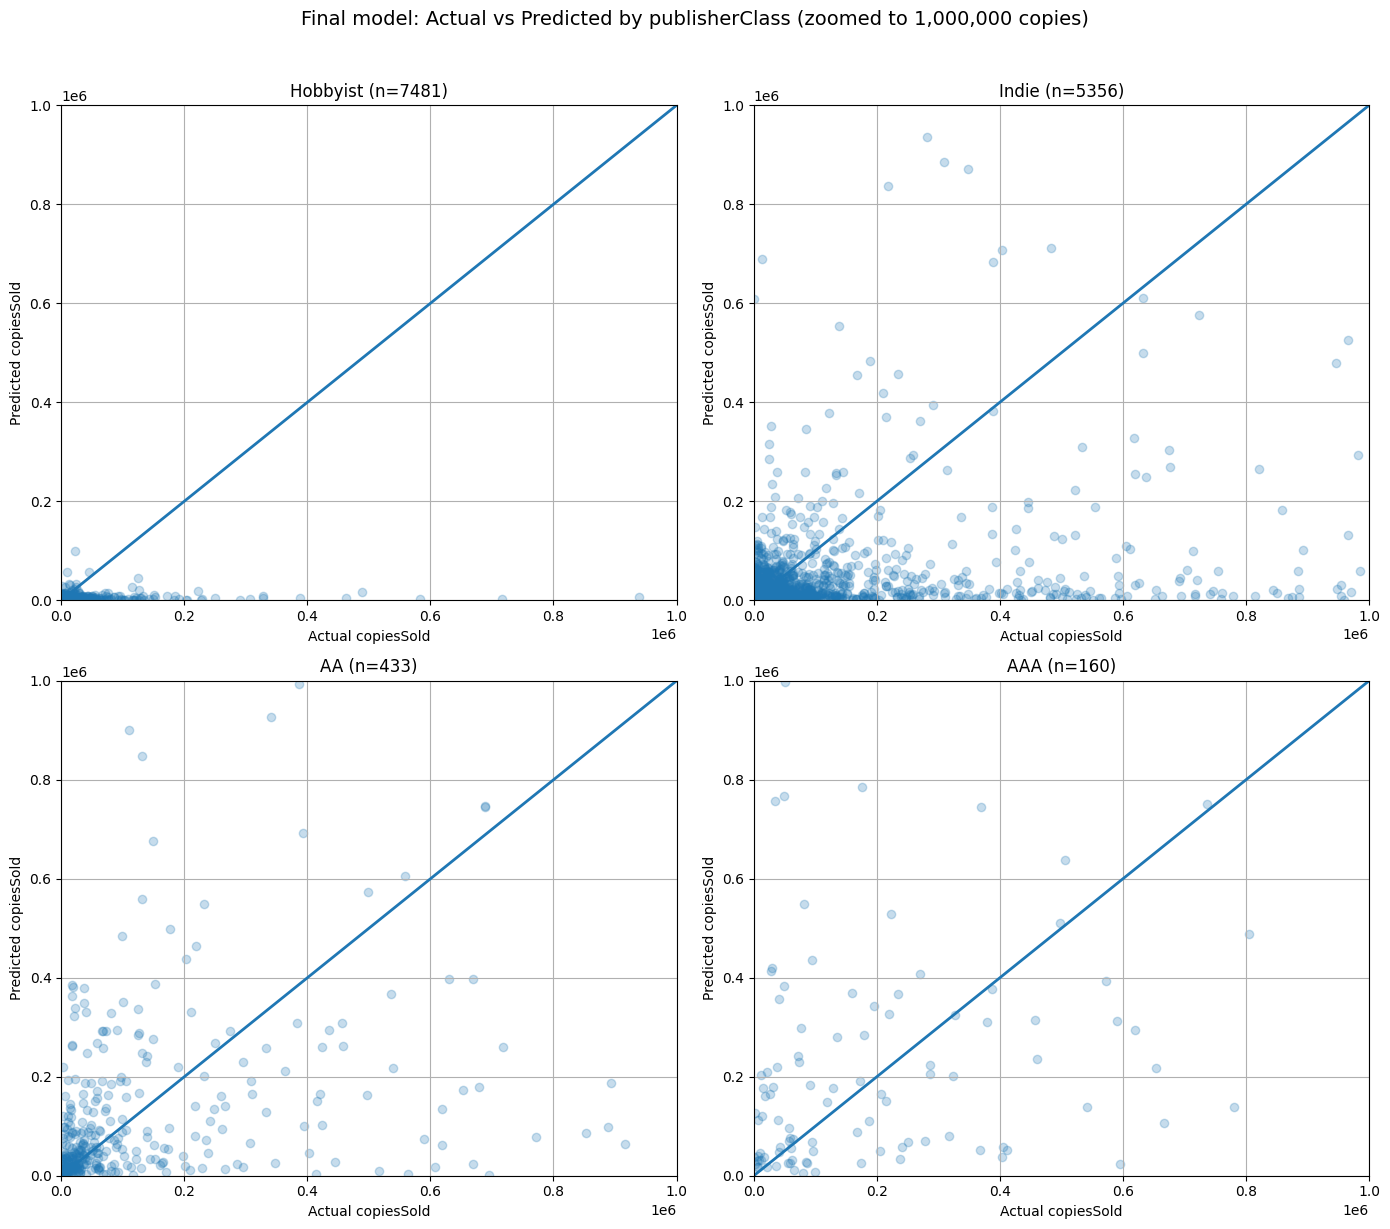

In [ ]:
Xv = X_valid.copy()

y_pred_final = np.expm1(np.asarray(y_pred_log_final).ravel())
y_true_final = np.expm1(np.asarray(y_valid_final).ravel())

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(y_true_final, index=Xv.index)
y_hat  = pd.Series(y_pred_final, index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]

ZOOM_MAX = 1_000_000  #zoom

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    mz = (yt <= ZOOM_MAX) & (yp <= ZOOM_MAX)

    ax.scatter(yt[mz], yp[mz], alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle(f"Final model: Actual vs Predicted by publisherClass (zoomed to {ZOOM_MAX:,.0f} copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **Data split for trees (required)**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

In [2]:
df = pd.read_csv("df_final_v3_posRev_Price_Date.csv", low_memory=False)

In [3]:
df.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67031 entries, 0 to 67030
Data columns (total 136 columns):
 #    Column               Dtype  
---   ------               -----  
 0    appid                int64  
 1    name                 object 
 2    steam_trading_cards  bool   
 3    workshop_support     bool   
 4    has_dlc              bool   
 5    has_demo             bool   
 6    price                float64
 7    publisherClass       object 
 8    positive_reviews     int64  
 9    metacritic_category  object 
 10   achievements_bin     object 
 11   date_bins            object 
 12   hasWindows           bool   
 13   hasMac               bool   
 14   hasLinux             bool   
 15   reviewScore_bin      object 
 16   isIndie              bool   
 17   isCasual             bool   
 18   isAction             bool   
 19   isAdventure          bool   
 20   isSimulation         bool   
 21   isStrategy           bool   
 22   isRPG                bool   
 23   isEarlyAc

In [4]:
cols_to_drop = [
    "appid",
    "name"
]

df = df.drop(columns=cols_to_drop)

In [5]:
#label encoding
orders = {
    "achievements_bin": ["Zero", "Very Low", "Low", "Medium", "High"],
    "reviewScore_bin": ["Very Low", "Low", "Good", "Very Good", "Excellent"],
}
for col, cat_order in orders.items():
    if col in df.columns:
        df[col] = pd.Categorical(df[col], categories=cat_order, ordered=True).codes

#one-hot encoding
onehot_cols = ["date_bins", "metacritic_category", "publisherClass"]
df = pd.get_dummies(df, columns=onehot_cols, prefix=onehot_cols, drop_first=True)

if "name" in df.columns:
    df = df.drop(columns=["name"])

print("dtypes:\n", df.dtypes.value_counts())
print(df.head(3))

dtypes:
 bool       139
int64        2
int8         2
float64      1
Name: count, dtype: int64
   steam_trading_cards  workshop_support  has_dlc  has_demo  price  \
0                 True              True    False     False  19.99   
1                 True              True    False     False  29.99   
2                 True              True    False     False   0.00   

   positive_reviews  achievements_bin  hasWindows  hasMac  hasLinux  ...  \
0               129                 0        True    True      True  ...   
1                 7                 2        True    True      True  ...   
2                32                 3        True    True      True  ...   

   date_bins_Years_2013_to_2016  date_bins_Years_2017_to_2019  \
0                         False                         False   
1                         False                         False   
2                         False                         False   

   date_bins_Years_2020_to_2022  metacritic_category_Excel

In [6]:
def bools_to_int(df):
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)
    print(f"Converted {len(bool_cols)} boolean columns to 0/1.")
    return df

df = bools_to_int(df)

Converted 139 boolean columns to 0/1.


In [7]:
df.to_csv("df_final_v3_adjusted_posReview_price.csv", index=False)

In [8]:
df = pd.read_csv("df_final_v3_adjusted_posReview_price.csv", low_memory=False)

feature_cols = [c for c in df.columns if c != "copiesSold"]

groups = pd.util.hash_pandas_object(df[feature_cols], index=False).astype("int64")

X = df[feature_cols]
y = df["copiesSold"]

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_idx, valid_idx = next(gss.split(X, y, groups=groups))

X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

In [9]:
def publisher_bucket(X):
    out = pd.Series("AA", index=X.index)

    if "publisherClass_Hobbyist" in X.columns:
        out.loc[X["publisherClass_Hobbyist"] == 1] = "Hobbyist"
    if "publisherClass_Indie" in X.columns:
        out.loc[X["publisherClass_Indie"] == 1] = "Indie"
    if "publisherClass_AAA" in X.columns:
        out.loc[X["publisherClass_AAA"] == 1] = "AAA"

    return out

classes = ["Hobbyist", "Indie", "AA", "AAA"]

train_pub = publisher_bucket(X_train)
valid_pub = publisher_bucket(X_valid)

train_pct = (train_pub.value_counts(normalize=True).reindex(classes, fill_value=0) * 100)
valid_pct = (valid_pub.value_counts(normalize=True).reindex(classes, fill_value=0) * 100)

summary = pd.DataFrame({
    "train_%": train_pct.round(2),
    "valid_%": valid_pct.round(2),
})

print(summary)

          train_%  valid_%
Hobbyist    56.13    56.63
Indie       39.38    39.19
AA           3.30     2.94
AAA          1.19     1.24


# **DecisionTreeRegressors**

RandomForestRegressor (n_estimators=100,

 criterion="squared_error",

 max_depth=None,

 min_samples_split=2,

 min_samples_leaf=1,

 min_weight_fraction_leaf=0.0,

 max_features=1.0,

 max_leaf_nodes=None,

 min_impurity_decrease=0.0,

 bootstrap=True,

 oob_score=False,

 n_jobs=None,

 random_state=None,

 verbose=0,

 warm_start=False,

 ccp_alpha=0.0,

 max_samples=None,

 monotonic_cst=None)

n_estimators(int) = numărul de arbori de decizie din forest, crește
stabilitatea și precizia;

criterion(string) = poate lua formele {"squared_error", "friedman_mse",
"absolute_error", "poisson"}, care alege funcția de măsurare a
calității;

max_depth(int) = adâncimea arborelui, unde None duce la complexitate
maximă;

min_samples_split(int/float) = numărul minim de eșantioane pentru a
împărți un nod;

min_samples_leaf(int/float) = minimul de eșantioane care se regăsesc într-o
frunză, dacă este int e un eșantion întreg, altfel e doar o
fracțiune;

min_weight_fraction_leaf(float) = greutatea minimă pentru care un nod
poate fi o frunză, dacă nu este specificată toate nodurile au
aceeași greutate;

max_features(int/float/”sqrt”/”log2”/None) = numărul minim de caracteristici pentru a găsi cel mai bun split;

max_leaf_nodes(int) = numărul maxim de noduri frunză, dacă este None nu
există limită;

min_impurity_decrease(float) = Nodul se va împărți dacă induce o scădere a
purității mai mare sau egală cu această valoare;

bootstrap(bool) = dacă folosește tehnica Bootstrap;

oob_score(bool) = dacă să folosească out-of-bag samples pentru estimarea
scorului generalizării;

n_jobs (int) = câte thread-uri se folosesc pentru proces;

random_state(int) =  aleatoritatea în selectarea caracteristicilor;

verbose(int) = controlează verbositatea (cât de multe mesaje de update se
trimit);
warm_start(bool) = dacă se continue antrenarea cu mai mulți arbori, în loc
să se reînceapă de la zero;

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

In [ ]:
rg = DecisionTreeRegressor()
rg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = rg.predict(X_valid) #fitting pe date noi

In [ ]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   57,113
RMSE:  2,431,840
sMAPE: 59.93%
R²: -45.11%


In [ ]:
y_pred_train = rg.predict(X_train) #predictie pe datele pe care s-a antrenat

mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   1
RMSE:  23
sMAPE: 1.90%
R²: 100.00%


**Model 1**

In [ ]:
rg_model1 = DecisionTreeRegressor(max_depth=14, min_samples_split=4, min_samples_leaf=7, ccp_alpha=0.15)
rg_model1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.15, max_depth=14, min_samples_leaf=7,
                      min_samples_split=4)

In [ ]:
y_pred = rg_model1.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   43,590
RMSE:  1,291,106
sMAPE: 58.90%
R²: 59.10%


**Model 2**

In [ ]:
rg_model2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)
rg_model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)

In [ ]:
y_pred = rg_model2.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   46,922
RMSE:  1,314,934
sMAPE: 55.96%
R²: 57.58%


Model 3

In [ ]:
rg_model3 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=6, min_samples_split=2)
rg_model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=6)

In [ ]:
y_pred = rg_model3.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   43,936
RMSE:  1,291,213
sMAPE: 53.95%
R²: 59.09%


Cel mai bun model rămâne modelul 3

In [ ]:
y_pred_train = rg_model3.predict(X_train) #predictie pe datele pe care s-a antrenat

mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   31,175
RMSE:  1,128,016
sMAPE: 47.06%
R²: 61.08%


In [ ]:
importance = rg_model3.feature_importances_
feature_names = X_train.columns

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values("importance", ascending=False)

print(imp_df.head(50).to_string(index=False))

                      feature   importance
             positive_reviews 9.578857e-01
                        isFTP 1.903311e-02
                        price 1.700080e-02
              reviewScore_bin 1.642143e-03
   date_bins_From_2023_Onward 5.246201e-04
metacritic_category_Excellent 4.735205e-04
 date_bins_Years_2008_to_2012 3.849862e-04
                       langTR 3.756999e-04
           publisherClass_AAA 2.807834e-04
                     isCasual 2.687275e-04
      publisherClass_Hobbyist 2.190149e-04
             achievements_bin 2.142216e-04
                       hasMac 1.961268e-04
                       langKO 1.548369e-04
                      isIndie 1.404305e-04
 date_bins_Years_2020_to_2022 1.279108e-04
  metacritic_category_Unrated 1.249598e-04
 date_bins_Years_2013_to_2016 1.159671e-04
                  isAdventure 9.283981e-05
                       langJA 9.060022e-05
                      langZHs 8.125820e-05
                     langESes 7.161198e-05
           

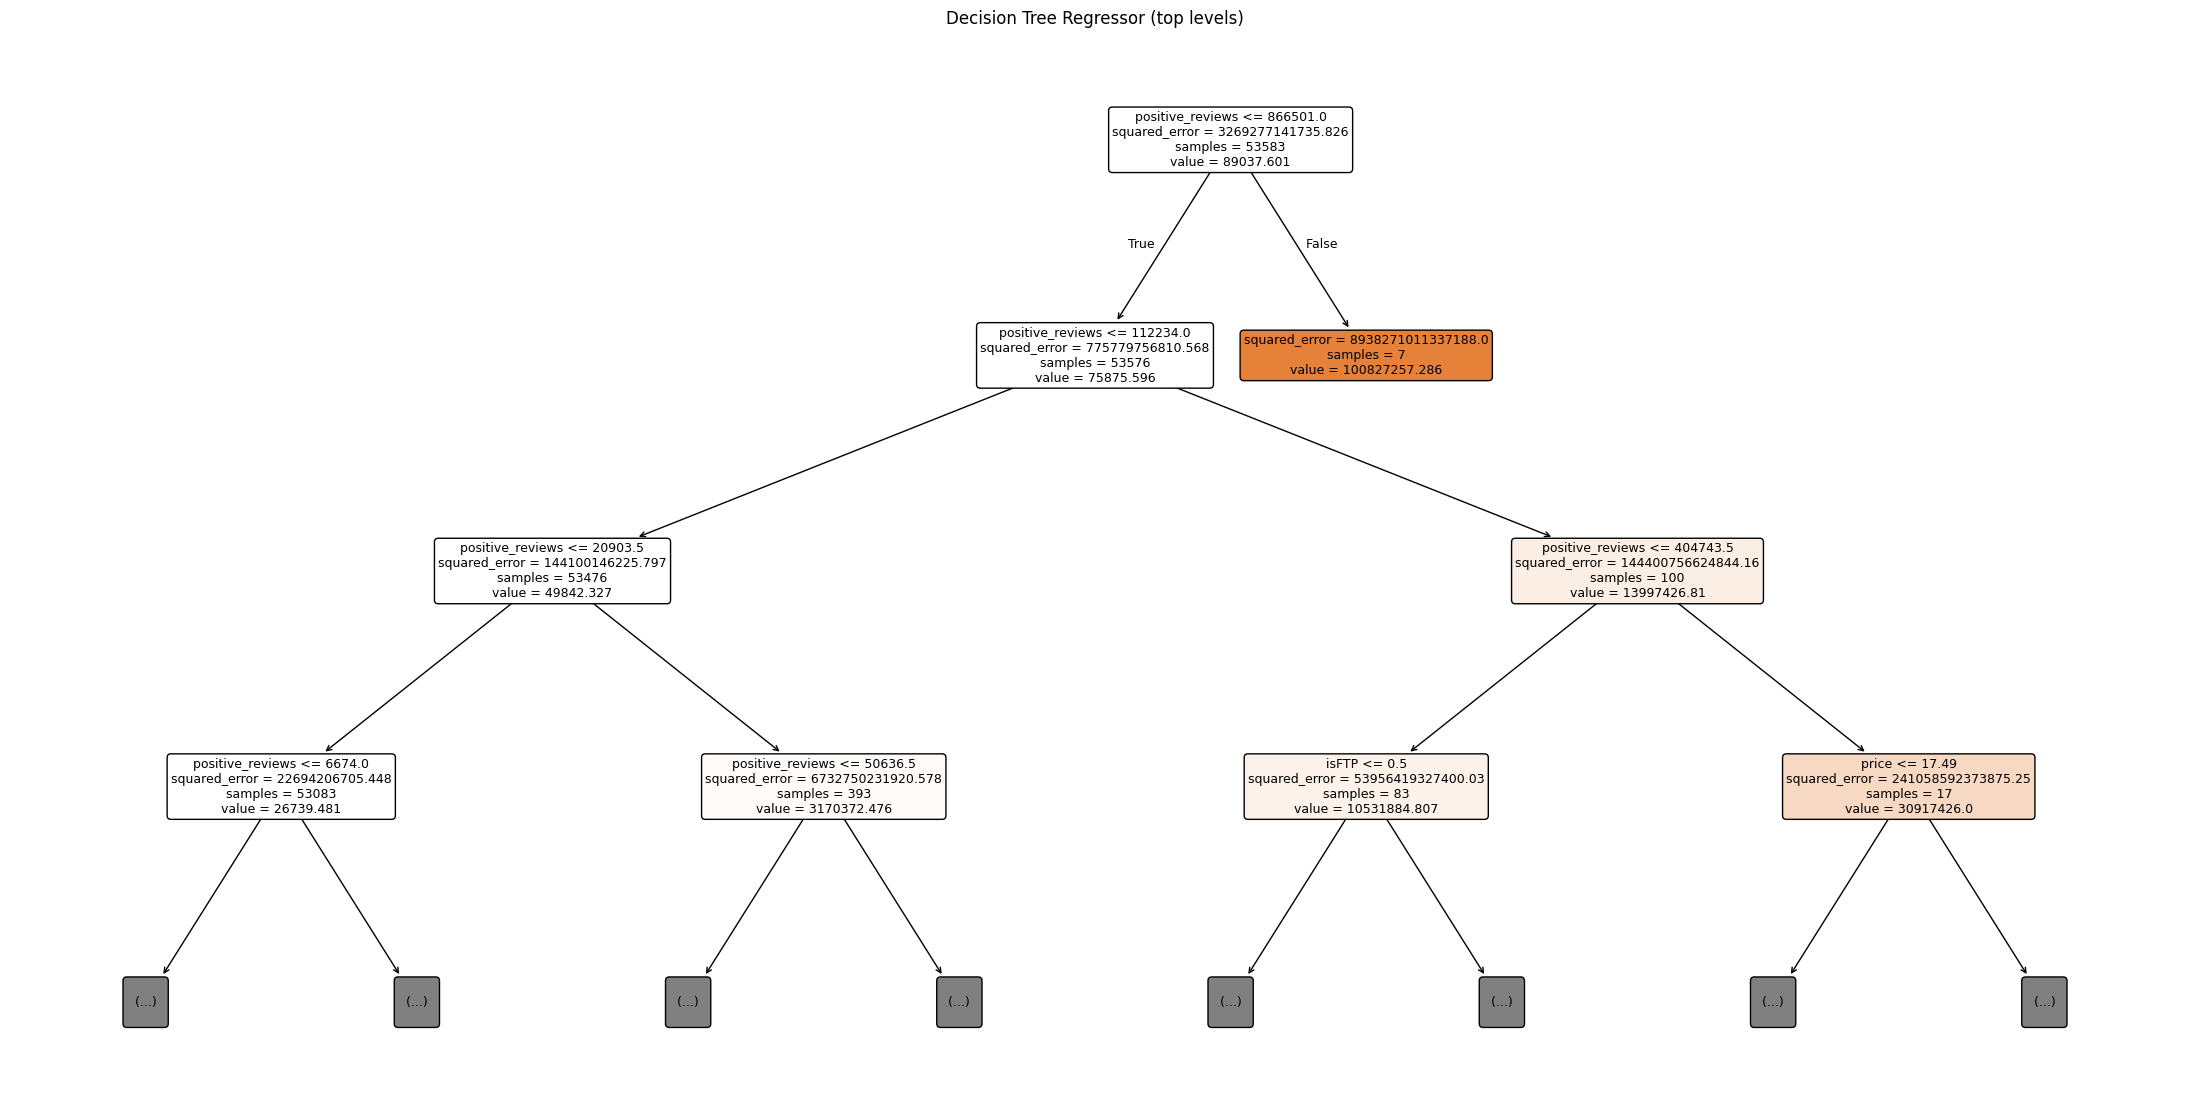

In [ ]:
plt.figure(figsize=(28, 14))
plot_tree(
    rg_model3,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=9
)
plt.title("Decision Tree Regressor (top levels)")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = rg_model3.predict(X_valid)

bins = [-float("inf"), 10, 100, 1000, 10000, 100000, float("inf")]
labels = ["0-10", "11-100", "101-1k", "1k-10k", "10k-100k", "100k+"]

y_true_cls = pd.cut(y_valid, bins=bins, labels=labels)
y_pred_cls = pd.cut(pd.Series(y_pred, index=y_valid.index), bins=bins, labels=labels)

print(classification_report(y_true_cls, y_pred_cls))

              precision    recall  f1-score   support

        0-10       0.75      0.52      0.62      1134
       100k+       0.83      0.92      0.87       729
      101-1k       0.77      0.82      0.79      3854
    10k-100k       0.79      0.79      0.79      1586
      11-100       0.74      0.72      0.73      3018
      1k-10k       0.82      0.84      0.83      3127

    accuracy                           0.78     13448
   macro avg       0.78      0.77      0.77     13448
weighted avg       0.78      0.78      0.78     13448



positive_reviews                128263.253767
price                             7042.501548
isFTP                             2593.120309
reviewScore_bin                   2097.612803
date_bins_From_2023_Onward         949.601314
isCasual                           567.232901
date_bins_Years_2013_to_2016       525.204036
achievements_bin                   517.960042
date_bins_Years_2008_to_2012       355.773983
isMM                               263.808399
isAction                           189.238471
publisherClass_Hobbyist            183.781027
metacritic_category_Unrated        136.163592
langTR                             124.817993
langZHs                             92.716762
publisherClass_AAA                  90.538511
date_bins_Years_2017_to_2019        69.772341
langESla                            64.596007
isAdventure                         60.266633
langCS                              50.816999
langNL                              43.507068
isStrategy                        

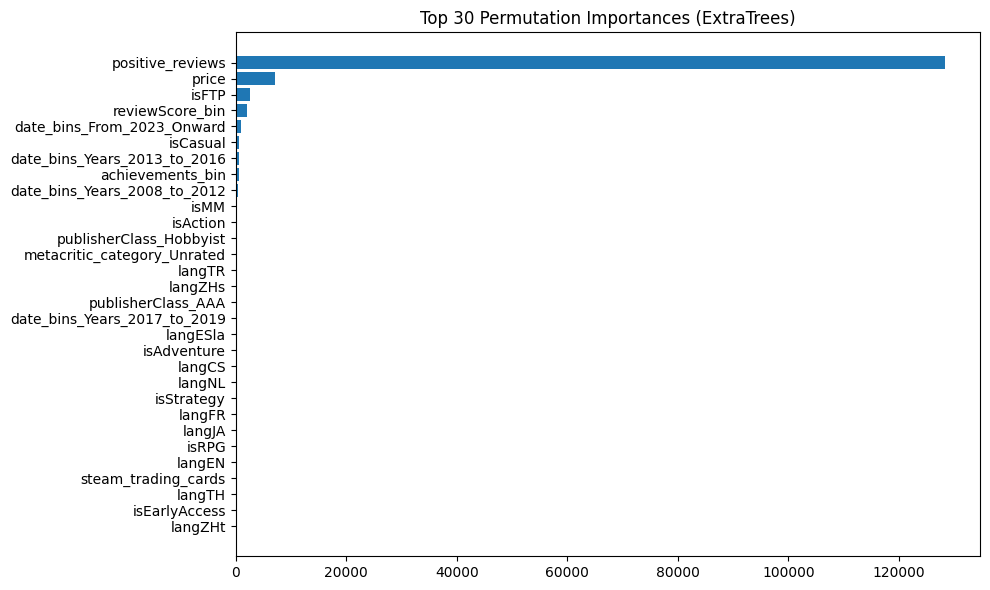

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rg_model3,
    X_valid, y_valid,
    n_repeats=20,
    random_state=42,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

perm_imp = pd.Series(perm.importances_mean, index=X_valid.columns).sort_values(ascending=False)
print(perm_imp.head(30).to_string())

top = perm_imp.head(30).sort_values()
plt.figure(figsize=(10,6))
plt.barh(top.index, top.values)
plt.title("Top 30 Permutation Importances (ExtraTrees)")
plt.tight_layout()
plt.show()

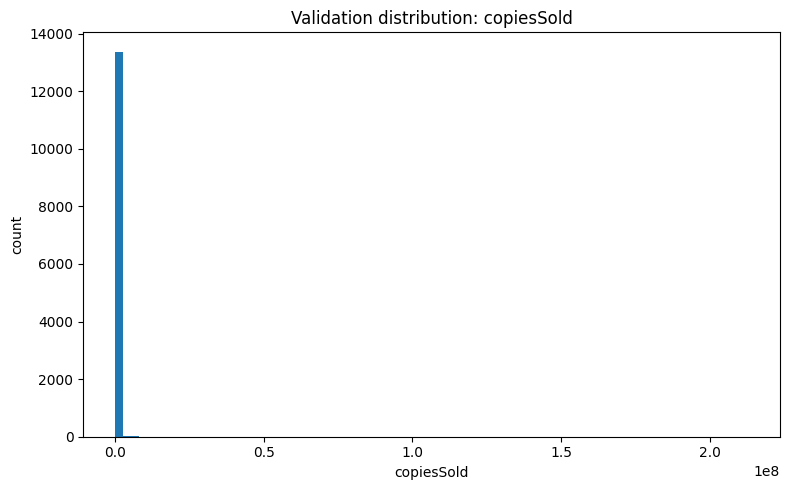

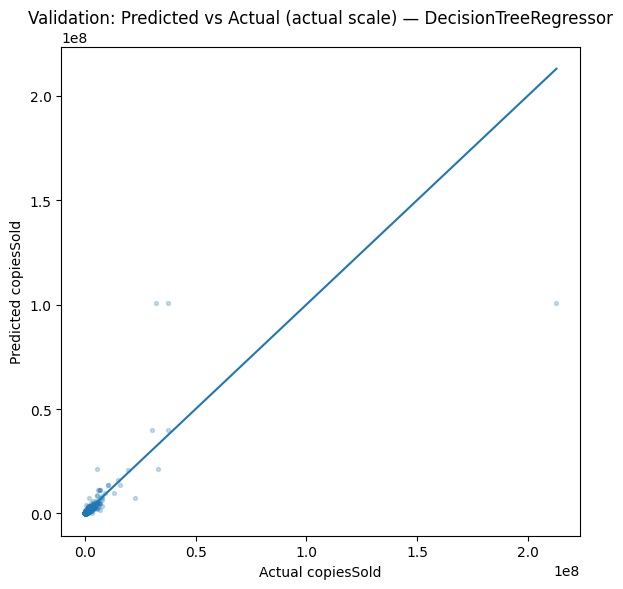

In [ ]:
y_pred = rg_model3.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale) — DecisionTreeRegressor")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

Vrem să aflăm care sunt acele 2 valori extreme

In [ ]:
y_pred = rg_model3.predict(X_valid)

res = pd.DataFrame({
    "copiesSold_actual": np.asarray(y_valid).ravel(),
    "copiesSold_pred":   np.asarray(y_pred).ravel(),
}, index=X_valid.index)

THRESH = 1.5e8
mask = (res["copiesSold_pred"] > res["copiesSold_actual"]) & (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > actual and pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 0 points with pred > actual and pred > 150000000
Empty DataFrame
Columns: [copiesSold_actual, copiesSold_pred, abs_err]
Index: []


Jocurile sunt Dota 2, respectiv Terraria

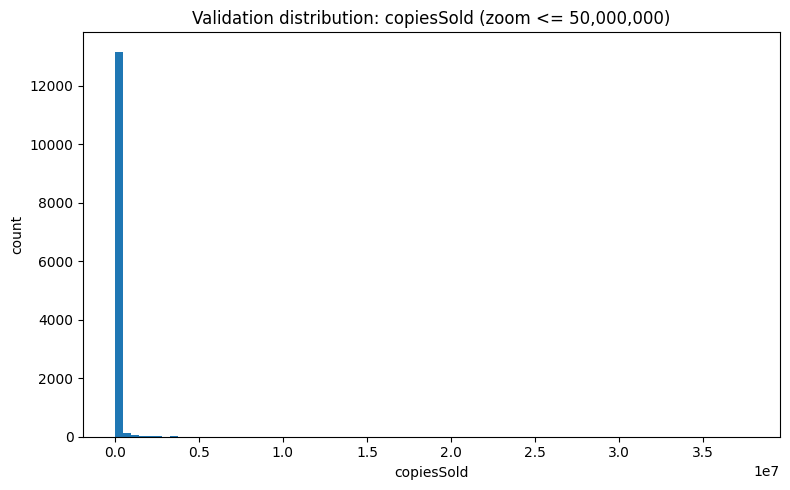

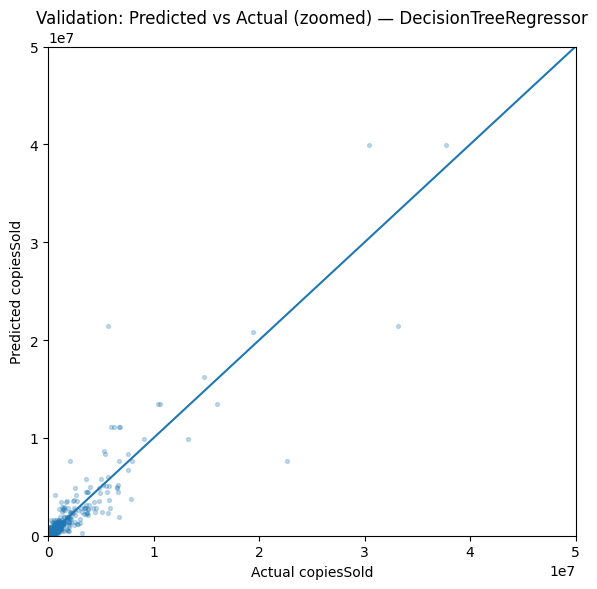

In [ ]:
y_pred = rg_model3.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

ZOOM_MAX_X = 0.5e8
ZOOM_MAX_Y = 0.5e8

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)

plt.plot([0, min(ZOOM_MAX_X, ZOOM_MAX_Y)], [0, min(ZOOM_MAX_X, ZOOM_MAX_Y)])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (zoomed) — DecisionTreeRegressor")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

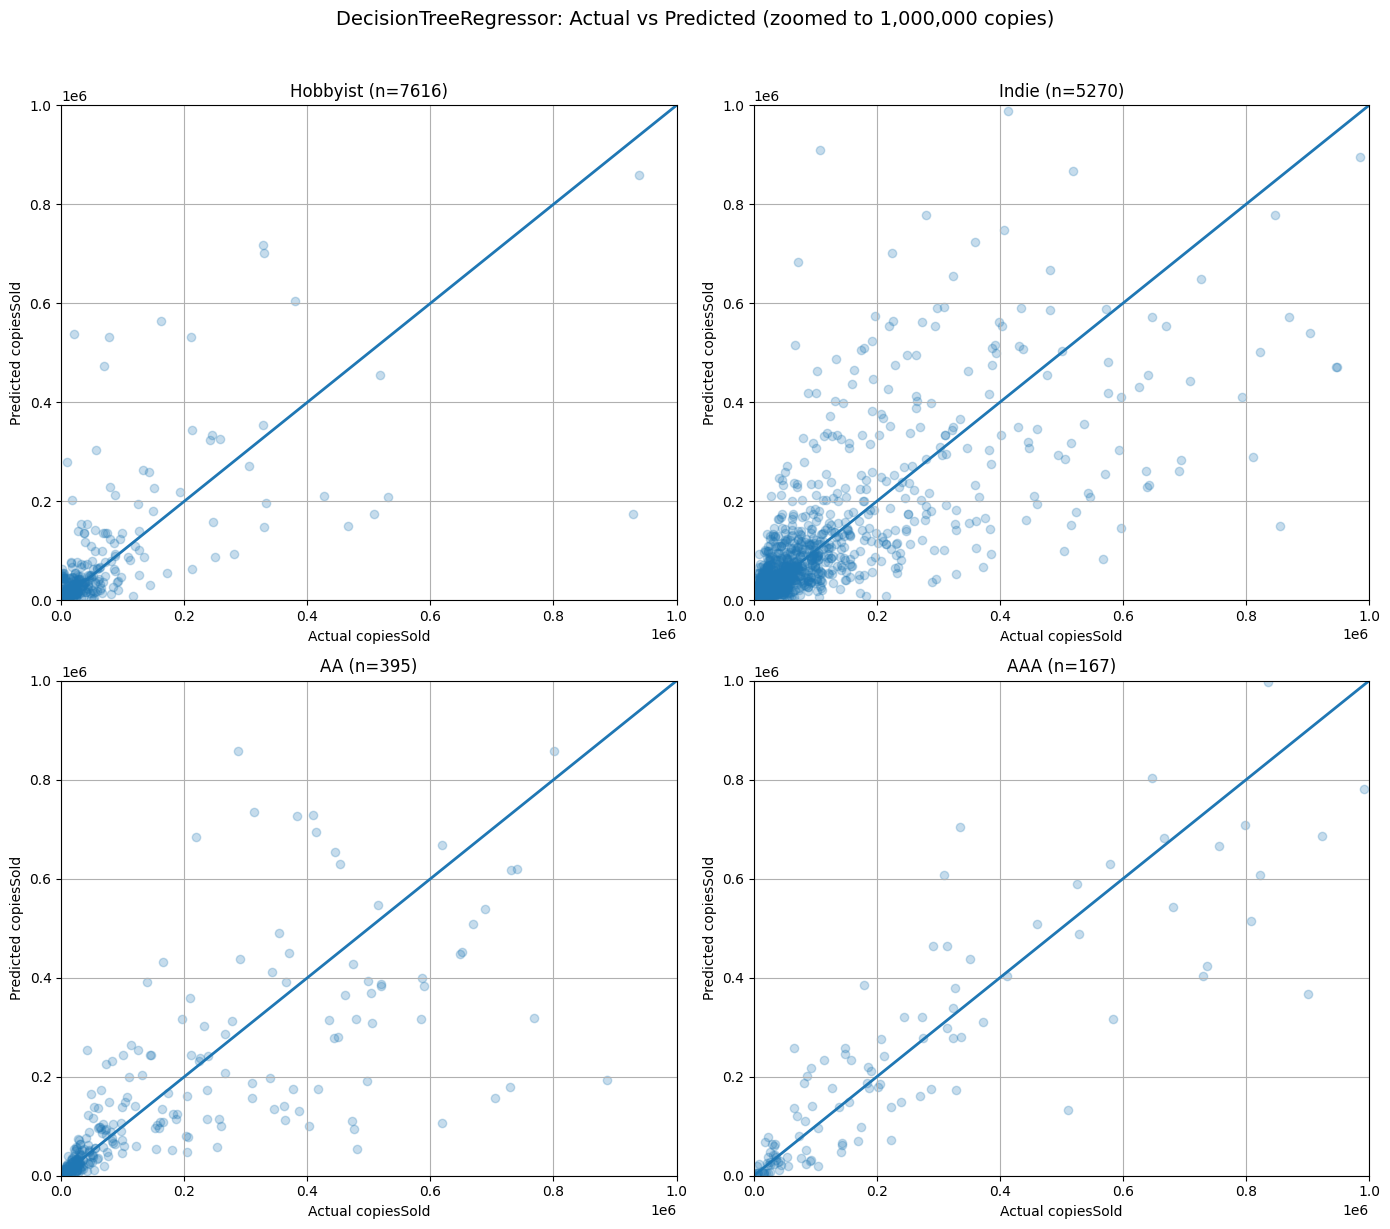

In [ ]:
Xv = X_valid.copy()
y_pred = rg.predict(Xv)

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(y_valid, index=Xv.index)
y_hat  = pd.Series(y_pred,  index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]

ZOOM_MAX = 1_000_000

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    ax.scatter(yt, yp, alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle("DecisionTreeRegressor: Actual vs Predicted (zoomed to 1,000,000 copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **Random Forest Regressor**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
rfg = RandomForestRegressor(random_state=28, n_jobs=-1)
rfg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=28)

In [ ]:
y_pred = rfg.predict(X_valid) #fitting pe date noi

In [ ]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   33,385
RMSE:  847,239
sMAPE: 51.69%
R²: 82.39%


In [ ]:
y_pred_train = rfg.predict(X_train) #predictie pe datele pe care s-a antrenat

In [ ]:
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   14,066
RMSE:  454,550
sMAPE: 26.76%
R²: 93.68%


**Model 1**

In [ ]:
rfg_model1 = RandomForestRegressor(n_estimators=100,
                                   max_depth=10,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   random_state=28,
                                   n_jobs=-1)
rfg_model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=28)

In [ ]:
y_pred = rfg_model1.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   32,905
RMSE:  820,588
sMAPE: 76.18%
R²: 83.48%


**Model 2**

In [ ]:
rfg_model2 = RandomForestRegressor(n_estimators=300,
                                   max_depth=20,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   n_jobs=-1,
                                   random_state=28)
rfg_model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, n_jobs=-1,
                      random_state=28)

In [ ]:
y_pred = rfg_model2.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   32,825
RMSE:  881,400
sMAPE: 51.66%
R²: 80.94%


**Model 3**

In [ ]:
rfg_model3 = RandomForestRegressor(n_estimators=300,
                                   max_depth=20,
                                   min_samples_split=4,
                                   min_samples_leaf=2,
                                   n_jobs=-1,
                                   random_state=28)
rfg_model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=300, n_jobs=-1, random_state=28)

In [ ]:
y_pred = rfg_model3.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   36,331
RMSE:  1,045,599
sMAPE: 51.50%
R²: 73.17%


**Model 4**

In [ ]:
rfg_model4 = RandomForestRegressor(n_estimators=300,
                                   max_depth=20,
                                   min_samples_split=6,
                                   min_samples_leaf=1,
                                   n_jobs=-1,
                                   random_state=28)
rfg_model4.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=6, n_estimators=300,
                      n_jobs=-1, random_state=28)

In [ ]:
y_pred = rfg_model4.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   35,707
RMSE:  1,044,721
sMAPE: 51.64%
R²: 73.22%


Model 5

In [ ]:
rfg_model5 = RandomForestRegressor(n_estimators=100,
                                   max_depth=22,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   random_state=28,
                                   n_jobs=-1)
rfg_model5.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, n_jobs=-1, random_state=28)

In [ ]:
y_pred = rfg_model5.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   33,236
RMSE:  834,819
sMAPE: 51.64%
R²: 82.90%


cel mai bun e modelul 5

                      Feature   Importance
             positive_reviews 8.581152e-01
                        isFTP 2.631383e-02
                        price 2.513823e-02
              reviewScore_bin 1.435030e-02
             workshop_support 5.420608e-03
                       langBG 4.921766e-03
metacritic_category_Excellent 4.728882e-03
             achievements_bin 4.267867e-03
                         isMM 3.729575e-03
                     isRacing 3.580400e-03
                     hasLinux 3.140877e-03
                       langRO 3.002103e-03
                       langNL 2.550839e-03
                       langVI 2.390877e-03
                       langNO 2.276303e-03
      publisherClass_Hobbyist 2.235991e-03
 date_bins_Years_2017_to_2019 2.131543e-03
   date_bins_From_2023_Onward 1.801252e-03
 date_bins_Years_2008_to_2012 1.730613e-03
                       langDA 1.668002e-03
                  isAdventure 1.549866e-03
                 isSimulation 1.547244e-03
           

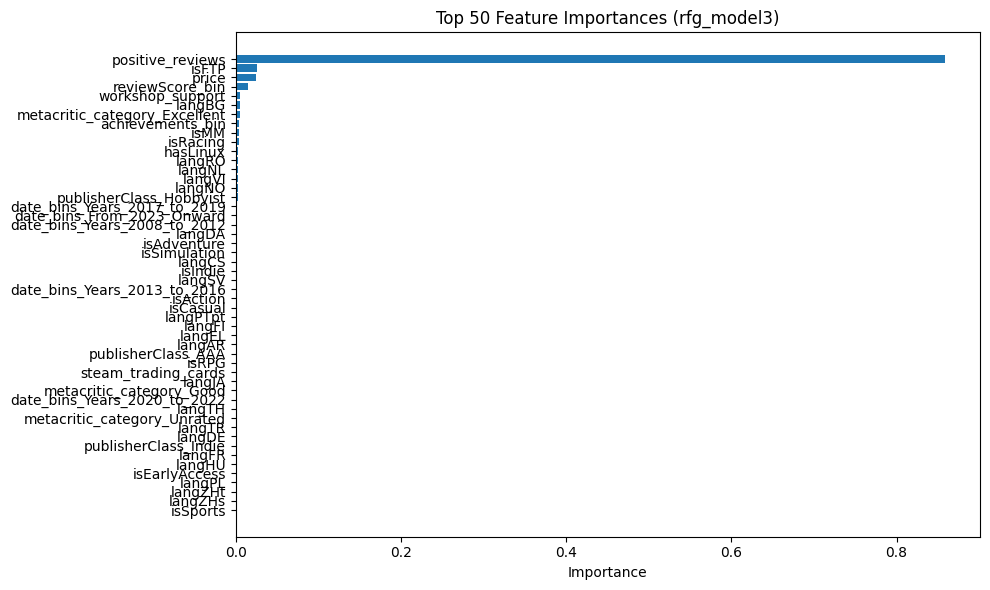

In [ ]:
importances = rfg_model5.feature_importances_
features = X_train.columns

imp_df = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values("Importance", ascending=False)
)

print(imp_df.head(200).to_string(index=False))

top_n = 50
top = imp_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title(f"Top {top_n} Feature Importances (rfg_model3)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

positive_reviews                 142257.441983
price                              7706.861089
isFTP                              3366.945411
reviewScore_bin                    2839.566084
publisherClass_Hobbyist            1102.481199
date_bins_Years_2013_to_2016        526.610646
achievements_bin                    397.374068
date_bins_From_2023_Onward          365.931908
langNL                              358.153228
langNO                              316.222408
isCasual                            246.448999
langPTbr                            198.615397
langBG                              195.245340
workshop_support                    156.159781
publisherClass_Indie                152.704321
langJA                              146.445515
langRO                              143.981033
langSV                              129.984062
langCS                              125.310245
isSports                            113.790071
langDA                              109.596750
has_demo     

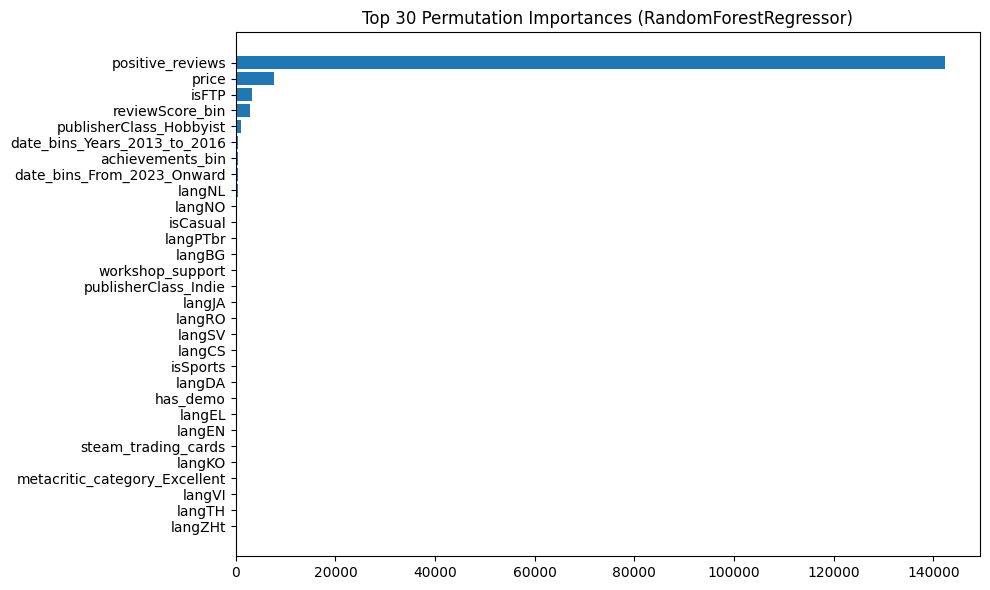

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rfg_model5,
    X_valid, y_valid,
    n_repeats=20,
    random_state=42,
    scoring="neg_mean_absolute_error",
    n_jobs=1
)

perm_imp = pd.Series(perm.importances_mean, index=X_valid.columns).sort_values(ascending=False)
print(perm_imp.head(30).to_string())

top = perm_imp.head(30).sort_values()
plt.figure(figsize=(10,6))
plt.barh(top.index, top.values)
plt.title("Top 30 Permutation Importances (RandomForestRegressor)")
plt.tight_layout()
plt.show()


Am ajuns la concluzia ca modelul este foarte dependent de variabila positive reviews

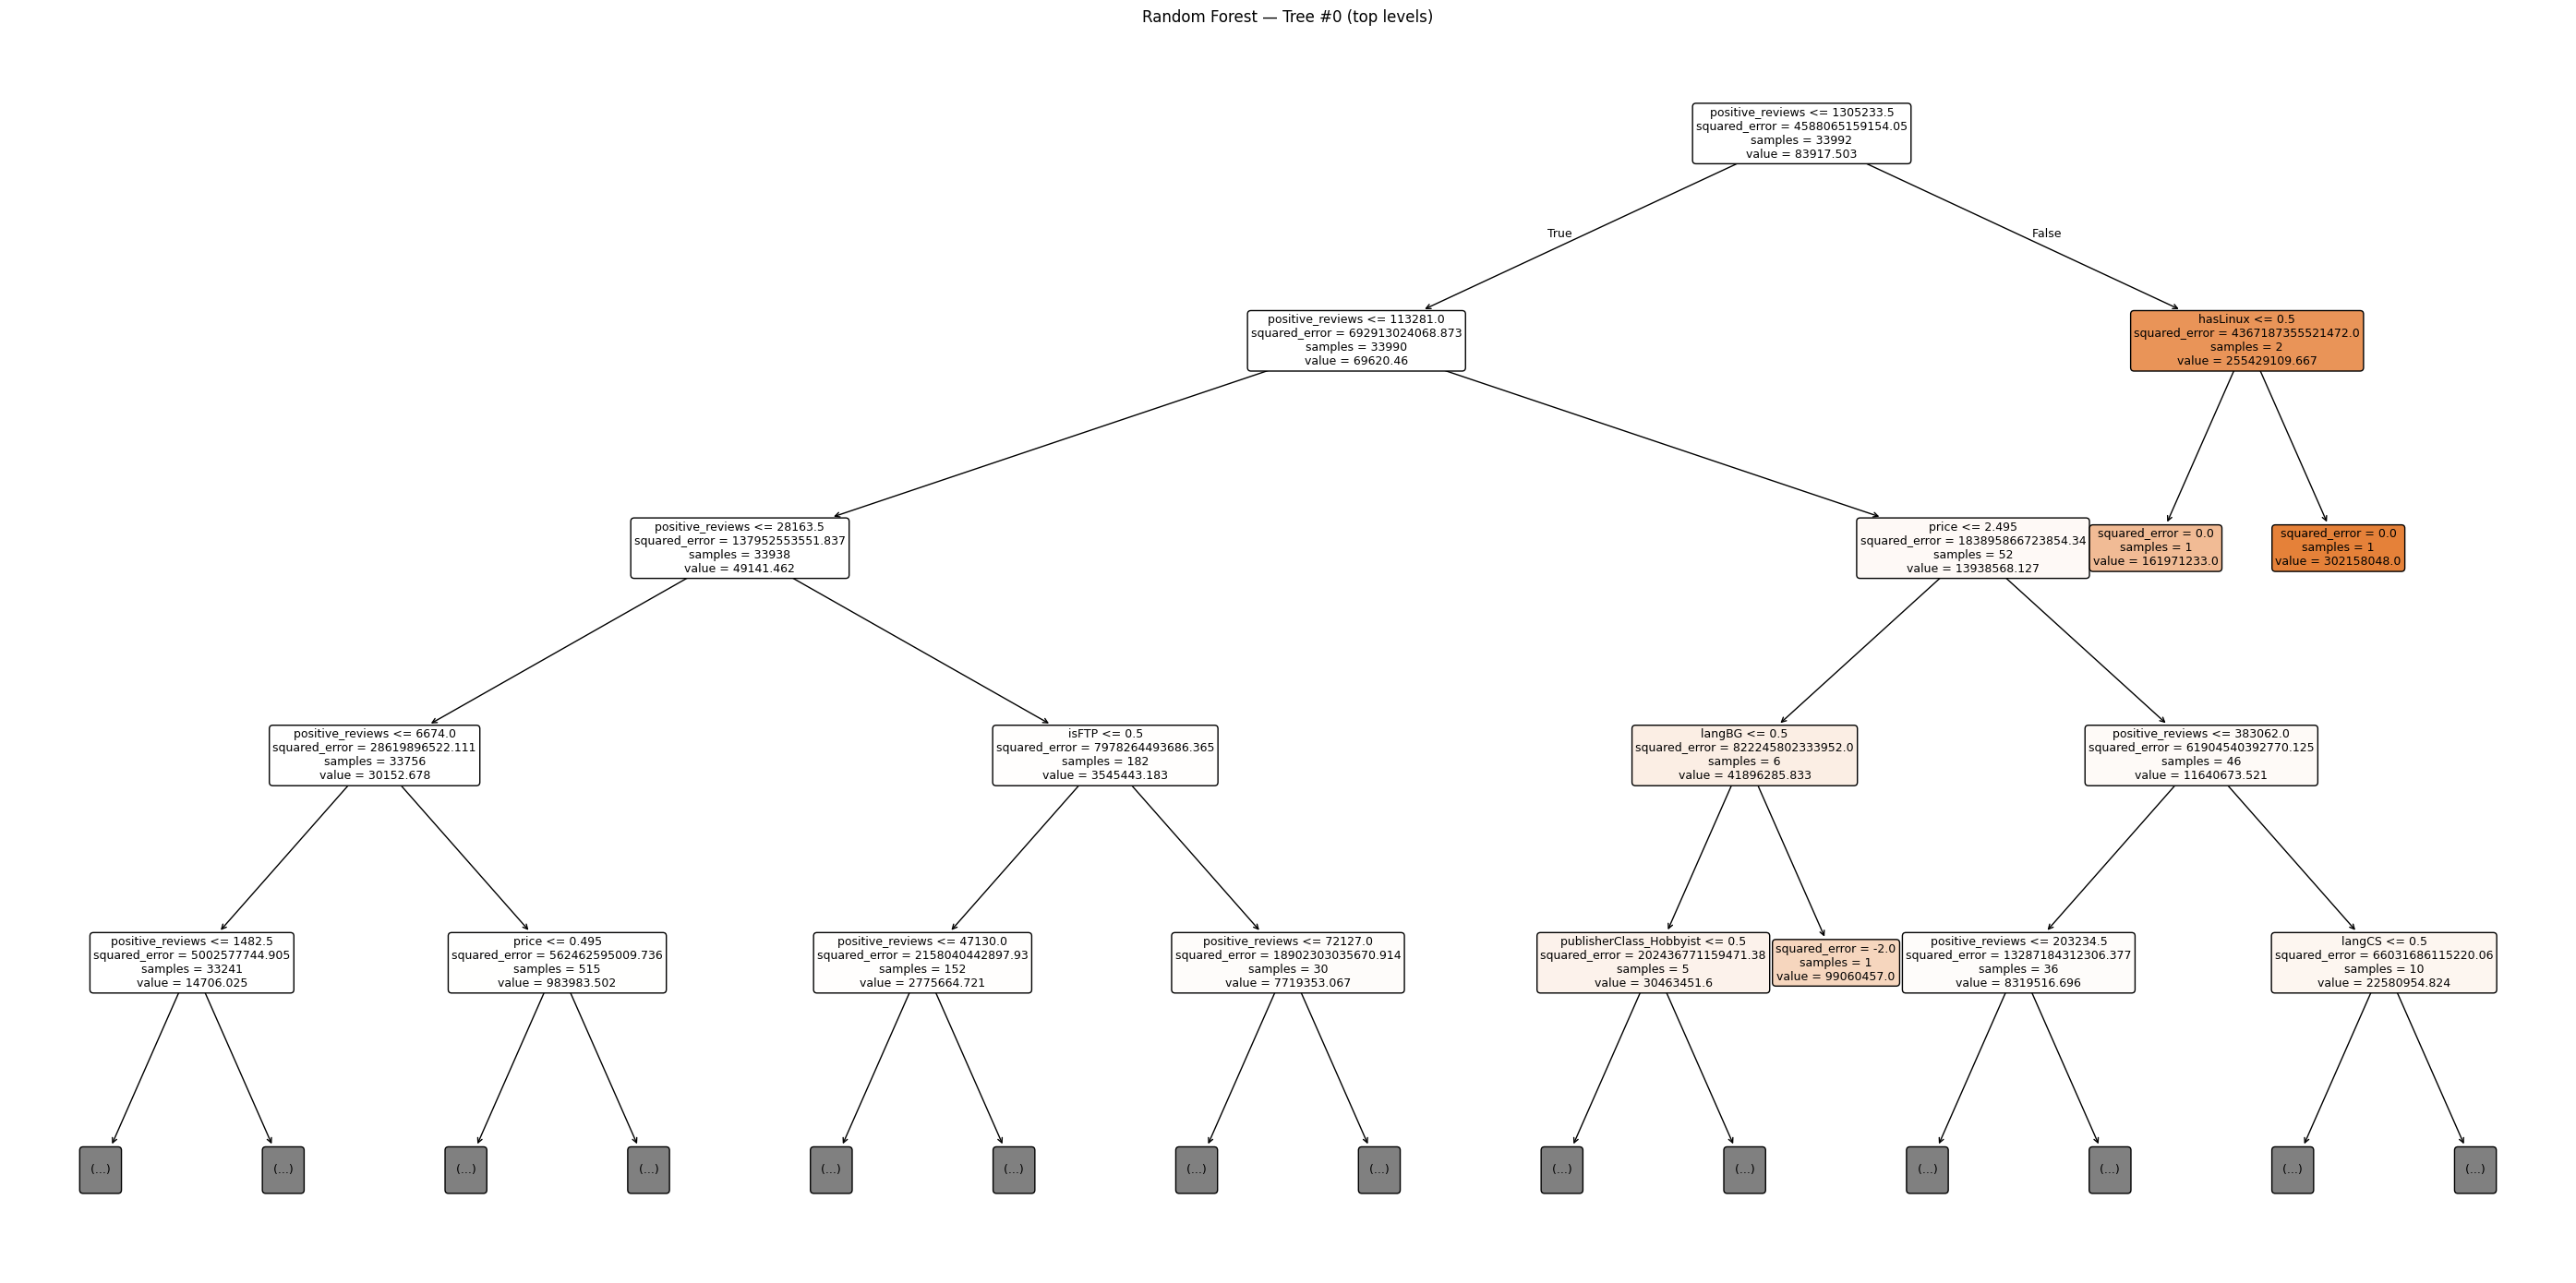

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree0 = rfg_model5.estimators_[2] #schimba arborele 0, 1, 2,....
plt.figure(figsize=(28, 14))
plot_tree(
    tree0,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=4,
    fontsize=9
)
plt.title("Random Forest — Tree #0 (top levels)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = rfg_model5.predict(X_valid)

bins = [-float("inf"), 10, 100, 1000, 10000, 100000, float("inf")]
labels = ["0-10", "11-100", "101-1k", "1k-10k", "10k-100k", "100k+"]

y_true_cls = pd.cut(y_valid, bins=bins, labels=labels)
y_pred_cls = pd.cut(pd.Series(y_pred, index=y_valid.index), bins=bins, labels=labels)

print(classification_report(y_true_cls, y_pred_cls))

              precision    recall  f1-score   support

        0-10       0.75      0.51      0.61      1134
       100k+       0.83      0.91      0.87       729
      101-1k       0.78      0.84      0.81      3854
    10k-100k       0.77      0.83      0.80      1586
      11-100       0.75      0.72      0.74      3018
      1k-10k       0.83      0.84      0.83      3127

    accuracy                           0.79     13448
   macro avg       0.79      0.77      0.78     13448
weighted avg       0.79      0.79      0.78     13448



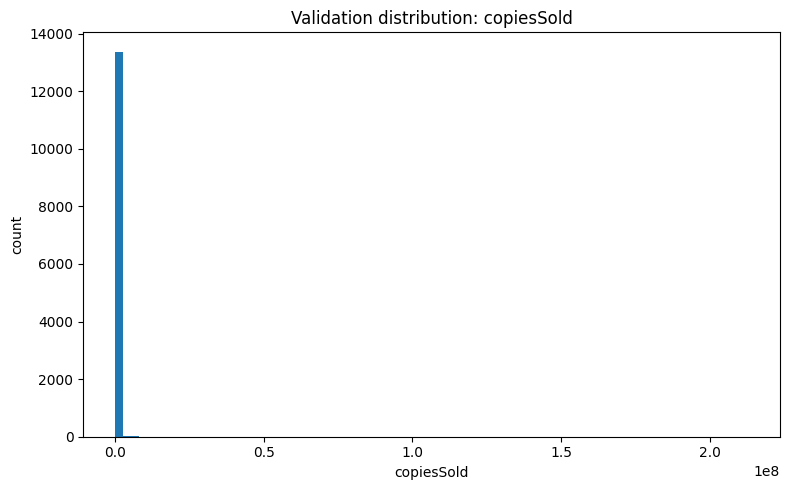

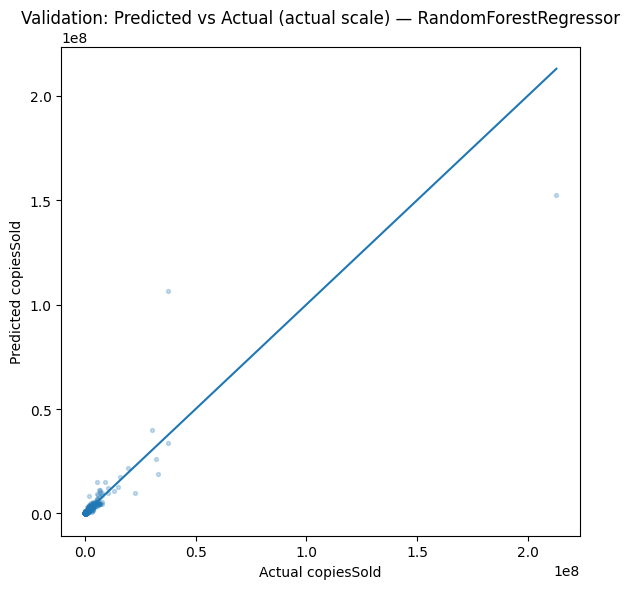

In [ ]:
y_pred = rfg_model5.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale) — RandomForestRegressor")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = rfg_model5.predict(X_valid)

res = pd.DataFrame({
    "copiesSold_actual": np.asarray(y_valid).ravel(),
    "copiesSold_pred":   np.asarray(y_pred).ravel(),
}, index=X_valid.index)

THRESH = 1.0e8
mask = (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > actual and pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 2 points with pred > actual and pred > 100000000
       copiesSold_actual  copiesSold_pred      abs_err
65907          212896574     1.523716e+08  60524973.20
24112           37324726     1.063502e+08  69025472.27


Outlierii sunt Dota 2 si Terraria

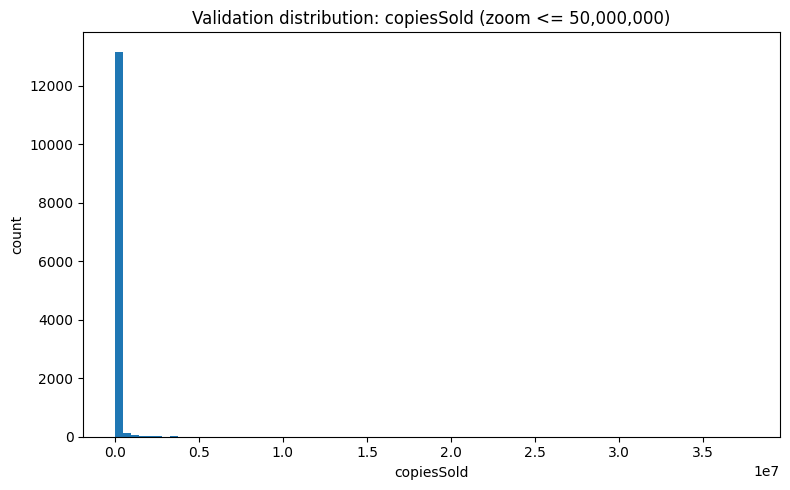

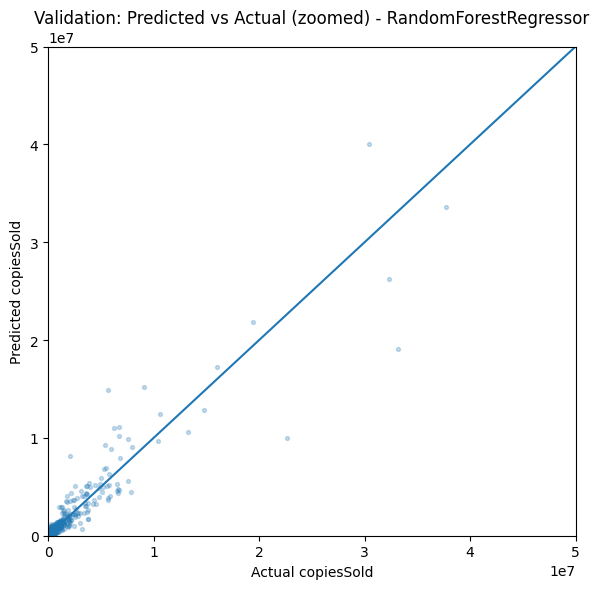

In [ ]:
y_pred = rfg_model5.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

ZOOM_MAX_X = 0.5e8
ZOOM_MAX_Y = 0.5e8

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)

plt.plot([0, min(ZOOM_MAX_X, ZOOM_MAX_Y)], [0, min(ZOOM_MAX_X, ZOOM_MAX_Y)])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (zoomed) - RandomForestRegressor")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

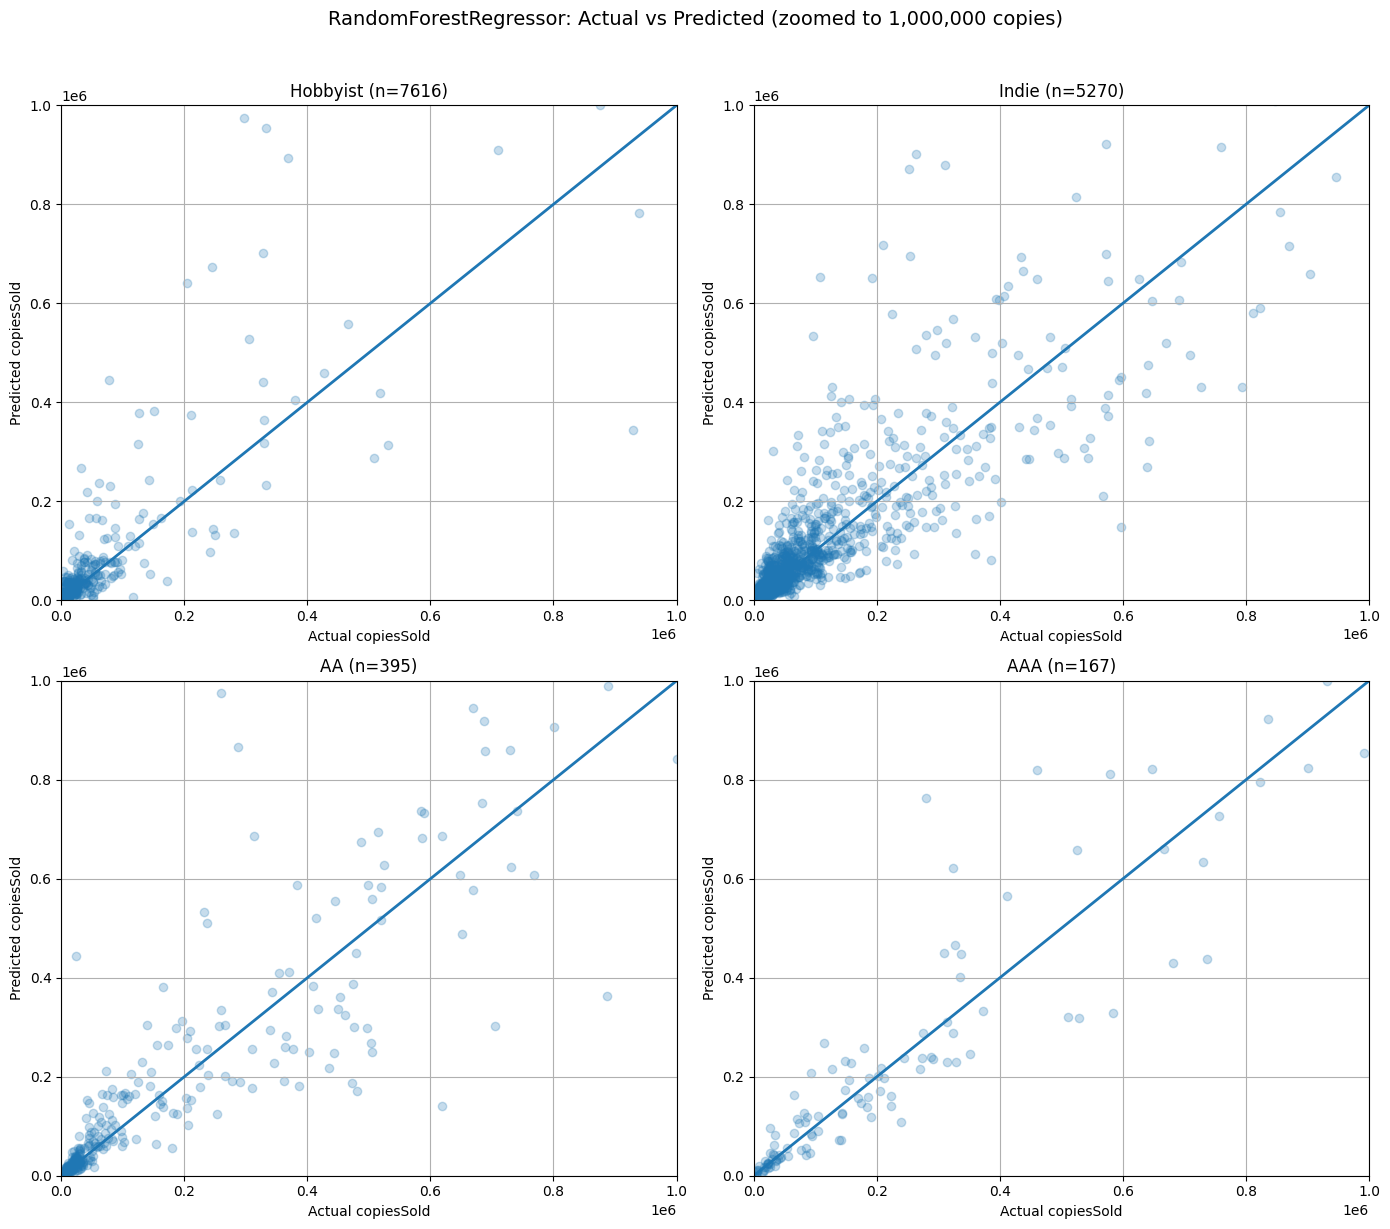

In [ ]:
Xv = X_valid.copy()
y_pred = rfg_model5.predict(Xv)

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(y_valid, index=Xv.index)
y_hat  = pd.Series(y_pred,  index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]

ZOOM_MAX = 1_000_000

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    ax.scatter(yt, yp, alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle("RandomForestRegressor: Actual vs Predicted (zoomed to 1,000,000 copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **Gradient Boosting Regressor**

loss='squared_error'

learning_rate=0.1

n_estimators=100

subsample=1.0

criterion='friedman_mse'

min_samples_split=2

min_samples_leaf=1

min_weight_fraction_leaf=0.0

max_depth=3

min_impurity_decrease=0.0

init=None

random_state=None

max_features=None

alpha=0.9

verbose=0

max_leaf_nodes=None

warm_start=False

validation_fraction=0.1

n_iter_no_change=None

tol=0.0001

ccp_alpha=0.0

loss={‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}

learning_rate= [0.0, inf).

n_estimators=  [1, inf), numere mari de obicei aduc o performanta mai buna

subsample= (0.0, 1.0], Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias

criterion={‘friedman_mse’, ‘squared_error’}

min_samples_split= [2, inf) sau (0.0, 1.0] and min_samples_split will be ceil(min_samples_split * n_samples).

min_samples_leaf= [1, inf) sau (0.0, 1.0) and min_samples_leaf will be ceil(min_samples_leaf * n_samples).

min_weight_fraction_leaf= [0.0, 0.5]

max_depth= [1, inf)

min_impurity_decrease= [0.0, inf), un nod va fi impartit daca reduce impuritatea mai mult decat acest numar

init=None

random_state=None

max_features={‘sqrt’, ‘log2’}

alpha=(0.0, 1.0), functioneaza doar daca loss = 'huber' sau 'quantile'

verbose= [0, inf) nr mesaje trimise

max_leaf_nodes= [2, inf)

warm_start=False

validation_fraction= training data to set aside as validation set for early stopping. Values must be in the range (0.0, 1.0). Only used if **n_iter_no_change** is set to an **integer**

n_iter_no_change=None

tol= Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops. Values must be in the range [0.0, inf).

ccp_alpha=[0.0, inf)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr.predict(X_valid) #fitting pe date noi

In [ ]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   40,492
RMSE:  1,328,738
sMAPE: 121.75%
R²: 56.68%


In [ ]:
y_pred_train = gbr.predict(X_train) #predictie pe datele pe care s-a antrenat

In [ ]:
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   23,278
RMSE:  183,481
sMAPE: 120.71%
R²: 98.97%


Modelul 1

In [ ]:
gbr_model1 = GradientBoostingRegressor(learning_rate=0.2, n_estimators=600, max_depth=3)
gbr_model1.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=600)

In [ ]:
y_pred = gbr_model1.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   38,396
RMSE:  1,383,118
sMAPE: 118.16%
R²: 53.06%


Model 2

In [ ]:
gbr_model2 = GradientBoostingRegressor(learning_rate=0.2, n_estimators=2000, max_depth=3)
gbr_model2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=2000)

In [ ]:
y_pred = gbr_model2.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   41,274
RMSE:  1,412,429
sMAPE: 106.46%
R²: 51.05%


Model 3

In [ ]:
gbr_model3 = GradientBoostingRegressor(learning_rate=0.015, n_estimators=200, max_depth=2, min_samples_leaf=5,
    min_samples_split=10, subsample=0.8)
gbr_model3.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.015, max_depth=2, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=200,
                          subsample=0.8)

In [ ]:
y_pred = gbr_model3.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   62,583
RMSE:  1,013,993
sMAPE: 162.41%
R²: 74.77%


Model 4

In [ ]:
gbr_model4 = GradientBoostingRegressor(loss="huber", alpha=0.9, n_estimators=2000, learning_rate=0.02, max_depth=3, min_samples_leaf=10, min_samples_split=20, subsample=0.8)
gbr_model4.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, loss='huber', min_samples_leaf=10,
                          min_samples_split=20, n_estimators=2000,
                          subsample=0.8)

In [ ]:
y_pred = gbr_model4.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   31,533
RMSE:  1,417,889
sMAPE: 90.35%
R²: 50.67%


Model 5

In [ ]:
gbr_model5 = GradientBoostingRegressor(learning_rate=0.015, n_estimators=200, max_depth=4, min_samples_leaf=5,
    min_samples_split=10, subsample=0.8, random_state=42)
gbr_model5.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.015, max_depth=4, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=200,
                          random_state=42, subsample=0.8)

In [ ]:
y_pred = gbr_model5.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   46,413
RMSE:  1,125,210
sMAPE: 145.32%
R²: 68.93%


Model 6

In [ ]:
gbr_model6 = GradientBoostingRegressor(learning_rate=0.015, n_estimators=200, max_depth=7, min_samples_leaf=5,
    min_samples_split=5, subsample=0.5, random_state=42)
gbr_model6.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.015, max_depth=7, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=200,
                          random_state=42, subsample=0.5)

In [ ]:
y_pred = gbr_model6.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   39,631
RMSE:  1,180,732
sMAPE: 138.36%
R²: 65.79%


Concluzionam ca cel mai potrivit model este modelul 6

In [ ]:
y_pred_train = gbr_model6.predict(X_train) #predictie pe datele pe care s-a antrenat

mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   32,321
RMSE:  1,050,961
sMAPE: 137.32%
R²: 66.22%


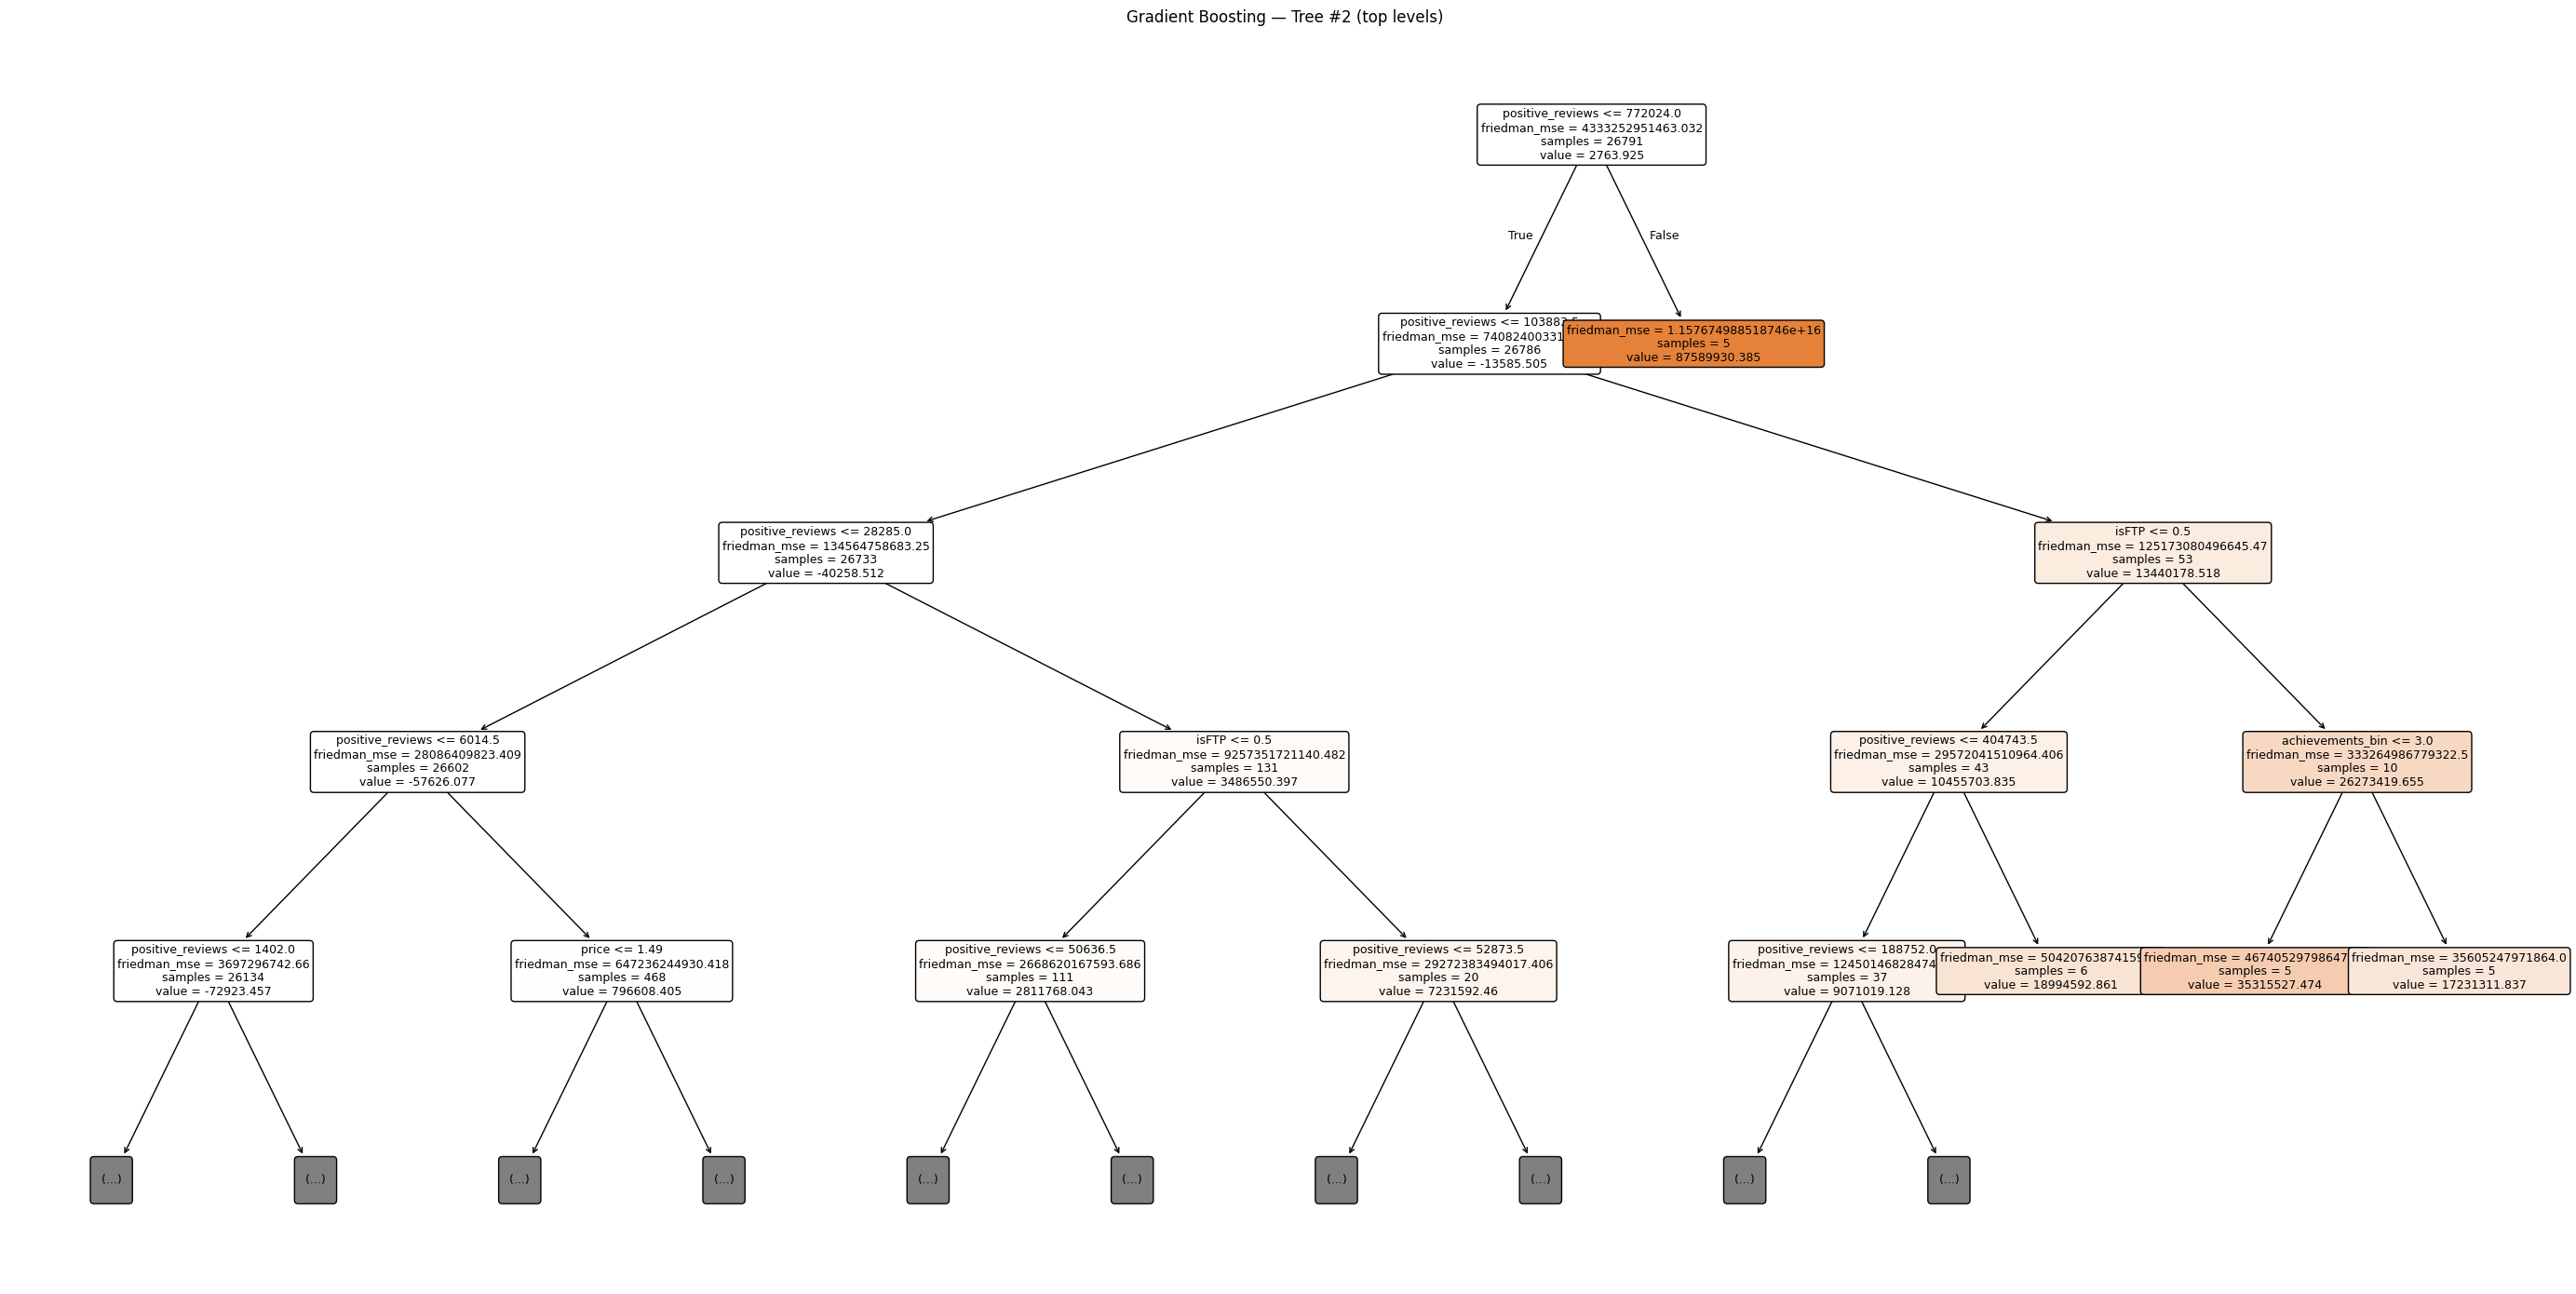

In [ ]:
from sklearn.tree import plot_tree

tree0 = gbr_model6.estimators_[2, 0]   #schimba arborele 0, 1, 2...

plt.figure(figsize=(28, 14))
plot_tree(
    tree0,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=4,
    fontsize=9
)
plt.title("Gradient Boosting — Tree #2 (top levels)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = gbr_model6.predict(X_valid)

bins = [-float("inf"), 10, 100, 1000, 10000, 100000, float("inf")]
labels = ["0-10", "11-100", "101-1k", "1k-10k", "10k-100k", "100k+"]

y_true_cls = pd.cut(y_valid, bins=bins, labels=labels)
y_pred_cls = pd.cut(pd.Series(y_pred, index=y_valid.index), bins=bins, labels=labels)

print(classification_report(y_true_cls, y_pred_cls))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        0-10       0.00      0.00      0.00      1134
       100k+       0.82      0.90      0.86       729
      101-1k       0.00      0.00      0.00      3854
    10k-100k       0.61      0.87      0.72      1586
      11-100       0.00      0.00      0.00      3018
      1k-10k       0.23      0.75      0.35      3127

    accuracy                           0.33     13448
   macro avg       0.28      0.42      0.32     13448
weighted avg       0.17      0.33      0.21     13448



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                     Feature  Importance
            positive_reviews    0.895671
                       price    0.036870
                       isFTP    0.035112
             reviewScore_bin    0.004410
                    hasLinux    0.002722
                    isCasual    0.002673
            achievements_bin    0.002336
                    langPTpt    0.001669
                      langTH    0.001638
                      langCS    0.001500
                      hasMac    0.001196
            workshop_support    0.001005
                 isAdventure    0.000935
                     isIndie    0.000772
date_bins_Years_2017_to_2019    0.000746
                    isAction    0.000709
         steam_trading_cards    0.000691
 metacritic_category_Unrated    0.000690
                      langKO    0.000669
                isSimulation    0.000628
  date_bins_From_2023_Onward    0.000592
          publisherClass_AAA    0.000563
date_bins_Years_2013_to_2016    0.000432
                

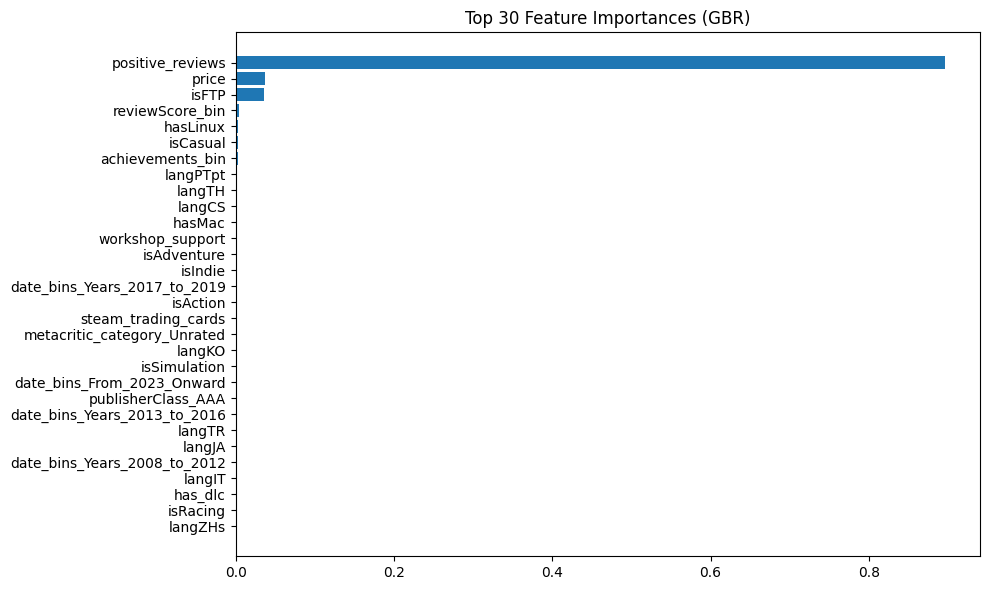

In [ ]:
imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": gbr_model6.feature_importances_
}).sort_values("Importance", ascending=False)

print(imp.head(30).to_string(index=False))

top = imp.head(30)
plt.figure(figsize=(10,6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 30 Feature Importances (GBR)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(gbr_model6, X_valid, y_valid, n_repeats=5, random_state=42, n_jobs=1)
perm_df = pd.DataFrame({
    "Feature": X_valid.columns,
    "PermImportance": perm.importances_mean
}).sort_values("PermImportance", ascending=False)

print(perm_df.head(30).to_string(index=False))

                     Feature  PermImportance
            positive_reviews        1.189192
                       isFTP        0.038404
                       price        0.031242
                    langPTpt        0.002353
             reviewScore_bin        0.001594
                      langTH        0.001570
                    isCasual        0.001038
 metacritic_category_Unrated        0.000395
date_bins_Years_2013_to_2016        0.000274
                    langESes        0.000234
            workshop_support        0.000150
                      langDE        0.000123
date_bins_Years_2020_to_2022        0.000122
                      langTR        0.000116
  date_bins_From_2023_Onward        0.000097
                     isIndie        0.000095
                      langRU        0.000071
        publisherClass_Indie        0.000062
date_bins_Years_2008_to_2012        0.000059
                     has_dlc        0.000052
                      langNL        0.000039
          

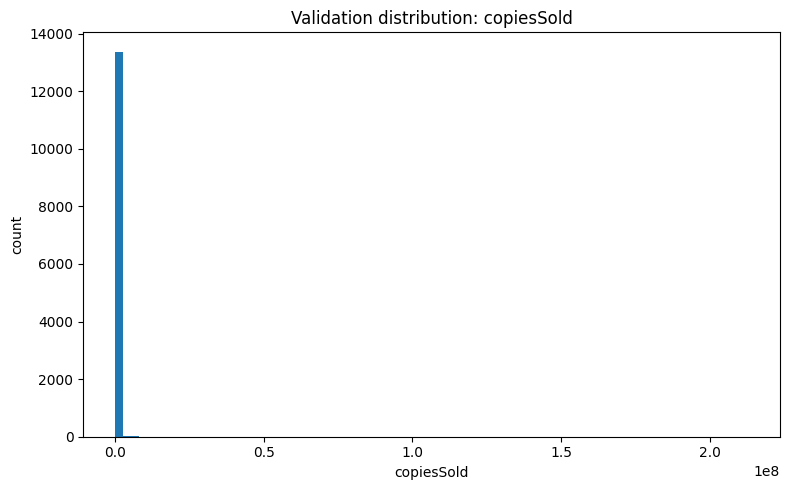

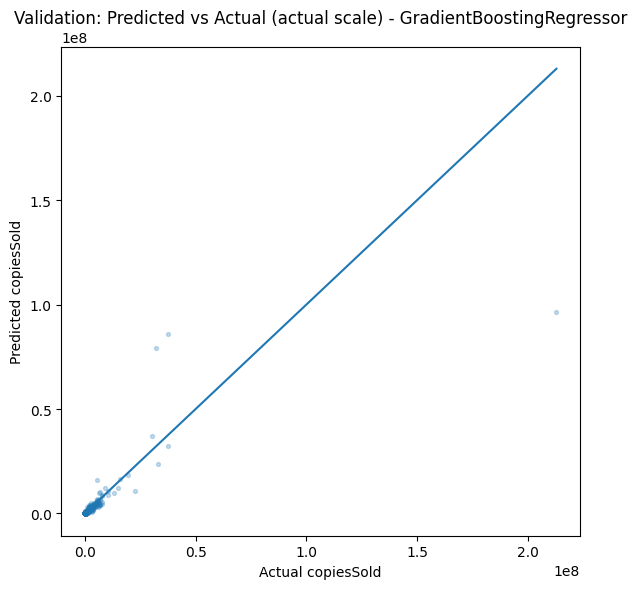

In [ ]:
y_pred = gbr_model6.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale) - GradientBoostingRegressor")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = gbr_model6.predict(X_valid)

res = pd.DataFrame({
    "copiesSold_actual": np.asarray(y_valid).ravel(),
    "copiesSold_pred":   np.asarray(y_pred).ravel(),
}, index=X_valid.index)

THRESH = 0.5e8
mask = (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > actual and pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 3 points with pred > actual and pred > 50000000
       copiesSold_actual  copiesSold_pred       abs_err
65907          212896574     9.644382e+07  1.164528e+08
24112           37324726     8.568695e+07  4.836222e+07
66016           32262292     7.926523e+07  4.700294e+07


Cei 3 outlieri sunt Dota 2, Terarria si Tom Clancy's Rainbow Six Siege

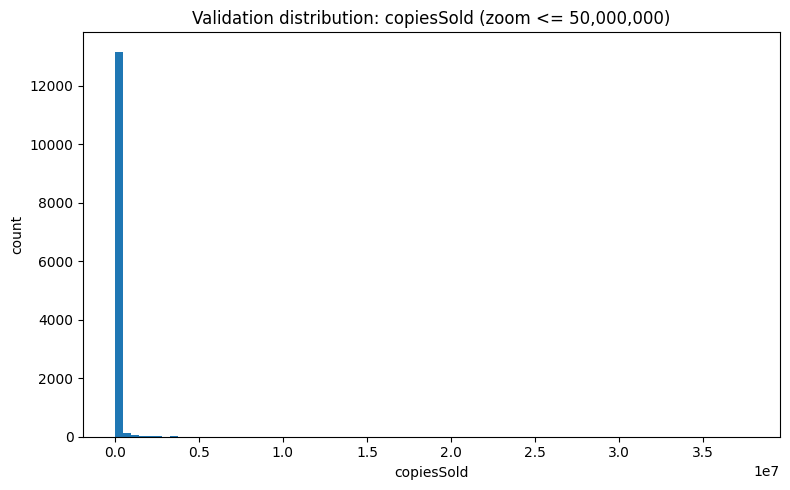

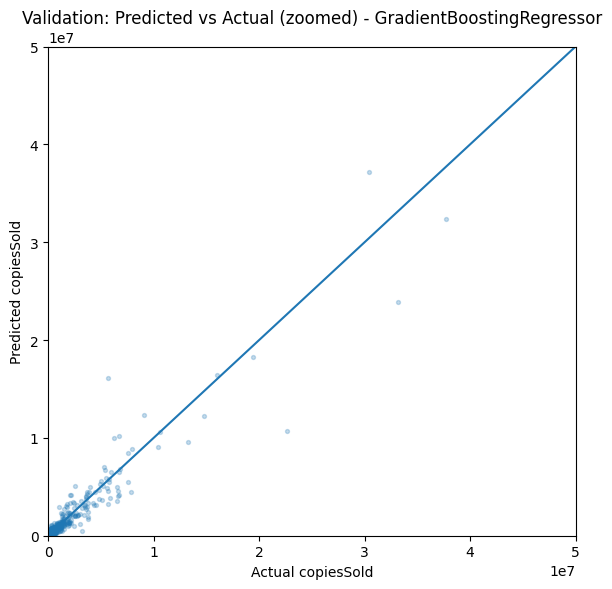

In [ ]:
y_pred = gbr_model6.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

ZOOM_MAX_X = 0.5e8
ZOOM_MAX_Y = 0.5e8

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)

plt.plot([0, min(ZOOM_MAX_X, ZOOM_MAX_Y)], [0, min(ZOOM_MAX_X, ZOOM_MAX_Y)])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (zoomed) - GradientBoostingRegressor")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

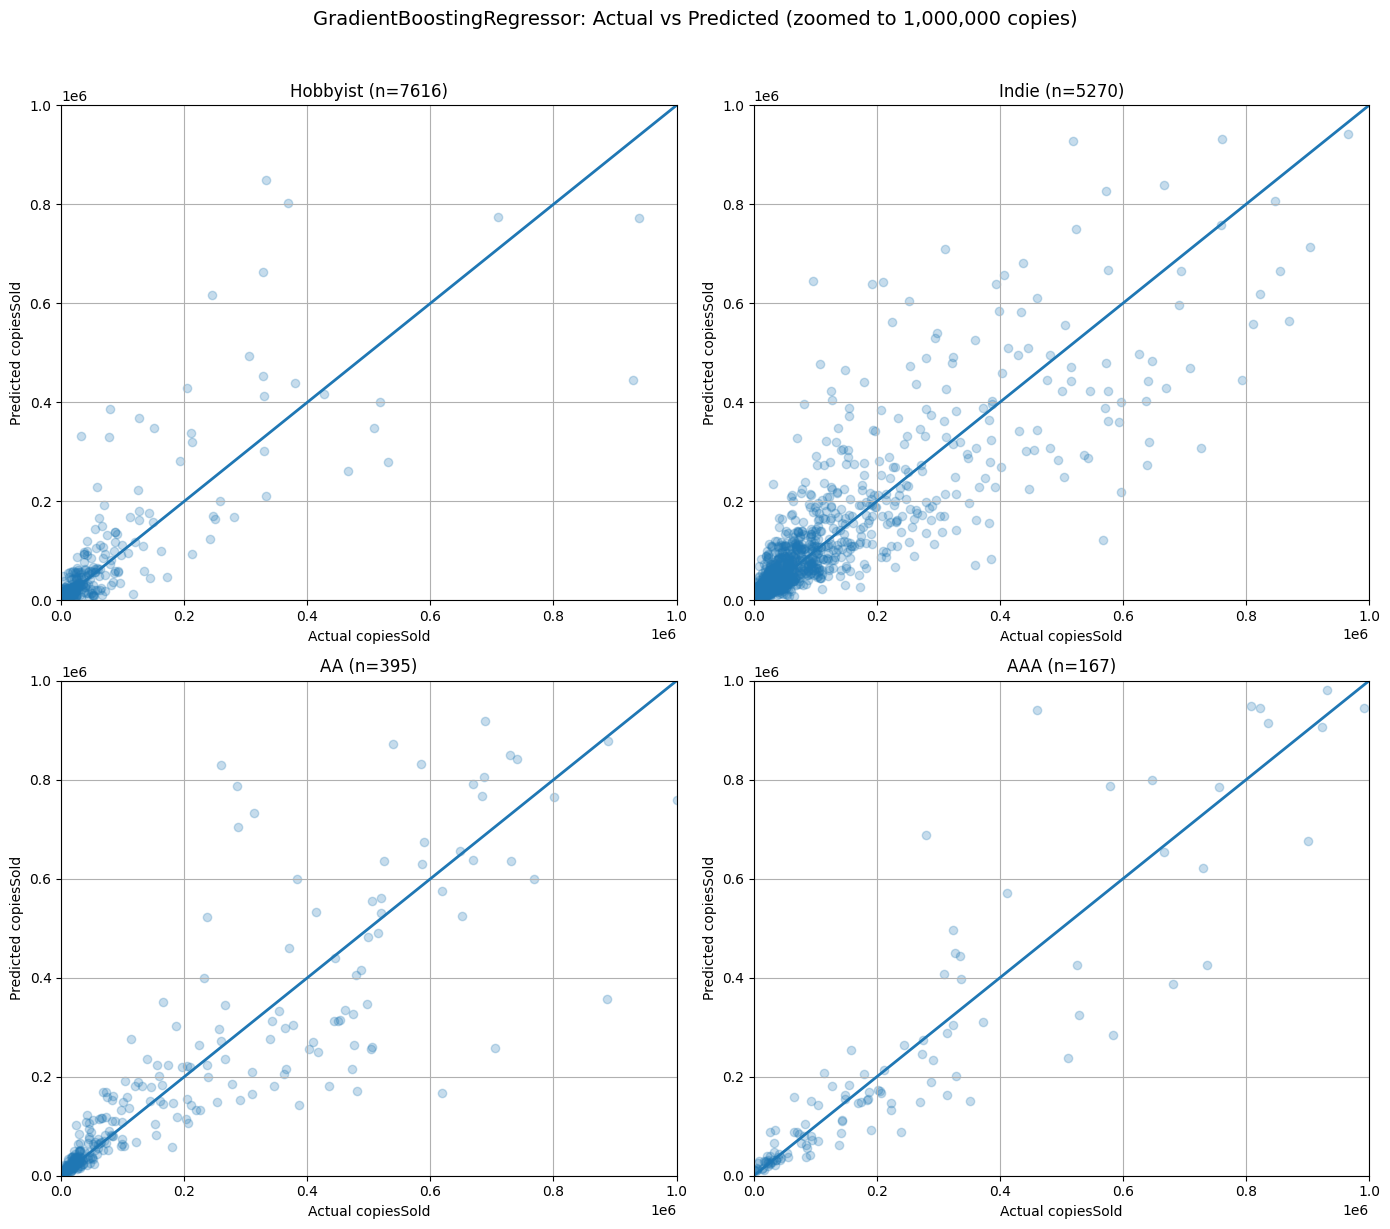

In [ ]:
Xv = X_valid.copy()
y_pred = gbr_model6.predict(Xv)

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(y_valid, index=Xv.index)
y_hat  = pd.Series(y_pred,  index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]

ZOOM_MAX = 1_000_000

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    ax.scatter(yt, yp, alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle("GradientBoostingRegressor: Actual vs Predicted (zoomed to 1,000,000 copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **Extreme Gradient Boosting**

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

n_estimators

learning_rate (0.01 - 0.3) recomandat

max_depth (2-8 recomandat)

min_child_weight (1-10 recomandat) increase to reduce overfitting

gamma (0-5 recomandat) penalizeaza un arbore complex, higher number = generalizare

reg_alpha (0-1) folositor cu multe feature-uri slabe sau corelate

reg_lambda (1-10) default de obicei e bine

subsample(0.6-1.0) <1.0 pt noisy data

colesample_bytree (0.6-1.0) fraction of features used per tree

colsample_bylevel = fractions of feature per tree level

objective `squarederror` `pseudohubererror` (pseudohuber pentru heavy tailed targets)

early_stopping_rounds

eval_metric

tree_method `hist` sau `gpu_hist`

max_bin

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_valid) #fitting pe date noi

In [ ]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   54,831
RMSE:  1,330,396
sMAPE: 118.85%
R²: 56.57%


In [ ]:
y_pred_train = xgb.predict(X_train) #predictie pe datele pe care s-a antrenat

In [ ]:
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   10,925
RMSE:  63,332
sMAPE: 116.26%
R²: 99.88%


Model 1

In [ ]:
xgb_model1 = XGBRegressor(n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1)
xgb_model1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model1.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   58,253
RMSE:  1,260,276
sMAPE: 144.67%
R²: 61.03%


Model 2

In [ ]:
xgb_model2 = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
xgb_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model2.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   54,831
RMSE:  1,330,396
sMAPE: 118.85%
R²: 56.57%


Model 3

In [ ]:
xgb_model3 = XGBRegressor(
    n_estimators=2500,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    reg_alpha=0.0,
    gamma=0.0,
    objective="reg:squarederror",
    tree_method="hist",
    n_jobs=-1,
)
xgb_model3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model3.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   62,848
RMSE:  949,775
sMAPE: 143.12%
R²: 77.87%


Model 4

In [ ]:
xgb_model4 = XGBRegressor(
    loss="squared_error",
    learning_rate=0.05,
    max_depth=6,
    max_iter=2000,
    min_samples_leaf=20,
    l2_regularization=1.0,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=50,
    random_state=42
)
xgb_model4.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:09:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping", "l2_regularization", "loss", "max_iter", "min_samples_leaf", "n_iter_no_change", "validation_fraction" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping=True,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, l2_regularization=1.0,
             learning_rate=0.05, loss='squared_error', max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_iter=2000, max_leaves=None,
             min_child_weight=None, min_samples_leaf=20, missing=nan, ...)

In [ ]:
y_pred = xgb_model4.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   53,277
RMSE:  1,417,006
sMAPE: 109.31%
R²: 50.73%


Model 5

In [ ]:
xgb_model5 = XGBRegressor(
    loss="squared_error",
    learning_rate=0.05,
    max_depth=8,
    max_iter=3000,
    min_samples_leaf=10,
    l2_regularization=0.1,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=50,
    random_state=42
)
xgb_model5.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:10:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping", "l2_regularization", "loss", "max_iter", "min_samples_leaf", "n_iter_no_change", "validation_fraction" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping=True,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, l2_regularization=0.1,
             learning_rate=0.05, loss='squared_error', max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_iter=3000, max_leaves=None,
             min_child_weight=None, min_samples_leaf=10, missing=nan, ...)

In [ ]:
y_pred = xgb_model5.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   56,202
RMSE:  1,584,355
sMAPE: 101.65%
R²: 38.41%


Model 6

In [ ]:
xgb_model6 = XGBRegressor(
    loss="absolute_error",
    learning_rate=0.05,
    max_depth=6,
    max_iter=3000,
    min_samples_leaf=20,
    l2_regularization=1.0,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=50,
    random_state=42
)
xgb_model6.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:10:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping", "l2_regularization", "loss", "max_iter", "min_samples_leaf", "n_iter_no_change", "validation_fraction" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping=True,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, l2_regularization=1.0,
             learning_rate=0.05, loss='absolute_error', max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_iter=3000, max_leaves=None,
             min_child_weight=None, min_samples_leaf=20, missing=nan, ...)

In [ ]:
y_pred = xgb_model6.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   53,277
RMSE:  1,417,006
sMAPE: 109.31%
R²: 50.73%


Model 7

In [ ]:
xgb_model7 = XGBRegressor(
    n_estimators=1500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
xgb_model7.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:10:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, bootstrap=False, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_features='sqrt', max_leaves=None, min_child_weight=None,
             min_samples_leaf=5, min_samples_split=10, missing=nan,
             monotone_constraints=None, ...)

In [ ]:
y_pred = xgb_model7.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   55,481
RMSE:  1,329,427
sMAPE: 90.89%
R²: 56.63%


Model 8

In [ ]:
xgb_model8 = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.03,
    max_depth=4,
    min_child_weight=10,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_lambda=10.0,
    reg_alpha=0.0,
    gamma=1.0,
    objective="reg:squarederror",
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

xgb_model8.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=1.0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=3000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model8.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   66,686
RMSE:  888,694
sMAPE: 142.42%
R²: 80.62%


Model 9

In [ ]:
xgb_model9 = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=8000,
    learning_rate=0.015,
    max_depth=2,
    min_child_weight=20,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=20.0,
    reg_alpha=1.0,
    gamma=2.0,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)
xgb_model9.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=2.0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.015, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=20, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=8000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model9.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   122,790
RMSE:  1,442,789
sMAPE: 169.23%
R²: 48.92%


Cel mai bun ramane modelul 8

In [ ]:
y_pred_train = xgb_model8.predict(X_train) #predictie pe datele pe care s-a antrenat

mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   34,753
RMSE:  267,802
sMAPE: 141.02%
R²: 97.81%


In [ ]:
from sklearn.metrics import classification_report

y_pred = xgb_model8.predict(X_valid)

bins = [-float("inf"), 10, 100, 1000, 10000, 100000, float("inf")]
labels = ["0-10", "11-100", "101-1k", "1k-10k", "10k-100k", "100k+"]

y_true_cls = pd.cut(y_valid, bins=bins, labels=labels)
y_pred_cls = pd.cut(pd.Series(y_pred, index=y_valid.index), bins=bins, labels=labels)

print(classification_report(y_true_cls, y_pred_cls))

              precision    recall  f1-score   support

        0-10       0.13      0.59      0.21      1134
       100k+       0.69      0.85      0.76       729
      101-1k       0.42      0.21      0.28      3854
    10k-100k       0.48      0.64      0.55      1586
      11-100       0.24      0.02      0.03      3018
      1k-10k       0.45      0.43      0.44      3127

    accuracy                           0.34     13448
   macro avg       0.40      0.46      0.38     13448
weighted avg       0.38      0.34      0.31     13448



                     Feature  Importance
                      langUK    0.073548
                       isFTP    0.062416
                      langTH    0.042340
                      langEL    0.040429
                      langPL    0.040055
                    langPTpt    0.038669
                isSimulation    0.031709
                      langRO    0.029384
            positive_reviews    0.028747
                      langVI    0.025177
                    isAction    0.023984
                    hasLinux    0.023591
                      langFI    0.023035
 metacritic_category_Unrated    0.022411
            achievements_bin    0.021874
                    langESla    0.020866
date_bins_Years_2020_to_2022    0.020322
                       price    0.019586
                     isIndie    0.019539
                      langNO    0.019132
                      hasMac    0.016937
date_bins_Years_2017_to_2019    0.016575
                      langBG    0.015444
     publisherCl

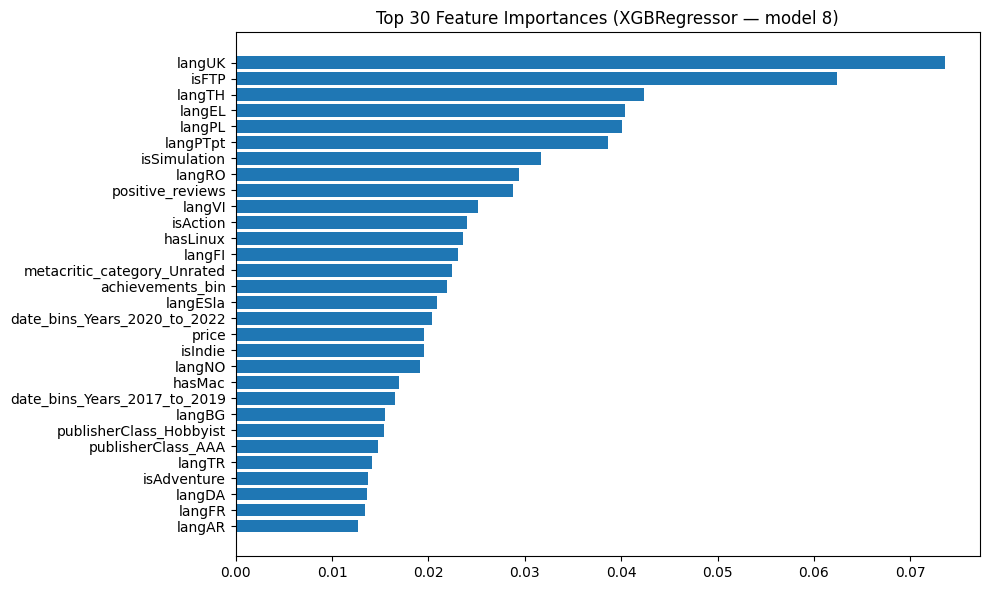

In [ ]:
imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model8.feature_importances_
}).sort_values("Importance", ascending=False)

print(imp.head(30).to_string(index=False))

top = imp.head(30)
plt.figure(figsize=(10,6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 30 Feature Importances (XGBRegressor — model 8)")
plt.tight_layout()
plt.show()

positive_reviews                105690.794531
isFTP                            16577.328906
publisherClass_AAA               14545.116797
price                            10090.469922
langBG                            6713.832812
date_bins_Years_2008_to_2012      6555.180078
langID                            6201.687109
langUK                            5752.652344
langTH                            5103.073828
langAR                            4478.592188
steam_trading_cards               4084.225000
hasMac                            3822.985938
langRO                            3737.273828
langVI                            3570.091016
langFI                            3209.137891
reviewScore_bin                   2602.107031
isAction                          2398.566406
workshop_support                  2332.925781
langPTpt                          2261.705859
langNL                            2203.163281
langPL                            2175.407031
langDA                            

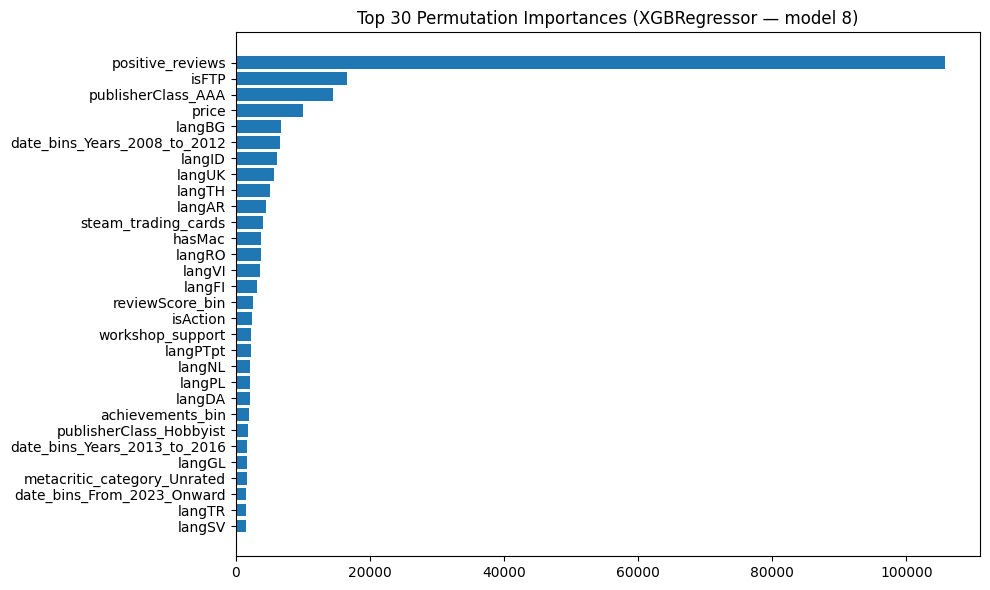

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    xgb_model8,
    X_valid, y_valid,
    n_repeats=20,
    random_state=42,
    scoring="neg_mean_absolute_error",
    n_jobs=1
)

perm_imp = pd.Series(perm.importances_mean, index=X_valid.columns).sort_values(ascending=False)
print(perm_imp.head(30).to_string())

top = perm_imp.head(30).sort_values()
plt.figure(figsize=(10,6))
plt.barh(top.index, top.values)
plt.title("Top 30 Permutation Importances (XGBRegressor — model 8)")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2800x1400 with 0 Axes>

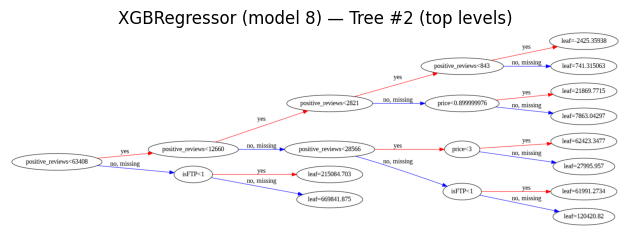

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(28, 14))
xgb.plot_tree(
    xgb_model8,
    num_trees=2,              #achimba arborele: 0,1,2..
    rankdir="LR",
)
plt.title("XGBRegressor (model 8) — Tree #2 (top levels)")
plt.tight_layout()
plt.show()

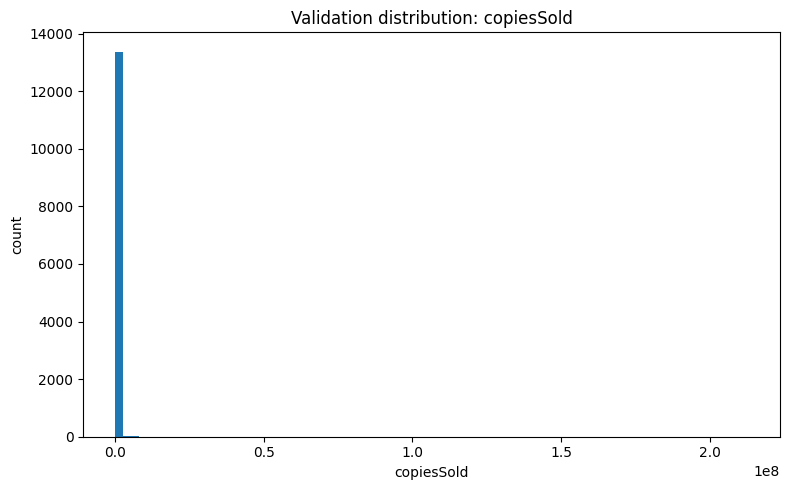

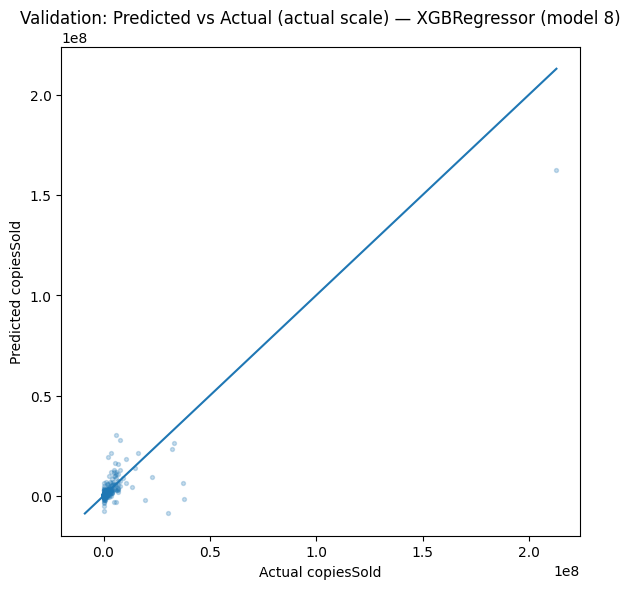

In [ ]:
y_pred = xgb_model8.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale) — XGBRegressor (model 8)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = xgb_model8.predict(X_valid)

res = pd.DataFrame({
    "copiesSold_actual": np.asarray(y_valid).ravel(),
    "copiesSold_pred":   np.asarray(y_pred).ravel(),
}, index=X_valid.index)

THRESH = 0.5e8
mask = (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > actual and pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 1 points with pred > actual and pred > 50000000
       copiesSold_actual  copiesSold_pred     abs_err
65907          212896574      162270976.0  50625598.0


Outlierul este Dota 2

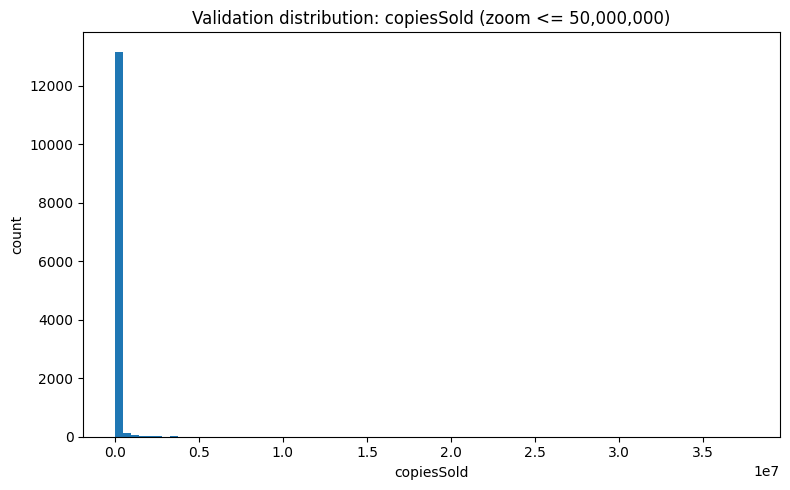

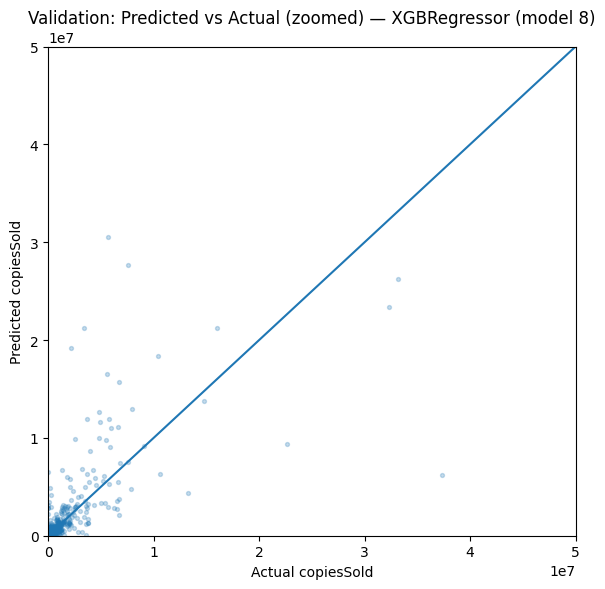

In [ ]:
y_pred = xgb_model8.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

ZOOM_MAX_X = 0.5e8
ZOOM_MAX_Y = 0.5e8

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)

plt.plot([0, min(ZOOM_MAX_X, ZOOM_MAX_Y)], [0, min(ZOOM_MAX_X, ZOOM_MAX_Y)])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (zoomed) — XGBRegressor (model 8)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

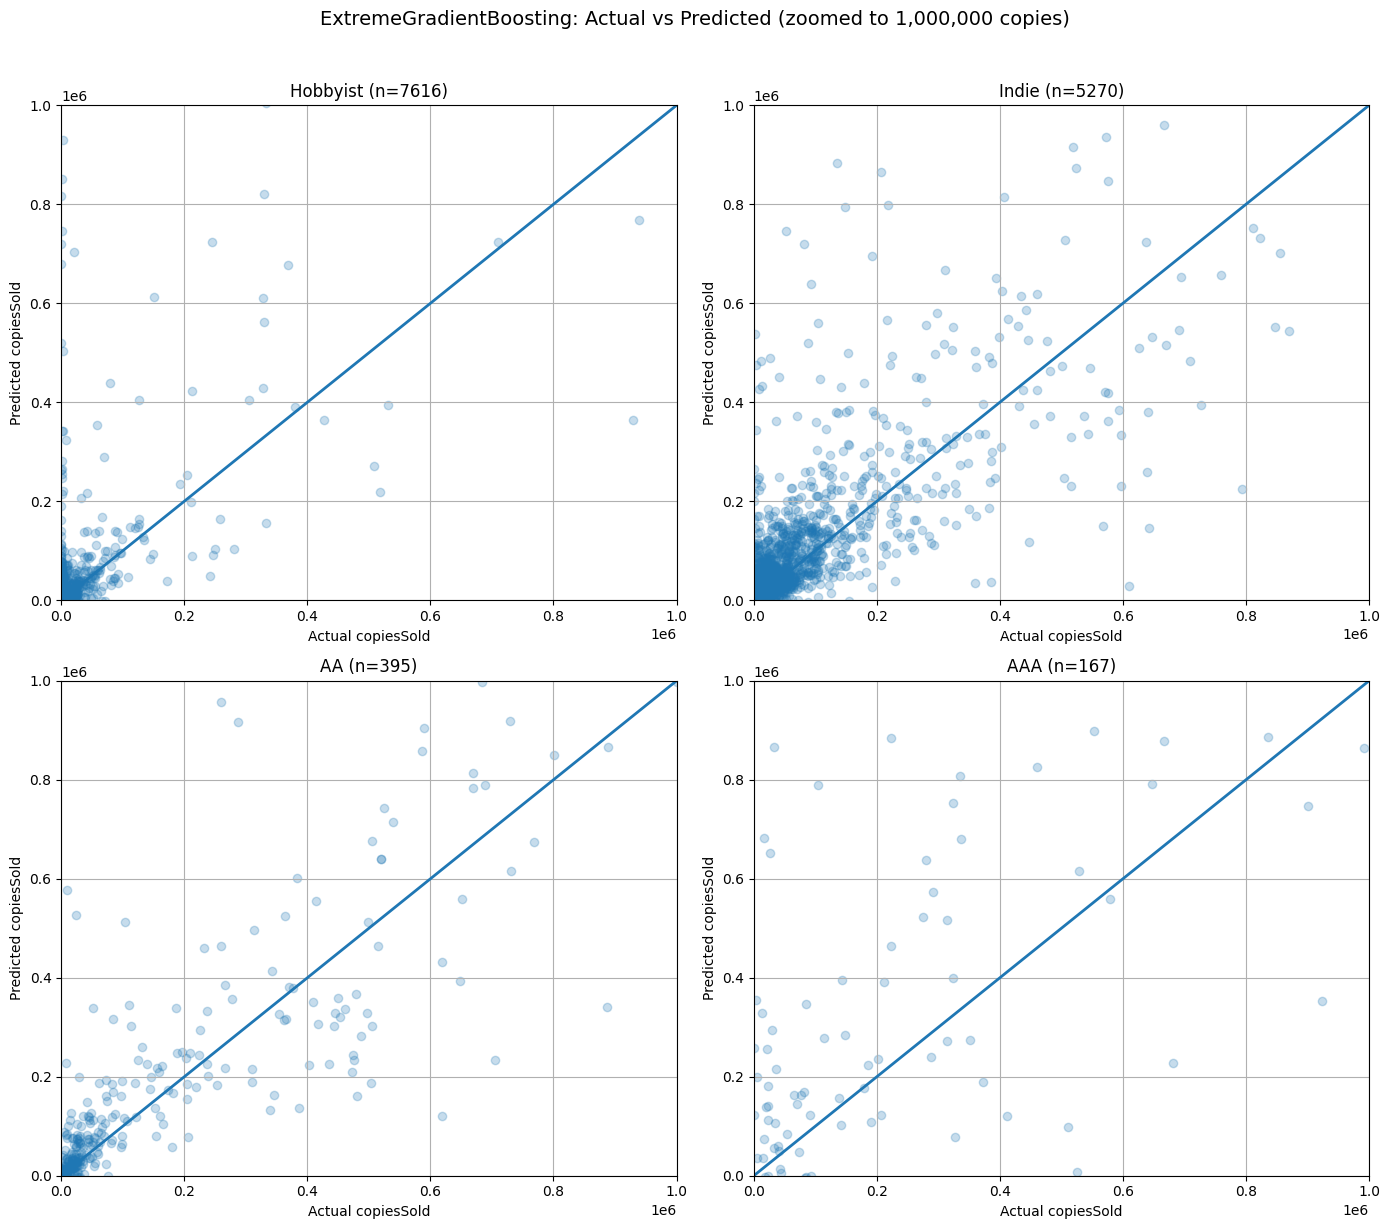

In [ ]:
Xv = X_valid.copy()
y_pred = xgb_model8.predict(Xv)

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(y_valid, index=Xv.index)
y_hat  = pd.Series(y_pred,  index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]

ZOOM_MAX = 1_000_000

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    ax.scatter(yt, yp, alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle("ExtremeGradientBoosting: Actual vs Predicted (zoomed to 1,000,000 copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **LGBMRegressor**

n_estimators

learning_rate = 0.01-0.3

boosting_type = `gbdt` `dart` `goss`

num_leaves < = 2^max_depth

max_depth = (-1 sau 4-12)

min_child_samples = 20-200

subsample = 0.6-1.0

subsample_freq = 1-5

colsample_bytree = 0.6-1.0

reg_alpha = 0-1

reg_lambda = 0-10

min_split_gain = 0-1

objective = `regression` `regression_l1` `huber` `fair`

metric = `rmse` `mae`

early_stopping_rounds = 30-200

max_bin = 255

device_type = `cpu` `gpu`

In [ ]:
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor, early_stopping

In [ ]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 53583, number of used features: 142
[LightGBM] [Info] Start training from score 89037.600564


LGBMRegressor()

In [ ]:
y_pred = lgbm.predict(X_valid) #fitting pe date noi

In [ ]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1e-9, denom)
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom) * 100

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   43,595
RMSE:  1,363,941
sMAPE: 102.52%
R²: 54.35%


In [ ]:
y_pred_train = lgbm.predict(X_train) #predictie pe datele pe care s-a antrenat

In [ ]:
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   35,025
RMSE:  1,068,137
sMAPE: 101.33%
R²: 65.10%


Model 1

In [ ]:
lgbm_model1 = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=50,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)
lgbm_model1.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.374427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 53583, number of used features: 142
[LightGBM] [Info] Start training from score 89037.600564


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, min_child_samples=50,
              n_estimators=5000, n_jobs=-1, random_state=42, reg_lambda=1.0,
              subsample=0.8)

In [ ]:
y_pred = lgbm_model1.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   73,231
RMSE:  1,181,697
sMAPE: 141.85%
R²: 65.74%


Model 2

In [ ]:
lgbm_model2 = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=50,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0
)
lgbm_model2.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 53583, number of used features: 142
[LightGBM] [Info] Start training from score 89037.600564


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, min_child_samples=50,
              n_estimators=5000, reg_lambda=1.0, subsample=0.8)

In [ ]:
y_pred = lgbm_model2.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   72,904
RMSE:  1,183,821
sMAPE: 144.30%
R²: 65.61%


Model 3

In [ ]:
lgbm_model3 = LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    num_leaves=16,
    max_depth=6,
    min_child_samples=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=5.0,
    random_state=42,
    n_jobs=-1
)

lgbm_model3.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",
    callbacks=[early_stopping(stopping_rounds=100, verbose=False)]
)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=6,
              min_child_samples=100, n_estimators=3000, n_jobs=-1,
              num_leaves=16, random_state=42, reg_lambda=5.0, subsample=0.8)

In [ ]:
y_pred = lgbm_model3.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   71,040
RMSE:  1,232,821
sMAPE: 144.43%
R²: 62.71%


Model 4

In [ ]:
lgbm_model4 = LGBMRegressor(
    n_estimators=12000,
    learning_rate=0.02,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=120,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.0,
    reg_lambda=5.0,
    random_state=42,
    n_jobs=-1
)

lgbm_model4.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",
    callbacks=[early_stopping(stopping_rounds=300, verbose=False)]
)

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.02, min_child_samples=120,
              n_estimators=12000, n_jobs=-1, random_state=42, reg_lambda=5.0,
              subsample=0.7)

In [ ]:
y_pred = lgbm_model4.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   96,692
RMSE:  1,259,710
sMAPE: 153.88%
R²: 61.06%


Model 5

In [ ]:
lgbm_model5 = LGBMRegressor(
    n_estimators=8000,
    learning_rate=0.03,
    num_leaves=16,
    max_depth=8,
    min_child_samples=80,
    subsample=0.85,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=3.0,
    random_state=42,
    n_jobs=-1
)

lgbm_model5.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",
    callbacks=[early_stopping(stopping_rounds=200, verbose=False)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 53583, number of used features: 141
[LightGBM] [Info] Start training from score 89037.600564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_depth=8,
              min_child_samples=80, n_estimators=8000, n_jobs=-1, num_leaves=16,
              random_state=42, reg_lambda=3.0, subsample=0.85)

In [ ]:
y_pred = lgbm_model5.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   75,976
RMSE:  1,120,761
sMAPE: 140.15%
R²: 69.18%


Model 6

In [ ]:
lgbm_model6 = LGBMRegressor(
    n_estimators=20000,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1
)

lgbm_model6.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",
    callbacks=[early_stopping(stopping_rounds=400, verbose=False)]
)

LGBMRegressor(colsample_bytree=0.9, learning_rate=0.02, n_estimators=20000,
              n_jobs=-1, num_leaves=127, random_state=42, subsample=0.9)

In [ ]:
y_pred = lgbm_model6.predict(X_valid) #fitting pe date noi

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
smape_val = smape(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("--- Validation metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Validation metrics (copiesSold) ---
MAE:   45,178
RMSE:  1,350,442
sMAPE: 103.47%
R²: 55.25%


Cel ami bun model este modelul 5

In [ ]:
y_pred_train = lgbm_model5.predict(X_train) #predictie pe datele pe care s-a antrenat

mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
smape_val = smape(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("--- Train metrics (copiesSold) ---")
print(f"MAE:   {mae:,.0f}")
print(f"RMSE:  {rmse:,.0f}")
print(f"sMAPE: {smape_val:.2f}%")
print(f"R²: {r2*100:.2f}%")

--- Train metrics (copiesSold) ---
MAE:   55,631
RMSE:  692,080
sMAPE: 138.07%
R²: 85.35%


In [ ]:
from sklearn.metrics import classification_report

y_pred = lgbm_model5.predict(X_valid)

bins = [-float("inf"), 10, 100, 1000, 10000, 100000, float("inf")]
labels = ["0-10", "11-100", "101-1k", "1k-10k", "10k-100k", "100k+"]

y_true_cls = pd.cut(y_valid, bins=bins, labels=labels)
y_pred_cls = pd.cut(pd.Series(y_pred, index=y_valid.index), bins=bins, labels=labels)

print(classification_report(y_true_cls, y_pred_cls))

              precision    recall  f1-score   support

        0-10       0.11      0.42      0.18      1134
       100k+       0.52      0.77      0.62       729
      101-1k       0.40      0.27      0.32      3854
    10k-100k       0.52      0.56      0.54      1586
      11-100       0.36      0.04      0.07      3018
      1k-10k       0.41      0.45      0.43      3127

    accuracy                           0.33     13448
   macro avg       0.38      0.42      0.36     13448
weighted avg       0.39      0.33      0.32     13448



                      Feature  Importance
             positive_reviews       27553
                        price       14262
           publisherClass_AAA        5145
                       langID        4944
             workshop_support        4513
             achievements_bin        4249
              reviewScore_bin        4111
 date_bins_Years_2008_to_2012        3721
                        isFTP        2985
                       langNO        2677
                       langAR        2601
          steam_trading_cards        2188
                      isIndie        1936
                     isAction        1928
                       langTH        1629
                       langNL        1629
                       langCA        1616
                       langBG        1614
                       langPL        1523
                       langVI        1483
 date_bins_Years_2020_to_2022        1450
                       langUK        1317
                     langPTbr     

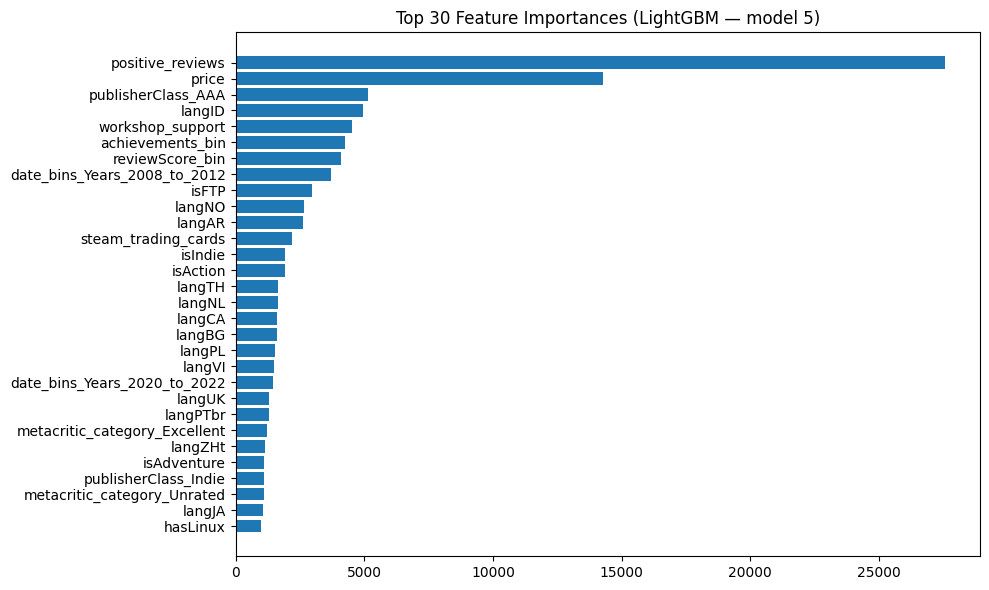

In [ ]:
import matplotlib.pyplot as plt

imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": lgbm_model5.feature_importances_
}).sort_values("Importance", ascending=False)

print(imp.head(30).to_string(index=False))

top = imp.head(30)
plt.figure(figsize=(10,6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 30 Feature Importances (LightGBM — model 5)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    lgbm_model5,
    X_valid, y_valid,
    n_repeats=20,
    random_state=42,
    scoring="neg_mean_absolute_error",
    n_jobs=1
)

perm_imp = pd.Series(perm.importances_mean, index=X_valid.columns).sort_values(ascending=False)
print(perm_imp.head(30).to_string())

top = perm_imp.head(30).sort_values()
plt.figure(figsize=(10,6))
plt.barh(top.index, top.values)
plt.title("Top 30 Permutation Importances (LightGBM — model 5)")
plt.tight_layout()
plt.show()

Nu pot folosi permutatia de mai sus fiindca încărcarea permutării durează peste 9 ore

<Figure size 2800x1400 with 0 Axes>

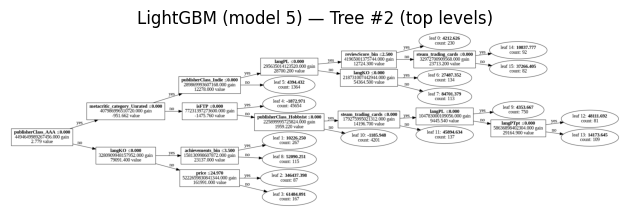

In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

plt.figure(figsize=(28, 14))
lgb.plot_tree(
    lgbm_model5,
    tree_index=2, #schimba arborele 0,1,...
    show_info=["split_gain", "internal_value", "leaf_count"]
)
plt.title("LightGBM (model 5) — Tree #2 (top levels)")
plt.tight_layout()
plt.show()

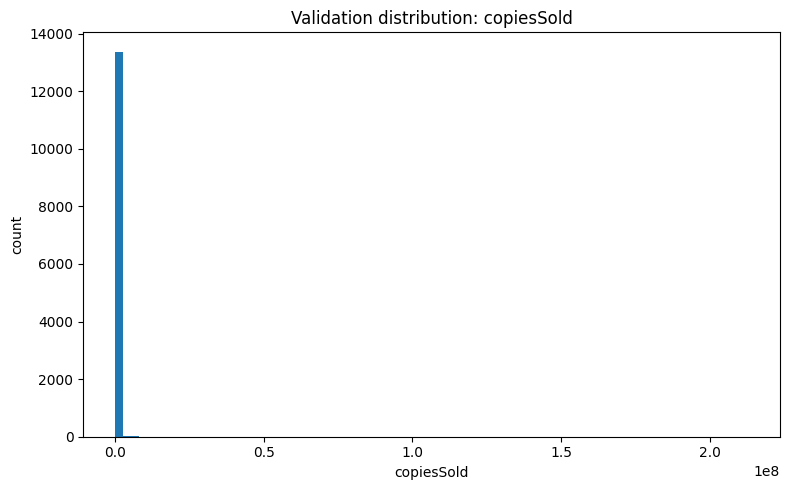

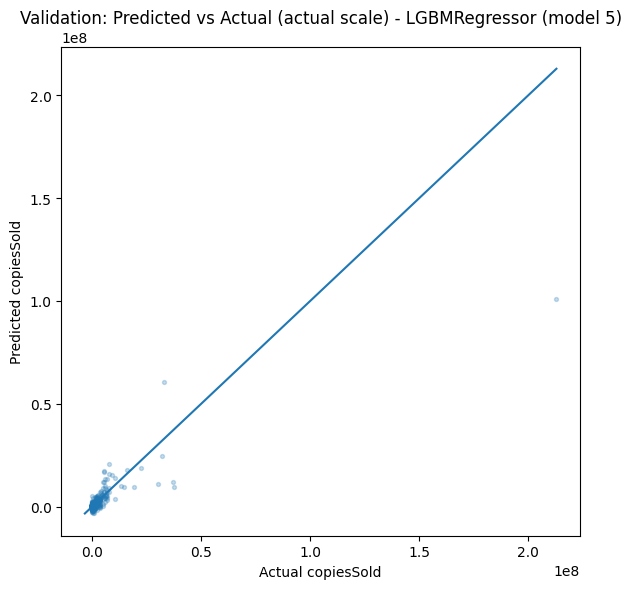

In [ ]:
y_pred = lgbm_model5.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale) - LGBMRegressor (model 5)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = lgbm_model5.predict(X_valid)

res = pd.DataFrame({
    "copiesSold_actual": np.asarray(y_valid).ravel(),
    "copiesSold_pred":   np.asarray(y_pred).ravel(),
}, index=X_valid.index)

THRESH = 0.5e8
mask = (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > actual and pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 2 points with pred > actual and pred > 50000000
       copiesSold_actual  copiesSold_pred       abs_err
65907          212896574     1.007552e+08  1.121413e+08
66839           33194999     6.036225e+07  2.716725e+07


Outlierii sunt Dota 2 si Brawlhalla

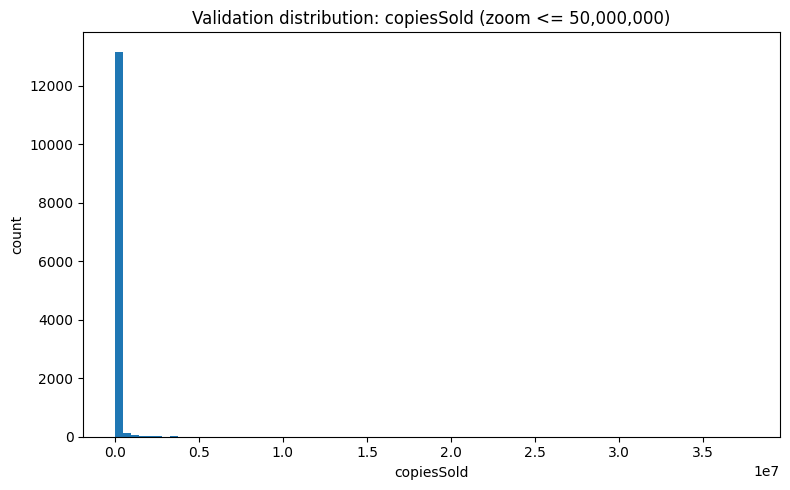

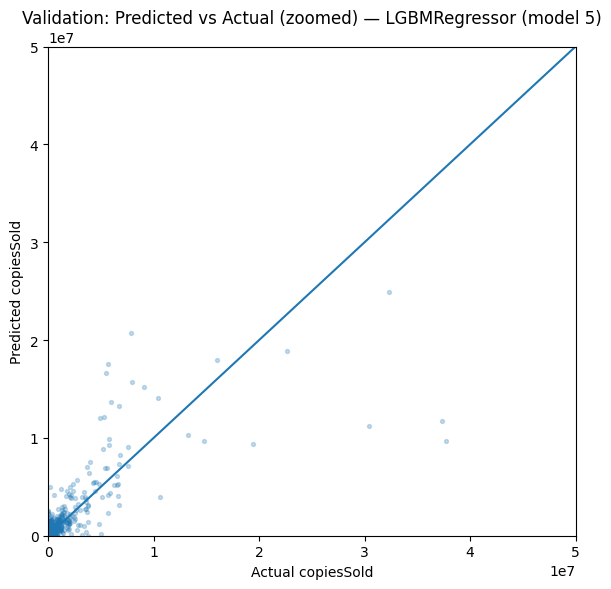

In [ ]:
y_pred = lgbm_model5.predict(X_valid)

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

ZOOM_MAX_X = 0.5e8
ZOOM_MAX_Y = 0.5e8

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)

plt.plot([0, min(ZOOM_MAX_X, ZOOM_MAX_Y)], [0, min(ZOOM_MAX_X, ZOOM_MAX_Y)])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (zoomed) — LGBMRegressor (model 5)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

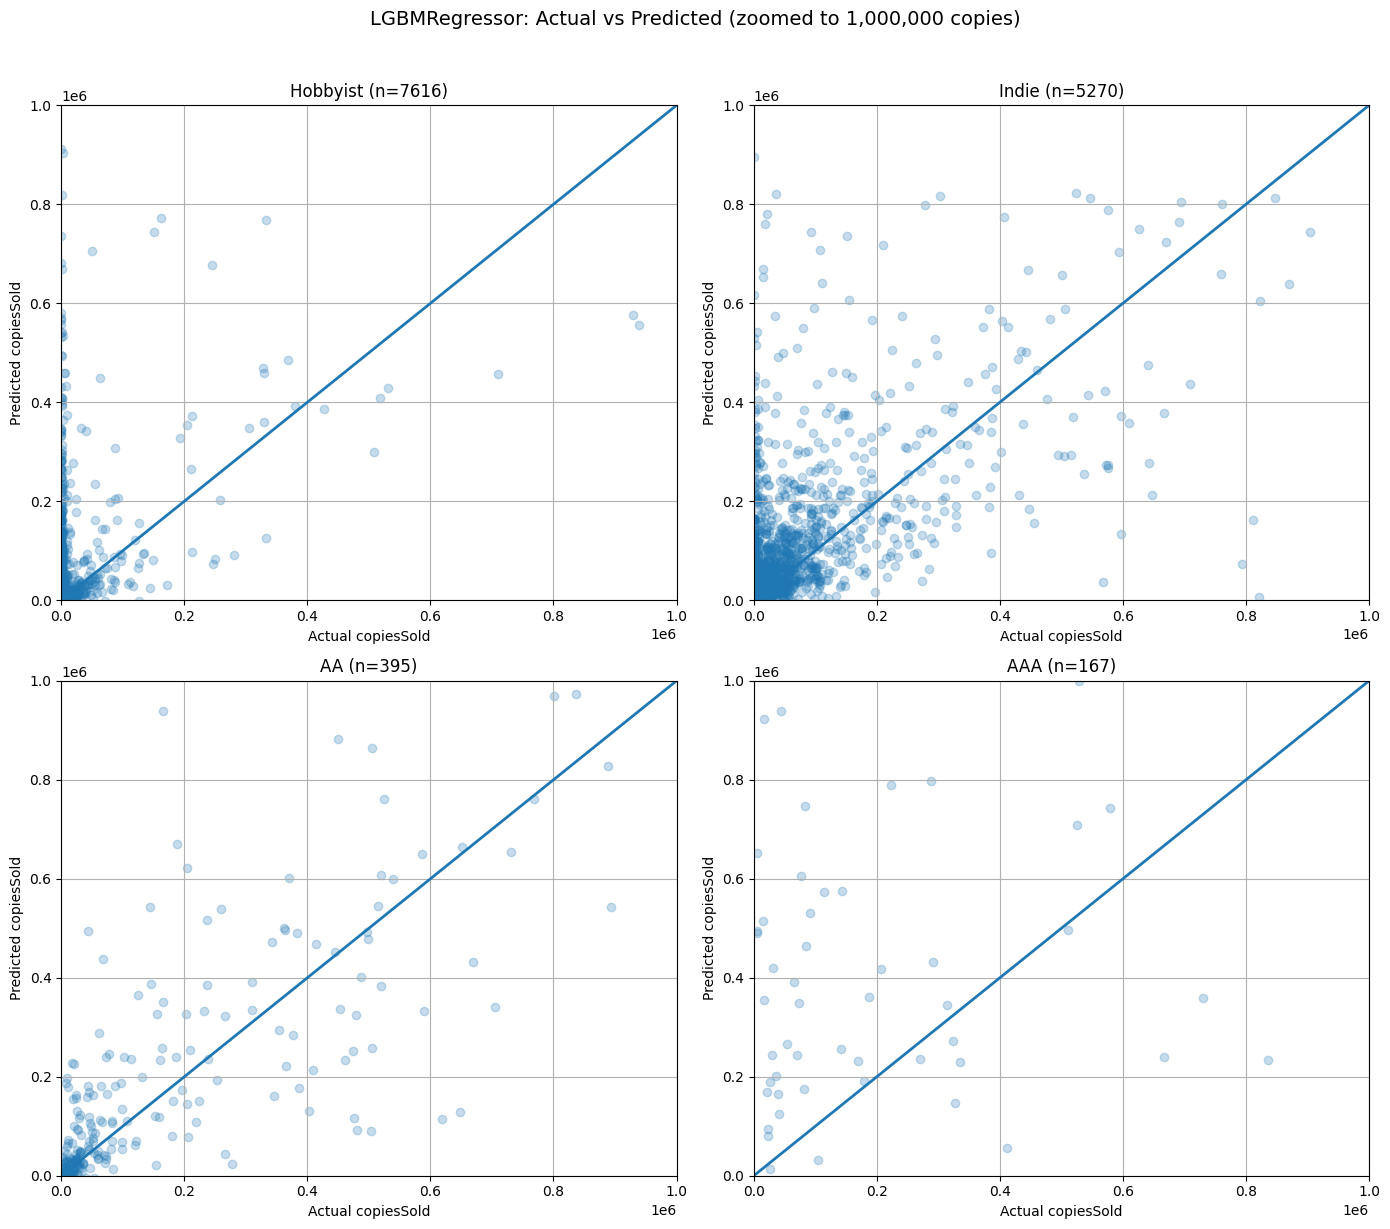

In [ ]:
Xv = X_valid.copy()
y_pred = lgbm_model5.predict(Xv)

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(y_valid, index=Xv.index)
y_hat  = pd.Series(y_pred,  index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]

ZOOM_MAX = 1_000_000

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    ax.scatter(yt, yp, alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle("LGBMRegressor: Actual vs Predicted (zoomed to 1,000,000 copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# MLPRegressor

In [10]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [12]:
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
mlp.add(Dense(64, kernel_initializer='normal', activation='relu'))
mlp.add(Dense(32, kernel_initializer='normal'))
mlp.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
def smape(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(
        2.0 * tf.abs(y_pred - y_true) /
        (tf.abs(y_true) + tf.abs(y_pred) + 1e-8)
    ) * 100

mlp.compile(
    optimizer="adam",
    loss="mse",
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        R2Score(),
        smape
    ]
)

In [14]:
results = mlp.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid))

Epoch 1/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3708444213248.0000 - mae: 117838.5234 - r2_score: 0.0057 - rmse: 1871587.8750 - smape: 161.9418 - val_loss: 3991325376512.0000 - val_mae: 146402.2969 - val_r2_score: 0.0207 - val_rmse: 1997830.1250 - val_smape: 167.2450
Epoch 2/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2203222540288.0000 - mae: 148349.5781 - r2_score: 0.0488 - rmse: 1395087.7500 - smape: 160.7595 - val_loss: 3917906444288.0000 - val_mae: 149795.4688 - val_r2_score: 0.0387 - val_rmse: 1979370.2500 - val_smape: 146.6260
Epoch 3/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3074478047232.0000 - mae: 148308.2969 - r2_score: 0.0163 - rmse: 1689916.6250 - smape: 145.1296 - val_loss: 3847090864128.0000 - val_mae: 147562.8281 - val_r2_score: 0.0561 - val_rmse: 1961400.2500 - val_smape: 142.0024
Epoch 4/100
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2079054233600.0000 - mae: 142531.5000 - r2_score: 0.0830 - rmse: 1358850.8750 - smape: 1

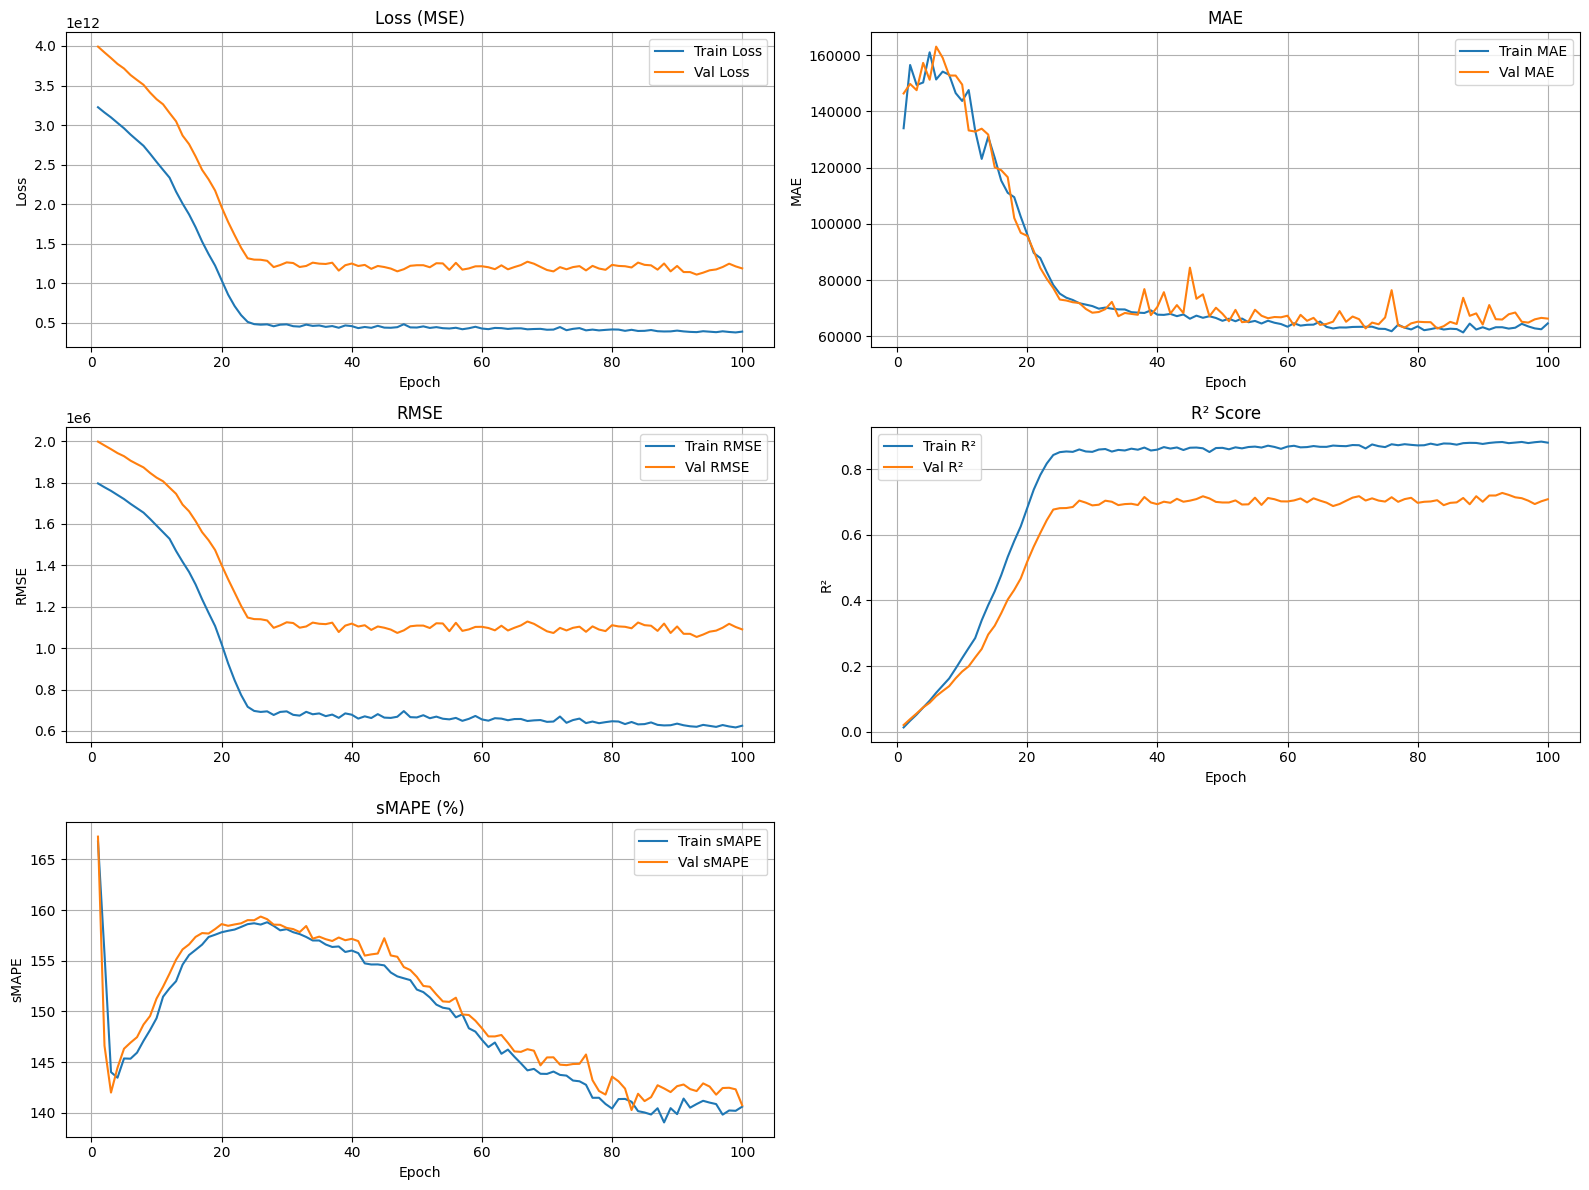

In [15]:
history = results.history
epochs = range(1, len(history["loss"]) + 1)

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.title("Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(epochs, history["mae"], label="Train MAE")
plt.plot(epochs, history["val_mae"], label="Val MAE")
plt.title("MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(epochs, history["rmse"], label="Train RMSE")
plt.plot(epochs, history["val_rmse"], label="Val RMSE")
plt.title("RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(epochs, history["r2_score"], label="Train R²")
plt.plot(epochs, history["val_r2_score"], label="Val R²")
plt.title("R² Score")
plt.xlabel("Epoch")
plt.ylabel("R²")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(epochs, history["smape"], label="Train sMAPE")
plt.plot(epochs, history["val_smape"], label="Val sMAPE")
plt.title("sMAPE (%)")
plt.xlabel("Epoch")
plt.ylabel("sMAPE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

[ loss, mae, rmse, r2_score, smape ]

In [16]:
mlp.evaluate(X_train_scaled, y_train) #old data

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 91573796864.0000 - mae: 43265.6758 - r2_score: -2.9610 - rmse: 292562.9062 - smape: 147.3329


[350352736256.0,
 60710.078125,
 591906.0,
 0.8928347826004028,
 139.09153747558594]

In [17]:
mlp.evaluate(X_valid_scaled, y_valid) #new data

421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90449215488.0000 - mae: 43068.2695 - r2_score: -0.4493 - rmse: 267478.9375 - smape: 149.2229


[1189328977920.0,
 66314.4140625,
 1090563.625,
 0.7081801891326904,
 140.7525177001953]

Model 2

In [18]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)

In [19]:
mlp_model2 = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])

mlp_model2.compile(
    optimizer="adam",
    loss="mse",
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        R2Score(),
        smape
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
results = mlp_model2.fit(
    X_train_scaled, y_train.astype("float32"),
    epochs=500,
    validation_data=(X_valid_scaled, y_valid.astype("float32")),
    callbacks=[early_stop, reduce_lr],
    batch_size=256,
    verbose=1
)

Epoch 1/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1819497857024.0000 - mae: 81209.2422 - r2_score: -0.0043 - rmse: 1311488.5000 - smape: 169.2742 - val_loss: 4078466760704.0000 - val_mae: 88032.6406 - val_r2_score: -7.1347e-04 - val_rmse: 2019521.3750 - val_smape: 137.7849 - learning_rate: 0.0010
Epoch 2/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2575795224576.0000 - mae: 96316.8281 - r2_score: -0.0011 - rmse: 1578484.6250 - smape: 141.8600 - val_loss: 4061994680320.0000 - val_mae: 96645.7656 - val_r2_score: 0.0033 - val_rmse: 2015439.1250 - val_smape: 154.9923 - learning_rate: 0.0010
Epoch 3/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3064888819712.0000 - mae: 102233.7188 - r2_score: 0.0067 - rmse: 1664768.0000 - smape: 157.6573 - val_loss: 4030284169216.0000 - val_mae: 124177.1719 - val_r2_score: 0.0111 - val_rmse: 2007556.7500 - val_smape: 166.0476 - learning_rate: 0.0010
Epoch 4/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2229953888256.0000 - 

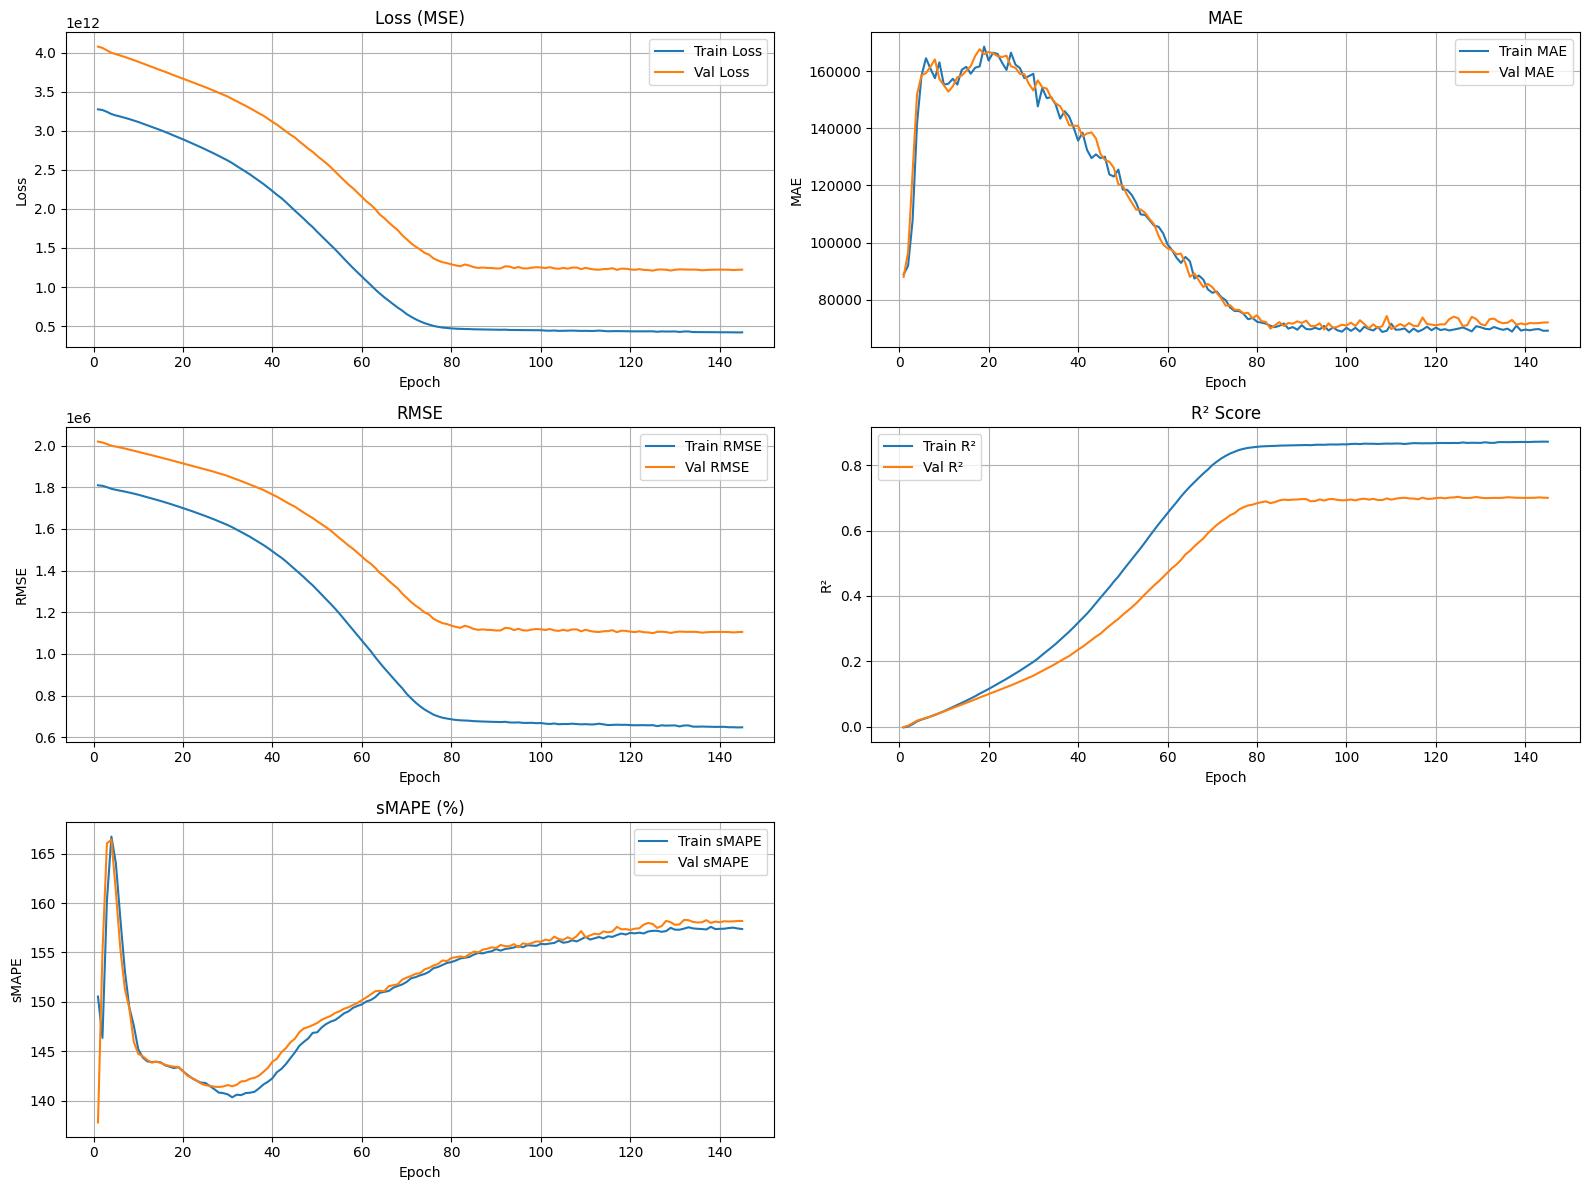

In [21]:
history = results.history
epochs = range(1, len(history["loss"]) + 1)

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.title("Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(epochs, history["mae"], label="Train MAE")
plt.plot(epochs, history["val_mae"], label="Val MAE")
plt.title("MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(epochs, history["rmse"], label="Train RMSE")
plt.plot(epochs, history["val_rmse"], label="Val RMSE")
plt.title("RMSE")
plt.xlabel("Epoch"); plt.ylabel("RMSE")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(epochs, history["r2_score"], label="Train R²")
plt.plot(epochs, history["val_r2_score"], label="Val R²")
plt.title("R² Score")
plt.xlabel("Epoch"); plt.ylabel("R²")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(epochs, history["smape"], label="Train sMAPE")
plt.plot(epochs, history["val_smape"], label="Val sMAPE")
plt.title("sMAPE (%)")
plt.xlabel("Epoch"); plt.ylabel("sMAPE")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

[ loss, mae, rmse, r2_score, smape ]

In [22]:
mlp_model2.evaluate(X_valid_scaled, y_valid.astype("float32"), verbose=1) #new data

421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 108799614976.0000 - mae: 49401.1523 - r2_score: -1.2303 - rmse: 298807.5625 - smape: 166.4355


[1209860751360.0,
 73538.625,
 1099936.75,
 0.7031424045562744,
 158.18392944335938]

In [23]:
mlp_model2.evaluate(X_train_scaled, y_train.astype("float32"), verbose=1) #old data

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 123267473408.0000 - mae: 50342.0430 - r2_score: -1.8581 - rmse: 340966.1250 - smape: 164.9417


[423534821376.0,
 71165.5703125,
 650795.5,
 0.8704500198364258,
 157.3222198486328]

Model 3

In [24]:
from tensorflow.keras.layers import Dense, Dropout

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=25,
    restore_best_weights=True
    )
reduce_lr  = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=1
    )

mlp_model3 = Sequential([
    Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.30),

    Dense(128, activation="relu"),
    Dropout(0.25),

    Dense(64, activation="relu"),
    Dropout(0.20),

    Dense(1)
])


mlp_model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.Huber(delta=1e5),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        R2Score(),
        smape
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
results = mlp_model3.fit(
    X_train_scaled, y_train.astype("float32"),
    epochs=500,
    batch_size=256,
    validation_data=(X_valid_scaled, y_valid.astype("float32")),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 7866476544.0000 - mae: 86185.8047 - r2_score: -0.0036 - rmse: 1394660.3750 - smape: 154.6138 - val_loss: 7789364224.0000 - val_mae: 88495.0781 - val_r2_score: 0.0047 - val_rmse: 2014053.3750 - val_smape: 136.3067 - learning_rate: 0.0010
Epoch 2/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7333761536.0000 - mae: 83653.7344 - r2_score: 0.0148 - rmse: 1437581.0000 - smape: 134.3850 - val_loss: 7639823872.0000 - val_mae: 85951.9141 - val_r2_score: 0.0143 - val_rmse: 2004333.5000 - val_smape: 139.5845 - learning_rate: 0.0010
Epoch 3/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7565602304.0000 - mae: 85447.7500 - r2_score: 0.0363 - rmse: 1298864.6250 - smape: 137.6336 - val_loss: 7567287808.0000 - val_mae: 84919.8828 - val_r2_score: 0.0235 - val_rmse: 1994984.8750 - val_smape: 128.0422 - learning_rate: 0.0010
Epoch 4/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7410461184.0000 - mae: 83284.6328 - r2_scor

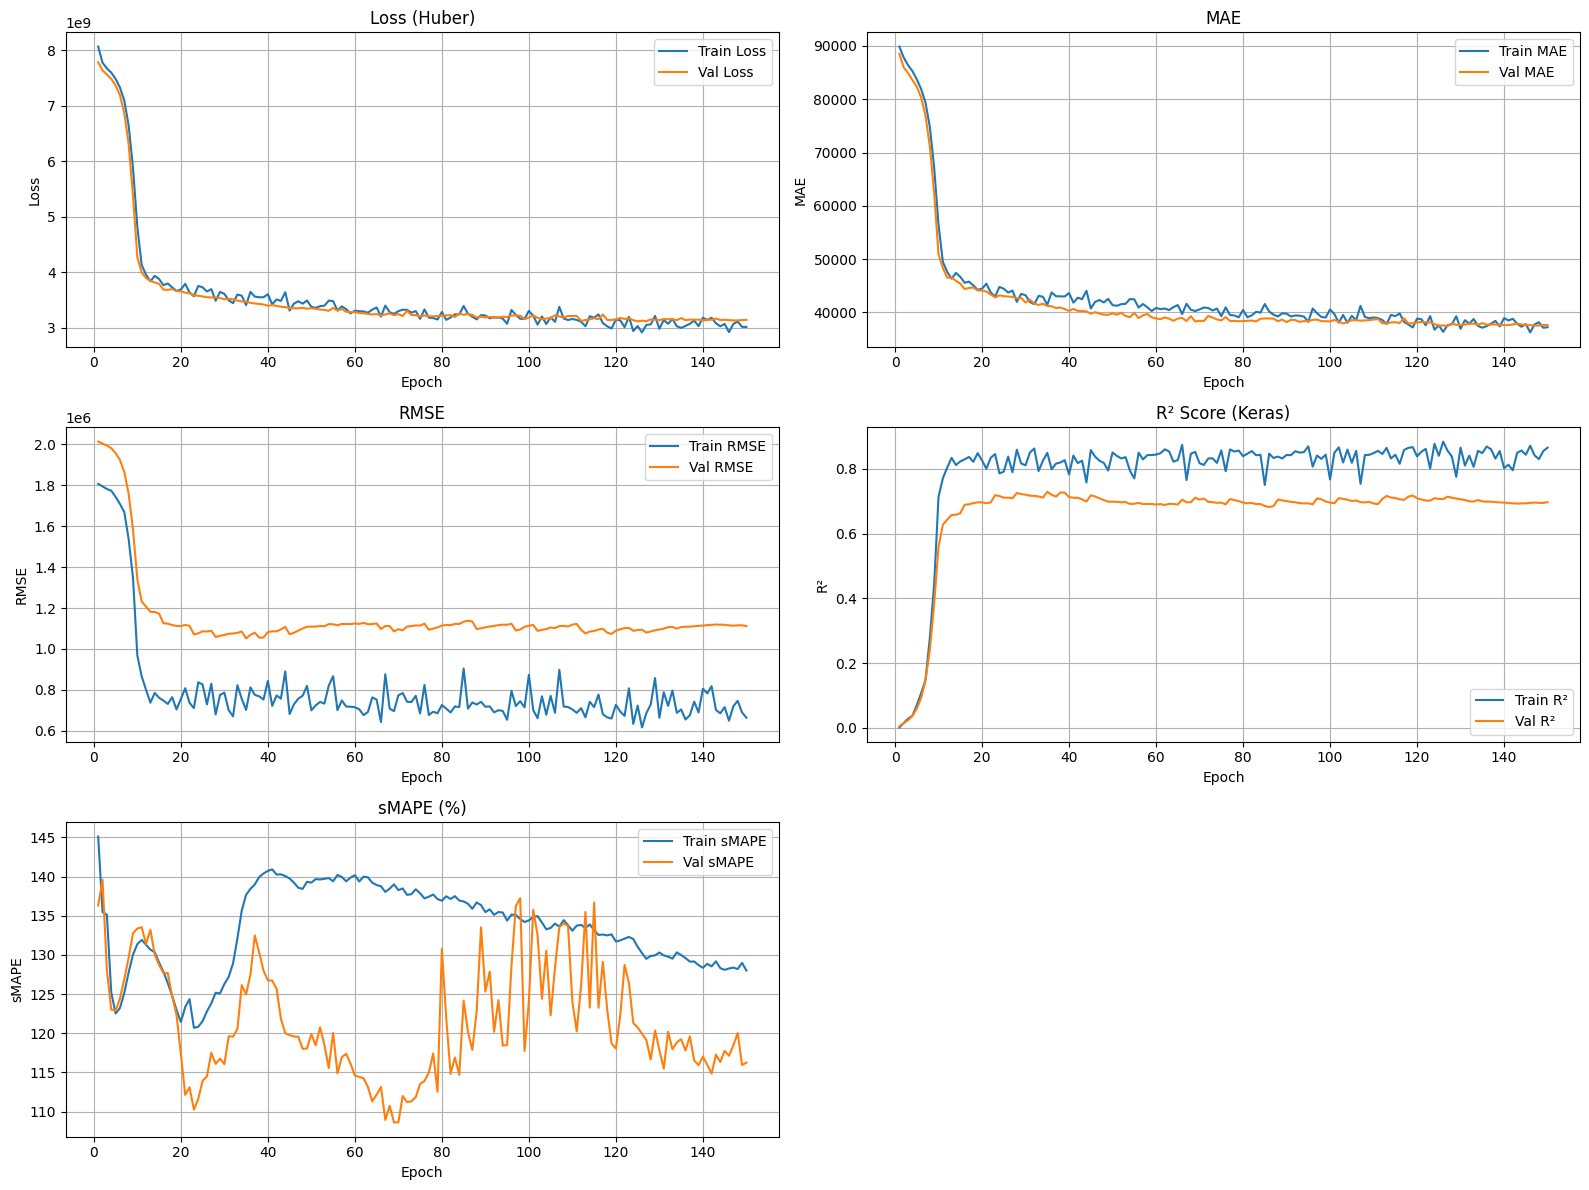

In [26]:
history = results.history
epochs = range(1, len(history["loss"]) + 1)

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.title("Loss (Huber)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(epochs, history["mae"], label="Train MAE")
plt.plot(epochs, history["val_mae"], label="Val MAE")
plt.title("MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(epochs, history["rmse"], label="Train RMSE")
plt.plot(epochs, history["val_rmse"], label="Val RMSE")
plt.title("RMSE")
plt.xlabel("Epoch"); plt.ylabel("RMSE")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(epochs, history["r2_score"], label="Train R²")
plt.plot(epochs, history["val_r2_score"], label="Val R²")
plt.title("R² Score (Keras)")
plt.xlabel("Epoch"); plt.ylabel("R²")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(epochs, history["smape"], label="Train sMAPE")
plt.plot(epochs, history["val_smape"], label="Val sMAPE")
plt.title("sMAPE (%)")
plt.xlabel("Epoch"); plt.ylabel("sMAPE")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

[ loss, mae, rmse, r2_score, smape ]

In [27]:
mlp_model3.evaluate(X_valid_scaled, y_valid, verbose=1) #new data

421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1198541056.0000 - mae: 17198.1855 - r2_score: 0.7592 - rmse: 234554.6562 - smape: 132.0491


[3117985536.0,
 37516.16015625,
 1092484.875,
 0.7071510553359985,
 121.0129623413086]

In [28]:
mlp_model3.evaluate(X_train_scaled, y_train, verbose=1) #old data

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1285234688.0000 - mae: 17860.7637 - r2_score: 0.3407 - rmse: 303479.4062 - smape: 129.3109


[2872987136.0,
 34938.91796875,
 689406.9375,
 0.8546217083930969,
 119.81070709228516]

Model 4

In [29]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=25,
    restore_best_weights=True
    )
reduce_lr  = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=1
    )

mlp_model4 = Sequential([
    Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.30),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation="relu"),
    Dropout(0.20),

    Dense(1)
])


mlp_model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.Huber(delta=1e5),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        R2Score(),
        smape
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
results = mlp_model4.fit(
    X_train_scaled, y_train.astype("float32"),
    epochs=500,
    batch_size=256,
    validation_data=(X_valid_scaled, y_valid.astype("float32")),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 10562146304.0000 - mae: 112521.5781 - r2_score: -0.0021 - rmse: 2668016.0000 - smape: 193.5958 - val_loss: 8122241024.0000 - val_mae: 87804.6562 - val_r2_score: -0.0017 - val_rmse: 2020562.0000 - val_smape: 164.0436 - learning_rate: 0.0010
Epoch 2/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 8325944320.0000 - mae: 89941.4297 - r2_score: -0.0029 - rmse: 1962805.3750 - smape: 154.2204 - val_loss: 8064423424.0000 - val_mae: 86897.8281 - val_r2_score: -0.0011 - val_rmse: 2019868.6250 - val_smape: 131.2619 - learning_rate: 0.0010
Epoch 3/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 9053953024.0000 - mae: 97017.7734 - r2_score: -0.0015 - rmse: 1909858.5000 - smape: 128.0942 - val_loss: 7944835584.0000 - val_mae: 85931.1562 - val_r2_score: -7.0453e-05 - val_rmse: 2018872.5000 - val_smape: 128.8390 - learning_rate: 0.0010
Epoch 4/500
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 8366258688.0000 - mae: 90835.60

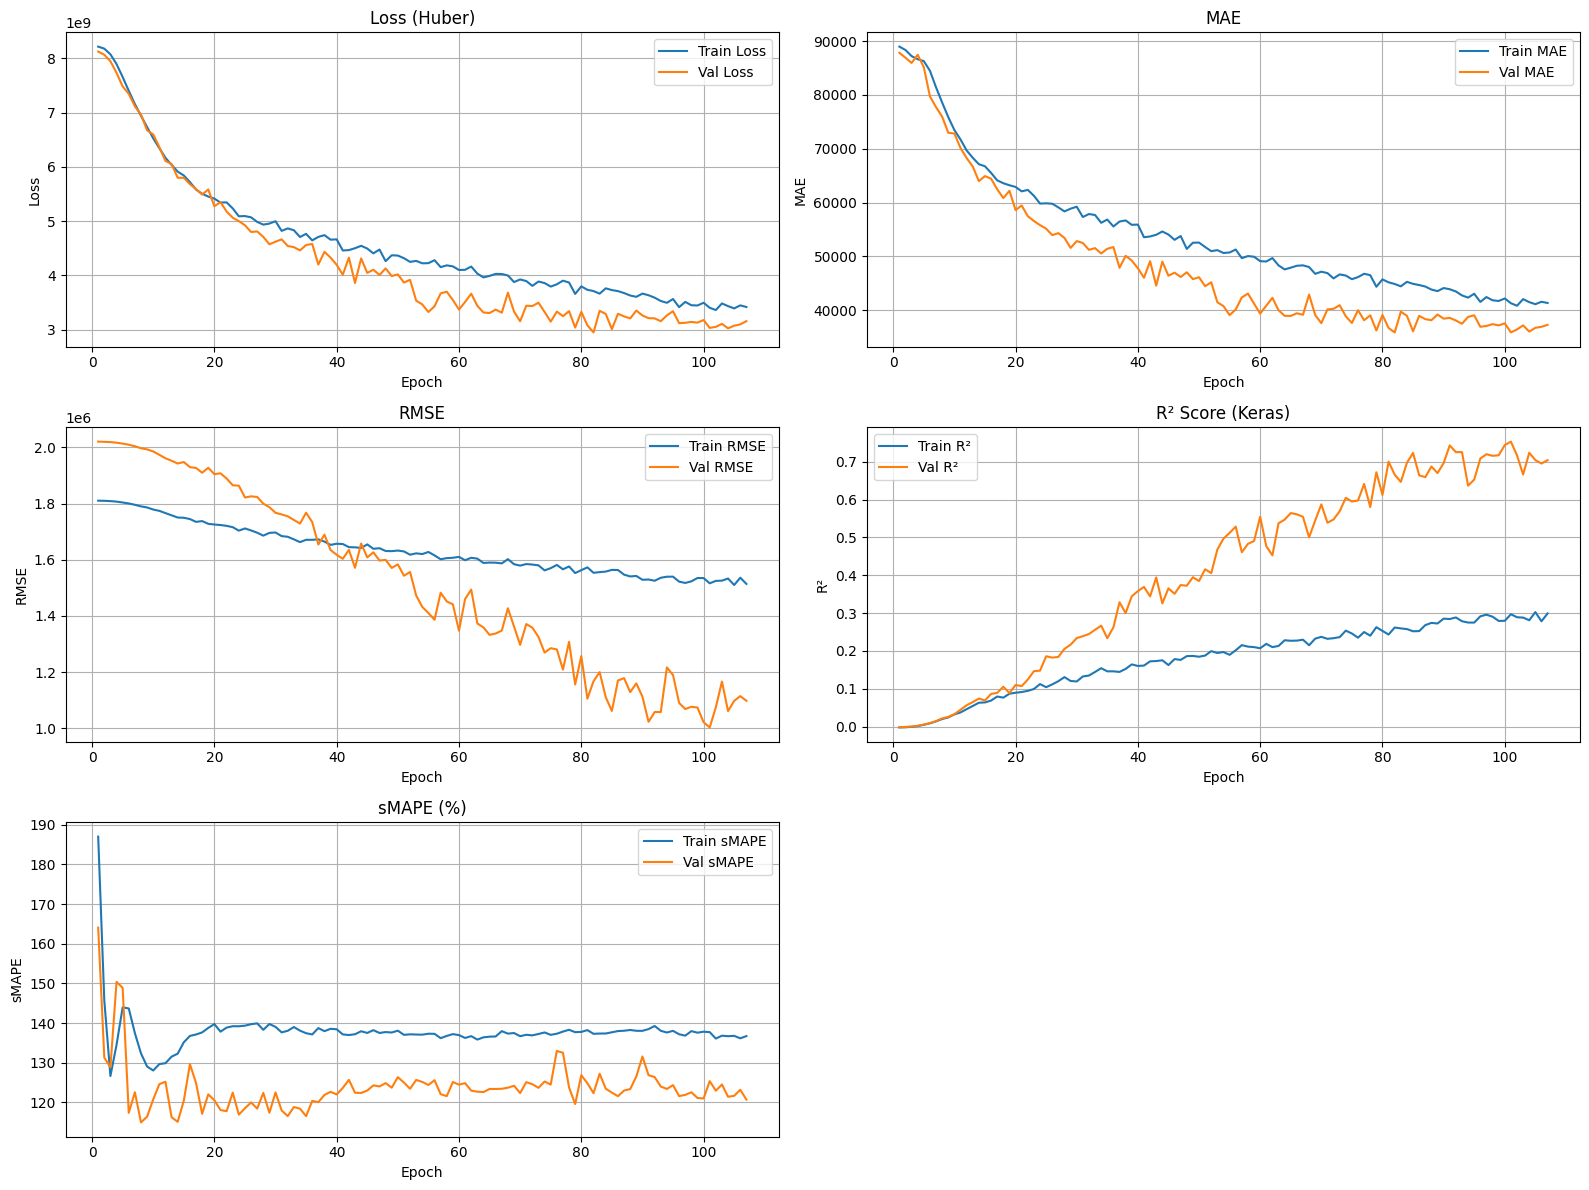

In [31]:
history = results.history
epochs = range(1, len(history["loss"]) + 1)

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.title("Loss (Huber)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(epochs, history["mae"], label="Train MAE")
plt.plot(epochs, history["val_mae"], label="Val MAE")
plt.title("MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(epochs, history["rmse"], label="Train RMSE")
plt.plot(epochs, history["val_rmse"], label="Val RMSE")
plt.title("RMSE")
plt.xlabel("Epoch"); plt.ylabel("RMSE")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(epochs, history["r2_score"], label="Train R²")
plt.plot(epochs, history["val_r2_score"], label="Val R²")
plt.title("R² Score (Keras)")
plt.xlabel("Epoch"); plt.ylabel("R²")
plt.legend(); plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(epochs, history["smape"], label="Train sMAPE")
plt.plot(epochs, history["val_smape"], label="Val sMAPE")
plt.title("sMAPE (%)")
plt.xlabel("Epoch"); plt.ylabel("sMAPE")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:
mlp_model4.evaluate(X_valid_scaled, y_valid, verbose=1) #new data

421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 995276480.0000 - mae: 15255.5273 - r2_score: 0.8550 - rmse: 176026.3438 - smape: 130.5751


[2949941248.0,
 35895.2265625,
 1167568.5,
 0.6655142307281494,
 122.58228302001953]

In [35]:
mlp_model4.evaluate(X_train_scaled, y_train, verbose=1) #old data

1675/1675 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 962169920.0000 - mae: 14878.9141 - r2_score: 0.6110 - rmse: 245366.9062 - smape: 129.2595


[2211533568.0,
 28554.14453125,
 643439.875,
 0.8733619451522827,
 121.95722198486328]

Cel mai bun model este modelul 3

                     Feature  Importance
            positive_reviews    1.738306
                       price    0.593454
                       isFTP    0.459540
     publisherClass_Hobbyist    0.370143
  date_bins_From_2023_Onward    0.311598
        date_bins_Unreleased    0.293048
        publisherClass_Indie    0.221065
                      langFA    0.210233
            achievements_bin    0.206805
                      langSL    0.202702
                      langGL    0.193496
                      langKK    0.182014
                      langAF    0.181588
                      langBN    0.177767
                      langHR    0.169810
                      langKA    0.166658
                      langEU    0.160550
date_bins_Years_2008_to_2012    0.160479
date_bins_Years_2013_to_2016    0.151250
                isSimulation    0.146829
                      langIS    0.142153
                      langGA    0.141906
                      langUR    0.139727
                

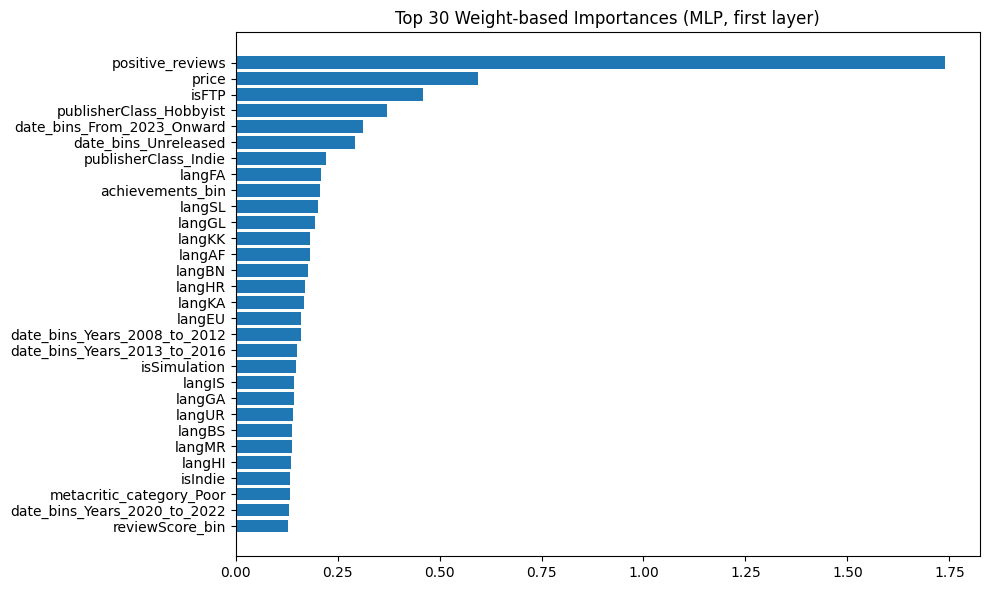

In [36]:
W0 = mlp_model3.layers[0].get_weights()[0]
imp = np.mean(np.abs(W0), axis=1)

imp_df = pd.DataFrame({"Feature": X_train.columns, "Importance": imp}).sort_values("Importance", ascending=False)
print(imp_df.head(30).to_string(index=False))

top = imp_df.head(30)
plt.figure(figsize=(10,6))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 30 Weight-based Importances (MLP, first layer)")
plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import classification_report

y_pred = mlp_model3.predict(X_valid).ravel()
y_pred = np.clip(y_pred, 0, None)

bins = [-np.inf, 10, 100, 1_000, 10_000, 100_000, np.inf]
labels = ["0-10", "11-100", "101-1k", "1k-10k", "10k-100k", "100k+"]

y_true_cls = pd.cut(pd.Series(y_valid, index=X_valid.index), bins=bins, labels=labels, include_lowest=True)
y_pred_cls = pd.cut(pd.Series(y_pred,  index=X_valid.index), bins=bins, labels=labels, include_lowest=True)

print(classification_report(y_true_cls, y_pred_cls, labels=labels, zero_division=0))

421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

        0-10       0.70      0.64      0.67      1134
      11-100       0.00      0.00      0.00      3018
      101-1k       0.00      0.00      0.00      3854
      1k-10k       0.00      0.00      0.00      3127
    10k-100k       0.00      0.00      0.00      1586
       100k+       0.06      1.00      0.11       729

    accuracy                           0.11     13448
   macro avg       0.13      0.27      0.13     13448
weighted avg       0.06      0.11      0.06     13448



In [ ]:
#prea mult efort computational
"""from sklearn.inspection import permutation_importance

class KerasRegWrapper:
    def __init__(self, model):
        self.model = model
    def fit(self, X, y):
        return self
    def predict(self, X):
        return self.model.predict(X, verbose=0).ravel()

wrapped_mlp = KerasRegWrapper(mlp_model3)

perm = permutation_importance(
    wrapped_mlp,
    X_valid_scaled, y_valid,
    n_repeats=10,
    random_state=42,
    scoring="neg_mean_absolute_error",
    n_jobs=1
)

perm_imp = pd.Series(perm.importances_mean, index=X_train.columns).sort_values(ascending=False)
print(perm_imp.head(30).to_string())

top = perm_imp.head(30).sort_values()
plt.figure(figsize=(10,6))
plt.barh(top.index, top.values)
plt.title("Top 30 Permutation Importances (MLP)")
plt.tight_layout()
plt.show()"""

KeyboardInterrupt: 

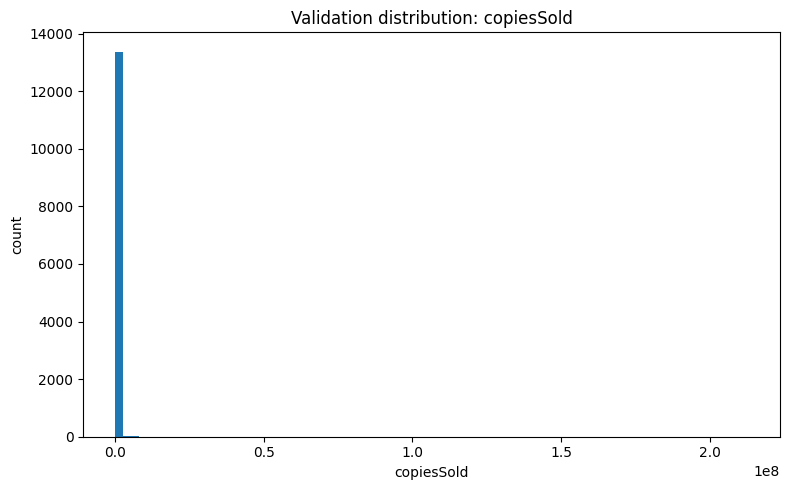

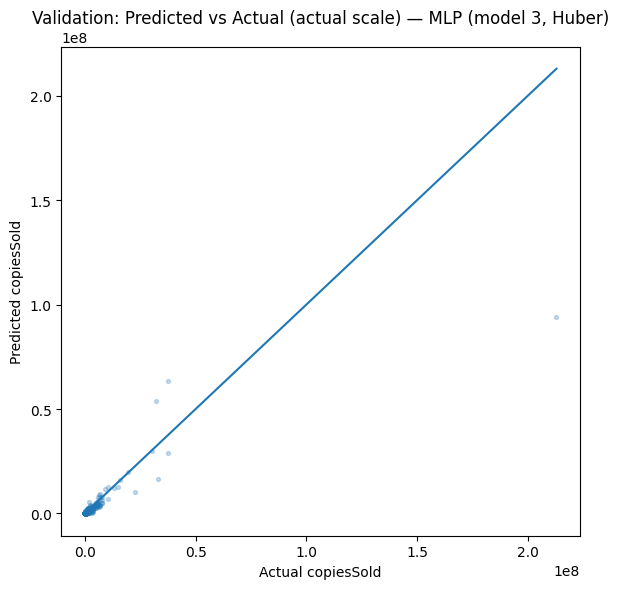

In [38]:
y_pred = mlp_model3.predict(X_valid_scaled, verbose=0).ravel()

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

plt.figure(figsize=(8, 5))
plt.hist(y_true, bins=80)
plt.title("Validation distribution: copiesSold")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_hat, s=8, alpha=0.25)

mn = float(min(y_true.min(), y_hat.min()))
mx = float(max(y_true.max(), y_hat.max()))
plt.plot([mn, mx], [mn, mx])

plt.title("Validation: Predicted vs Actual (actual scale) — MLP (model 3, Huber)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

In [39]:
y_pred = mlp_model3.predict(X_valid_scaled, verbose=0).ravel()

res = pd.DataFrame({
    "copiesSold_actual": np.asarray(y_valid).ravel(),
    "copiesSold_pred":   np.asarray(y_pred).ravel(),
}, index=X_valid.index)

THRESH = 0.5e8
mask = (res["copiesSold_pred"] > THRESH)

dots = res.loc[mask].copy()
dots["abs_err"] = (dots["copiesSold_pred"] - dots["copiesSold_actual"]).abs()

print(f"Found {len(dots)} points with pred > {THRESH:.0f}")
print(dots.sort_values("copiesSold_pred", ascending=False).to_string())

Found 3 points with pred > 50000000
       copiesSold_actual  copiesSold_pred      abs_err
65907          212896574       94139488.0  118757086.0
24112           37324726       63473624.0   26148898.0
66016           32262292       53931428.0   21669136.0


Cei doi outlieri sunt Dota 2, Terraria si Tom Clancy's Rainbow Six Siege

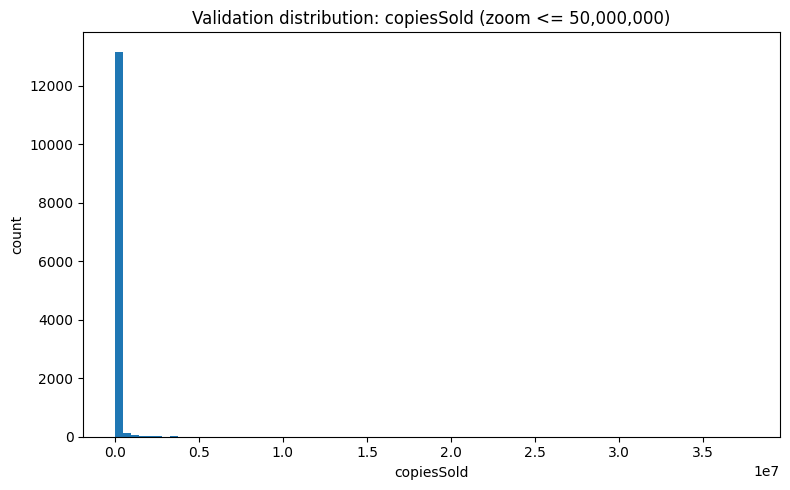

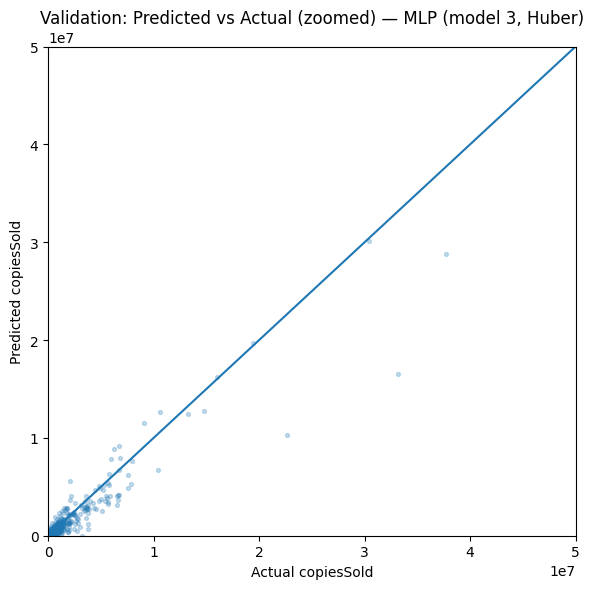

In [40]:
y_pred = mlp_model3.predict(X_valid_scaled, verbose=0).ravel()

y_true = np.asarray(y_valid).ravel()
y_hat  = np.asarray(y_pred).ravel()

ZOOM_MAX_X = 0.5e8
ZOOM_MAX_Y = 0.5e8

plt.figure(figsize=(8, 5))
plt.hist(y_true[y_true <= ZOOM_MAX_X], bins=80)
plt.title(f"Validation distribution: copiesSold (zoom <= {ZOOM_MAX_X:,.0f})")
plt.xlabel("copiesSold")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
m = (y_true <= ZOOM_MAX_X) & (y_hat <= ZOOM_MAX_Y)

plt.scatter(y_true[m], y_hat[m], s=8, alpha=0.25)
plt.plot([0, min(ZOOM_MAX_X, ZOOM_MAX_Y)], [0, min(ZOOM_MAX_X, ZOOM_MAX_Y)])

plt.xlim(0, ZOOM_MAX_X)
plt.ylim(0, ZOOM_MAX_Y)

plt.title("Validation: Predicted vs Actual (zoomed) — MLP (model 3, Huber)")
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.tight_layout()
plt.show()

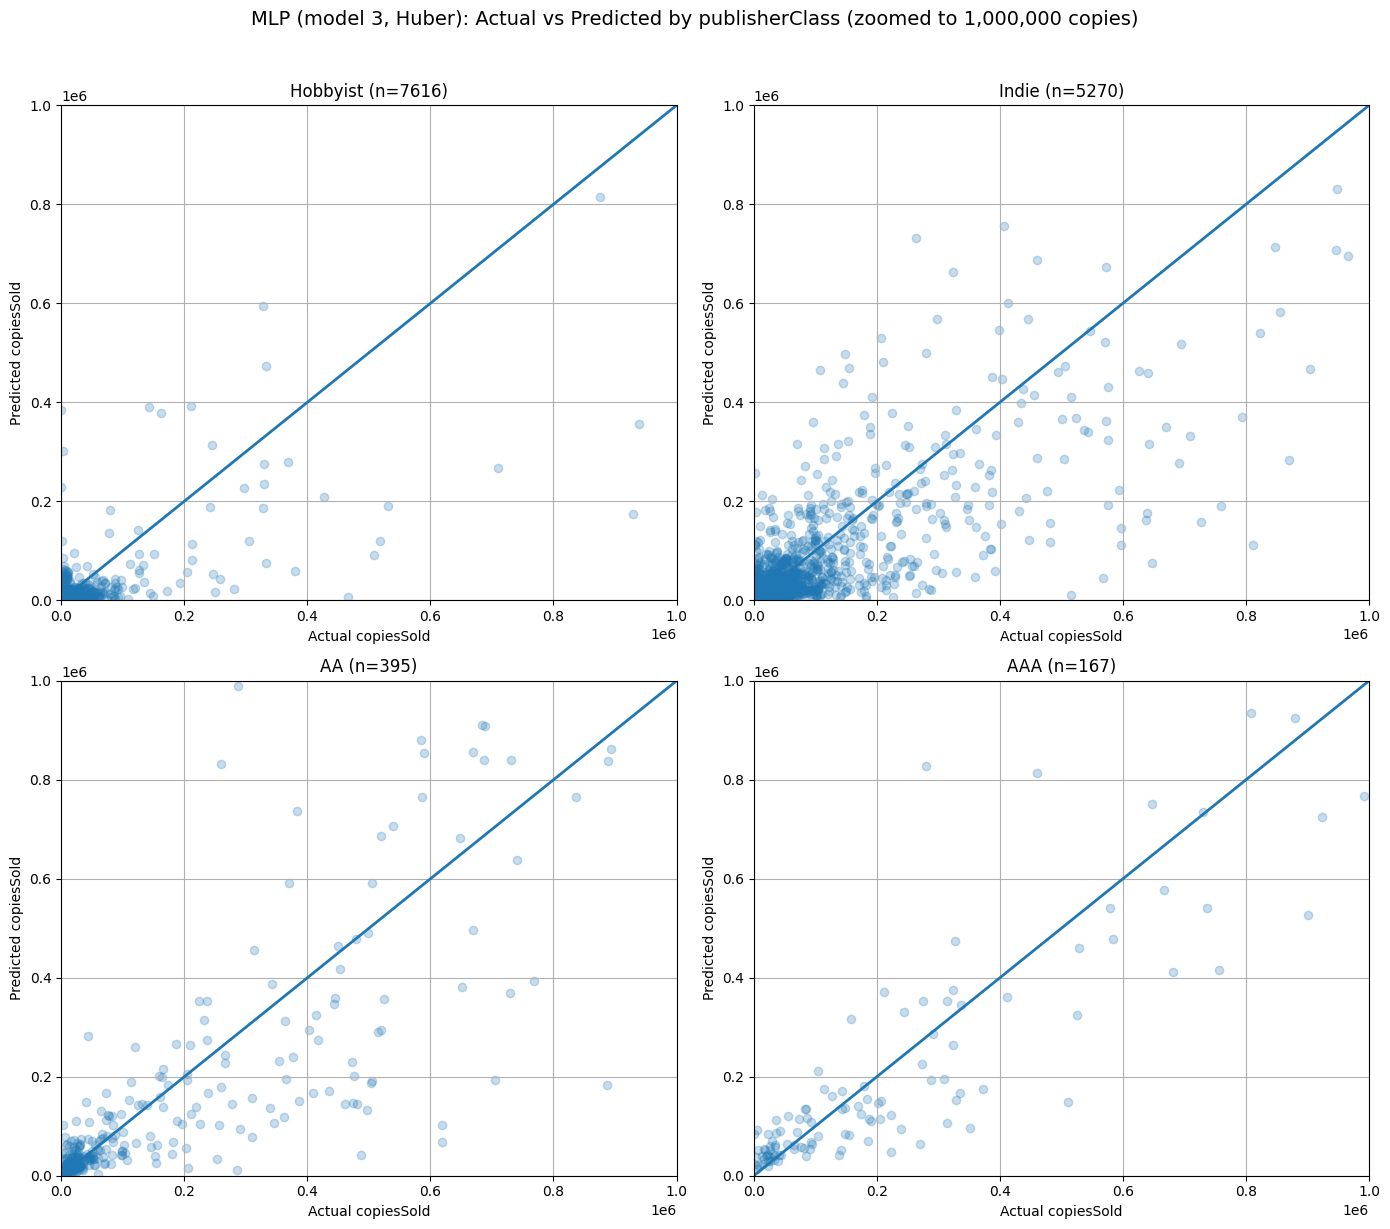

In [41]:
Xv = X_valid.copy()
y_pred = mlp_model3.predict(X_valid_scaled, verbose=0).ravel()

group = pd.Series("AA", index=Xv.index)

if "publisherClass_Hobbyist" in Xv.columns:
    group.loc[Xv["publisherClass_Hobbyist"] == 1] = "Hobbyist"
if "publisherClass_Indie" in Xv.columns:
    group.loc[Xv["publisherClass_Indie"] == 1] = "Indie"
if "publisherClass_AAA" in Xv.columns:
    group.loc[Xv["publisherClass_AAA"] == 1] = "AAA"

y_true = pd.Series(np.asarray(y_valid).ravel(), index=Xv.index)
y_hat  = pd.Series(np.asarray(y_pred).ravel(),  index=Xv.index)

classes = ["Hobbyist", "Indie", "AA", "AAA"]
ZOOM_MAX = 1_000_000

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, cls in zip(axes, classes):
    m = (group == cls)

    if m.sum() == 0:
        ax.set_title(f"{cls} (n=0)")
        ax.axis("off")
        continue

    yt = y_true.loc[m].values
    yp = y_hat.loc[m].values

    mz = (yt <= ZOOM_MAX) & (yp <= ZOOM_MAX)

    ax.scatter(yt[mz], yp[mz], alpha=0.25)
    ax.plot([0, ZOOM_MAX], [0, ZOOM_MAX], linewidth=2)

    ax.set_xlim(0, ZOOM_MAX)
    ax.set_ylim(0, ZOOM_MAX)

    ax.set_title(f"{cls} (n={m.sum()})")
    ax.set_xlabel("Actual copiesSold")
    ax.set_ylabel("Predicted copiesSold")
    ax.grid(True)

plt.suptitle("MLP (model 3, Huber): Actual vs Predicted by publisherClass (zoomed to 1,000,000 copies)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **Analiza celui mai bun model: Random Forest modelul 5**

In [ ]:
bins = [0, 10, 100, 1000, 10000, 100000, np.inf]
labels = ["0-10","11-100","101-1k","1k-10k","10k-100k","100k+"]

df_err = pd.DataFrame({"y_true": y_valid.values, "y_pred": y_pred})
df_err["abs_err"] = (df_err["y_pred"] - df_err["y_true"]).abs()
df_err["bucket"] = pd.cut(df_err["y_true"], bins=bins, labels=labels, include_lowest=True)

grp = df_err.groupby("bucket").apply(
    lambda g: pd.Series({
        "n": len(g),
        "MAE": mean_absolute_error(g["y_true"], g["y_pred"]),
        "sMAPE": smape(g["y_true"], g["y_pred"]),
        "median_true": g["y_true"].median(),
        "median_pred": g["y_pred"].median(),
    })
)

print("\n--- Bucketed errors ---")
print(grp)


--- Bucketed errors ---
               n            MAE       sMAPE  median_true    median_pred
bucket                                                                 
0-10      1134.0      43.295910  159.557522          1.0       9.476375
11-100    3018.0      45.770112   54.315228         36.0      49.311644
101-1k    3854.0     209.725930   38.719810        324.0     367.669664
1k-10k    3127.0    1725.321188   35.124259       2813.0    3158.811229
10k-100k  1586.0   17912.446576   39.849723      25252.5   28785.477506
100k+      729.0  565382.899138   37.483323     327880.0  330047.790000


/tmp/ipython-input-598085244.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_err.groupby("bucket").apply(
/tmp/ipython-input-598085244.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = df_err.groupby("bucket").apply(


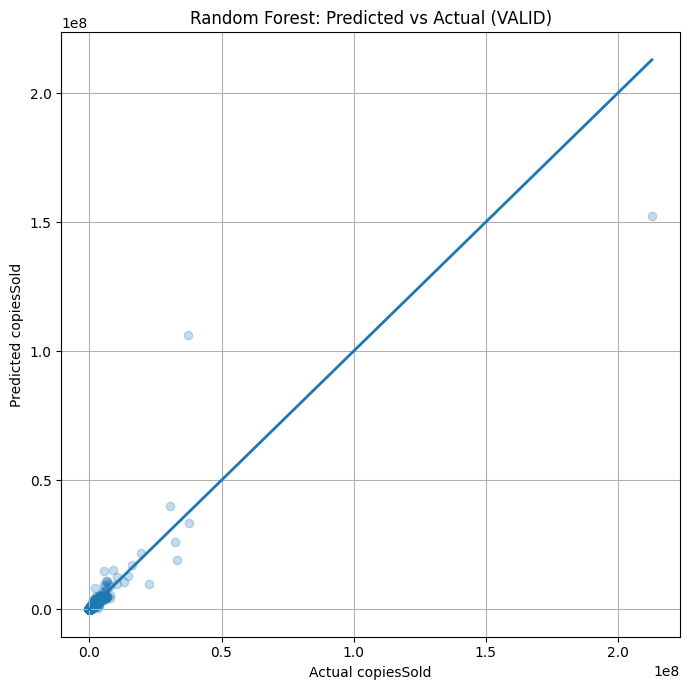

In [ ]:
y_pred = rfg_model5.predict(X_valid)

plt.figure(figsize=(7,7))
plt.scatter(y_valid, y_pred, alpha=0.25)
m = max(y_valid.max(), y_pred.max())
plt.plot([0, m], [0, m], linewidth=2)  # perfect line
plt.xlabel("Actual copiesSold")
plt.ylabel("Predicted copiesSold")
plt.title("Random Forest: Predicted vs Actual (VALID)")
plt.grid(True)
plt.tight_layout()
plt.show()

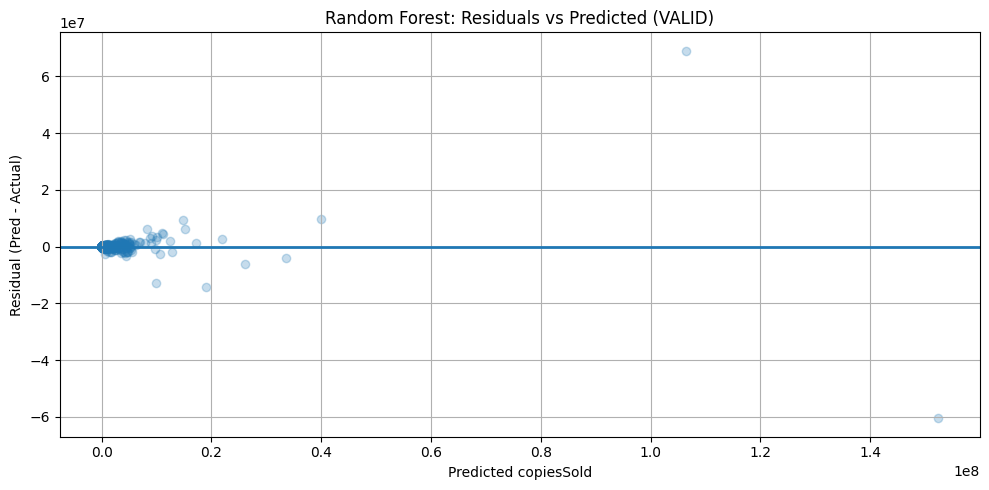

In [ ]:
resid = y_pred - y_valid

plt.figure(figsize=(10,5))
plt.scatter(y_pred, resid, alpha=0.25)
plt.axhline(0, linewidth=2)
plt.xlabel("Predicted copiesSold")
plt.ylabel("Residual (Pred - Actual)")
plt.title("Random Forest: Residuals vs Predicted (VALID)")
plt.grid(True)
plt.tight_layout()
plt.show()

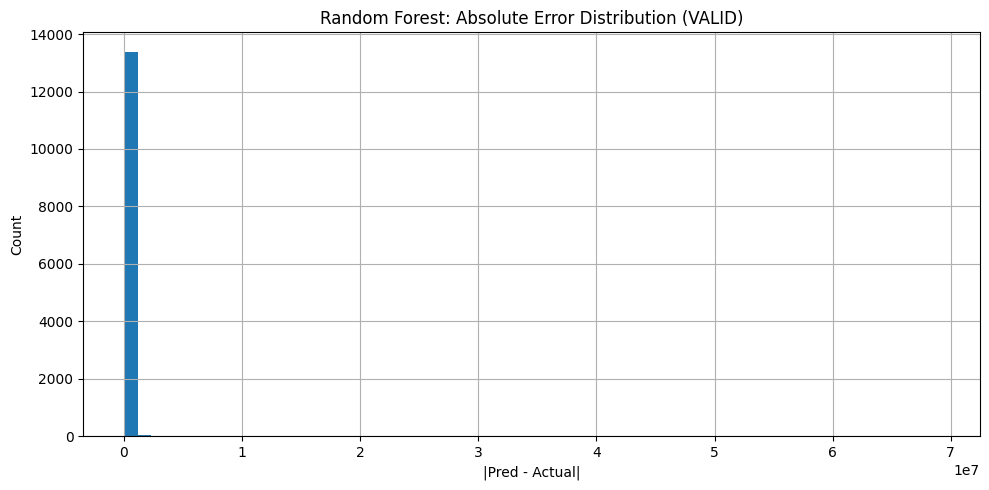

In [ ]:
abs_err = np.abs(y_pred - y_valid)

plt.figure(figsize=(10,5))
plt.hist(abs_err, bins=60)
plt.xlabel("|Pred - Actual|")
plt.ylabel("Count")
plt.title("Random Forest: Absolute Error Distribution (VALID)")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

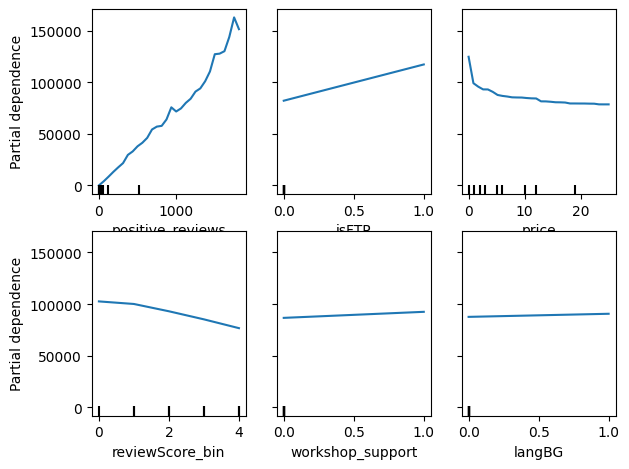

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

top_features = list(pd.Series(rfg_model5.feature_importances_, index=X_train.columns)
                    .sort_values(ascending=False).head(6).index)

plt.figure(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    rfg_model5, X_valid, features=top_features, grid_resolution=30
)
plt.tight_layout()
plt.show()

In [ ]:
y_pred = rfg_model5.predict(X_valid)

df_check = X_valid.copy()
df_check["actual"] = y_valid.values
df_check["predicted"] = y_pred
df_check["abs_err"] = np.abs(df_check["predicted"] - df_check["actual"])
df_check["residual"] = df_check["predicted"] - df_check["actual"]

print(df_check.sort_values("abs_err", ascending=False).head(10))

       steam_trading_cards  workshop_support  has_dlc  has_demo  price  \
24112                    1                 0        0         0   9.99   
65907                    1                 1        0         0   0.00   
66839                    1                 0        0         0   0.00   
64078                    1                 1        0         0  19.99   
66681                    0                 0        0         0   4.99   
15072                    0                 0        1         0   0.00   
62985                    0                 0        0         0  24.99   
23003                    1                 0        0         0  29.99   
66016                    1                 0        0         0  19.99   
65852                    0                 1        0         0  34.99   

       positive_reviews  achievements_bin  hasWindows  hasMac  hasLinux  ...  \
24112           1361422                 4           1       1         1  ...   
65907           2013315  

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfg_model5, X, y, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)

rmse_scores = -scores
print("CV RMSE:", rmse_scores)
print("Mean:", rmse_scores.mean(), "Std:", rmse_scores.std())

CV RMSE: [ 551026.64851088  901702.78715824  430081.71596462 1663688.73036979
  374573.43585087]
Mean: 784214.6635708802 Std: 476418.05670057796


In [ ]:
import pandas as pd

df = pd.read_csv("df_final_v3_posRev_Price_Date.csv", low_memory=False)

publisher_map = {
    "Hobbyist": 0,
    "Indie": 1,
    "AA": 2,
    "AAA": 3
}

df["publisherClass_num"] = df["publisherClass"].map(publisher_map)
df = df.drop(columns=["publisherClass"])

bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

df_num = df.select_dtypes(include=["int64", "float64"])

corr = df_num.corr()

corr_target = corr["copiesSold"].sort_values(ascending=False)

print("=== Top correlations with copiesSold ===")
print(corr_target.head(20))

print("\n=== PublisherClass correlation ===")
print(corr_target["publisherClass_num"])

=== Top correlations with copiesSold ===
copiesSold             1.000000
positive_reviews       0.894924
publisherClass_num     0.116815
langPL                 0.078684
langIT                 0.070466
langPTbr               0.069597
langKO                 0.063845
langFR                 0.063605
langDE                 0.062964
langESes               0.062721
langESla               0.062711
langZHt                0.062367
langRU                 0.058874
steam_trading_cards    0.056977
langTR                 0.054362
langCS                 0.052237
langTH                 0.051999
langJA                 0.050822
langUK                 0.047276
langZHs                0.046886
Name: copiesSold, dtype: float64

=== PublisherClass correlation ===
0.11681513409448442


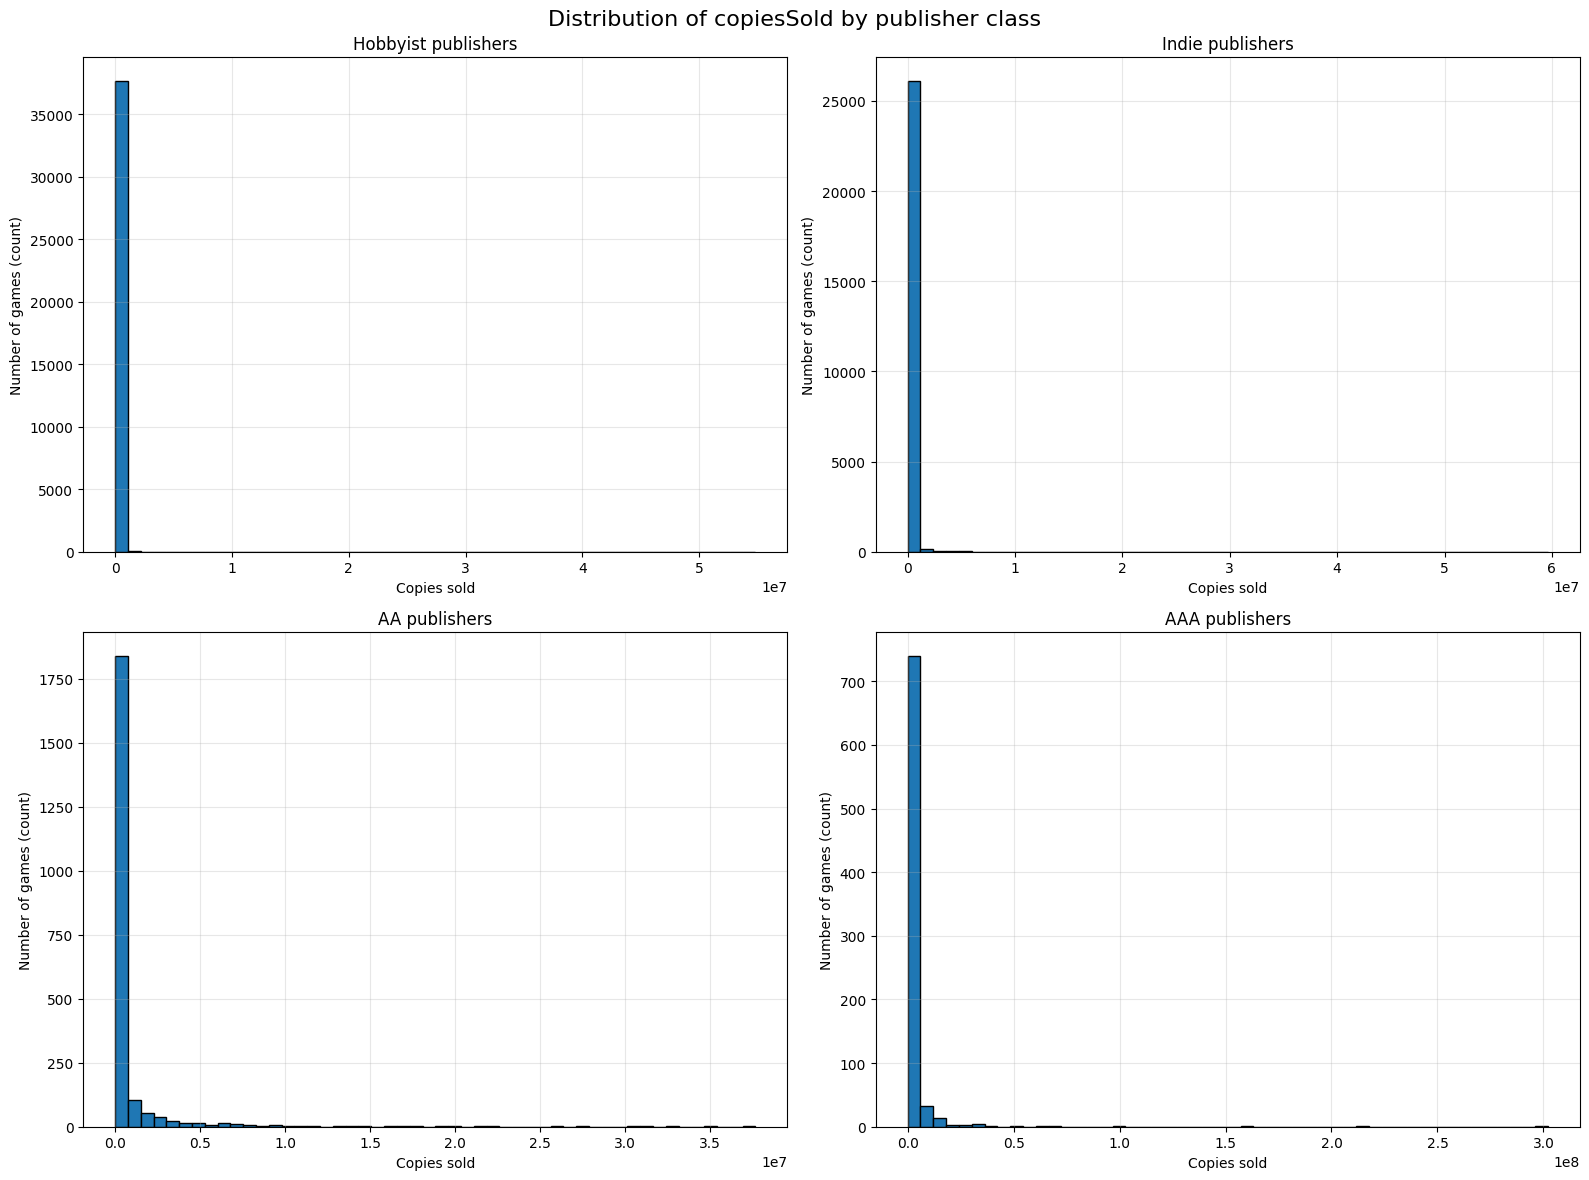

In [ ]:
import matplotlib.pyplot as plt

publisher_map = {
    0: "Hobbyist",
    1: "Indie",
    2: "AA",
    3: "AAA"
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for ax, (code, name) in zip(axes, publisher_map.items()):
    subset = df[df["publisherClass_num"] == code]["copiesSold"]

    ax.hist(
        subset,
        bins=50,
        edgecolor="black"
    )

    ax.set_title(f"{name} publishers")
    ax.set_xlabel("Copies sold")
    ax.set_ylabel("Number of games (count)")
    ax.grid(True, alpha=0.3)

plt.suptitle("Distribution of copiesSold by publisher class", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-883580660.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 250)


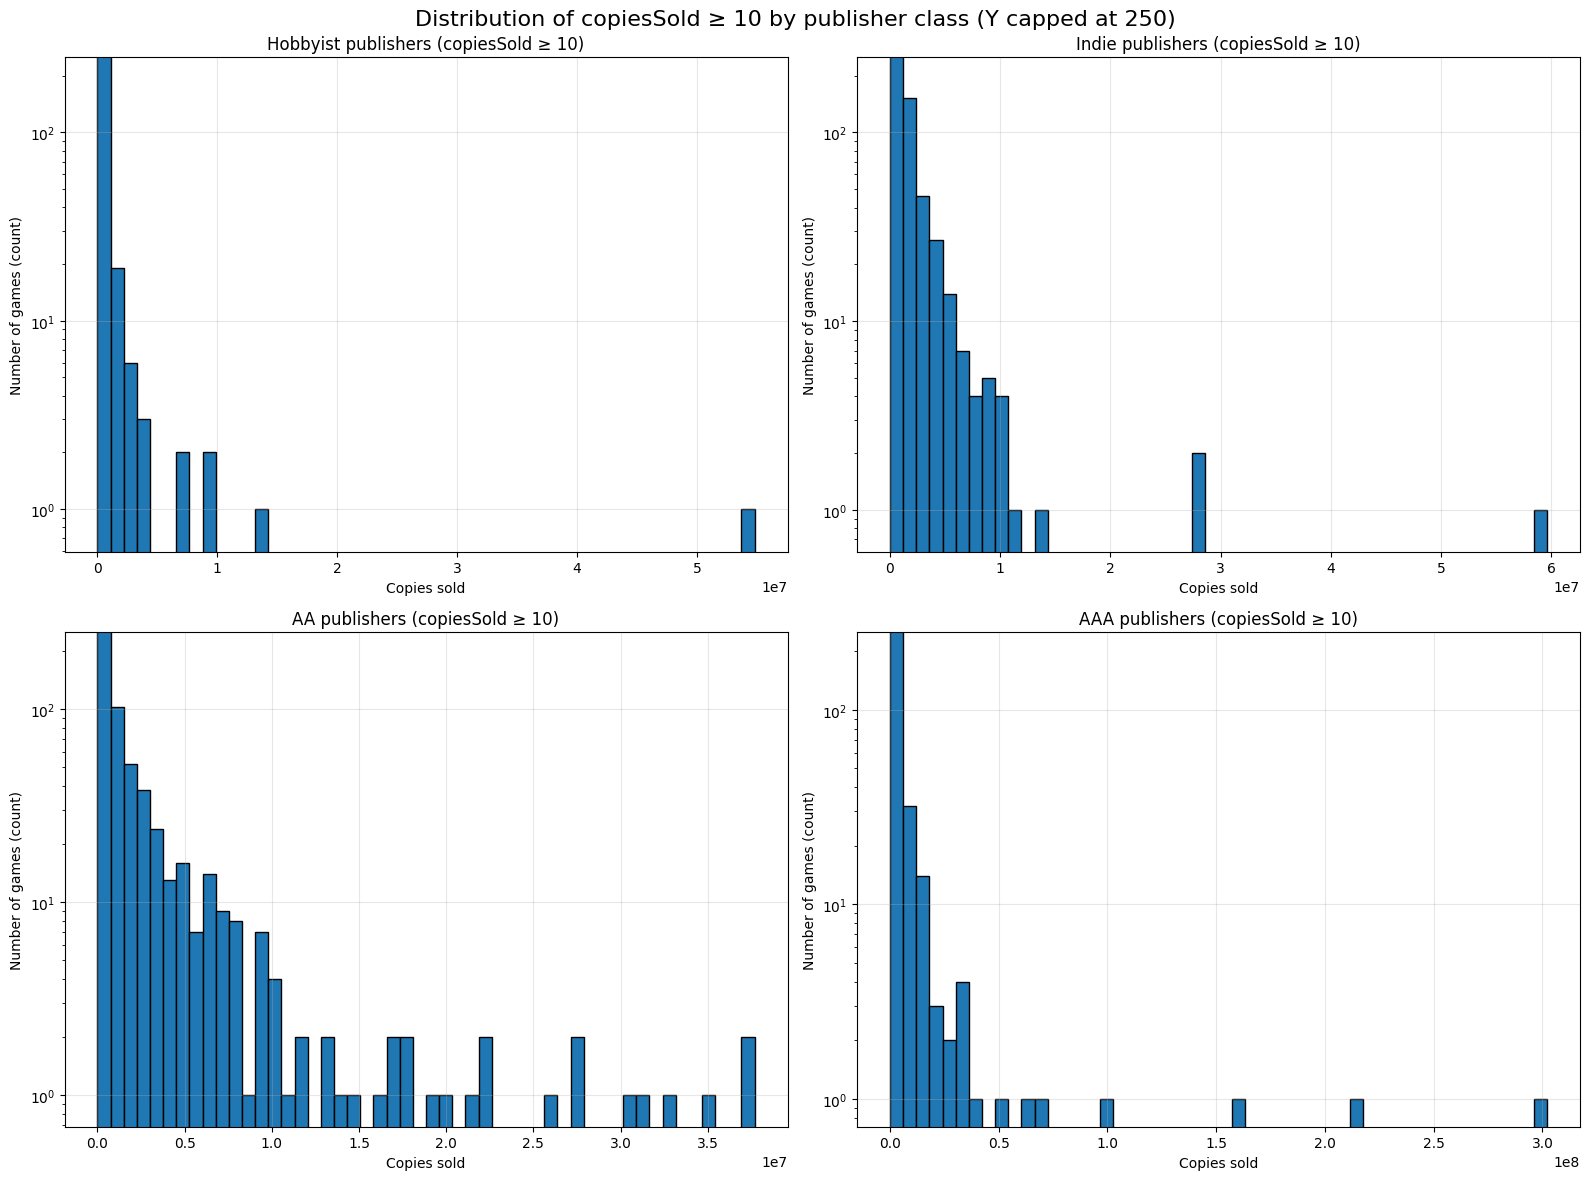

In [ ]:
import matplotlib.pyplot as plt

publisher_map = {
    0: "Hobbyist",
    1: "Indie",
    2: "AA",
    3: "AAA"
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for ax, (code, name) in zip(axes, publisher_map.items()):
    subset = df[
        (df["publisherClass_num"] == code) &
        (df["copiesSold"] >= 10)
    ]["copiesSold"]

    ax.hist(subset, bins=50, log=True, edgecolor="black")

    ax.set_title(f"{name} publishers (copiesSold ≥ 10)")
    ax.set_xlabel("Copies sold")
    ax.set_ylabel("Number of games (count)")
    ax.set_ylim(0, 250)
    ax.grid(True, alpha=0.3)

plt.suptitle("Distribution of copiesSold ≥ 10 by publisher class (Y capped at 250)", fontsize=16)
plt.tight_layout()
plt.show()
